<center>
    <img src="https://raw.githubusercontent.com/errikadd/Capstone_Project_Stack_Overflow_Survey_2024/main/images/title.png" width="100%" align='center' alt="data analysis image">
</center>

In [1]:
# Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import skew
from matplotlib_venn import venn2

In [2]:
# Pandas - show all columns
pd.set_option('display.max_columns', None)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Do not use scientific notation for numbers
pd.set_option('display.float_format', '{:,.2f}'.format)

# Show all rows and columns
pd.set_option('display.max_rows', None)  # show all rows
pd.set_option('display.max_columns', None)  # show all columns 

In [3]:
# Define basic color palette
viridis_colors = ['#fde725', '#5ec962', '#21918c', '#3b528b', '#440154']

<br>
<h1 align='center'>Stack Overflow Annual Developer Survey 2024<br>Exploratory Data Analysis (EDA)</h1>

<p align='center'>The purpose of the study was to explore, analyze, and visualize the main trends of the software development industry.</p>

<h3>About the Dataset</h3>

Dataset: <a href="https://www.kaggle.com/datasets/joebeachcapital/stack-overflow-annual-developer-survey-2024">"Stack Overflow Annual Developer Survey 2011-2024"</a> by Joakim Arvidsson from <a href="https://www.kaggle.com/">Kaggle.com</a><br>

License: <a href="https://creativecommons.org/publicdomain/zero/1.0/">"CC0: Public Domain"</a><br>
"This dataset contains all surveys from 2011 - 2024 of the Stack Overflow Annual Developer Survey. The most recent survey was conducted in May 2024, and gathered responses from over 65,000 developers across seven key sections: Basic information; Education, work, and career; Tech and tech culture; Stack Overflow community; Artificial Intelligence (AI); Professional Developer Series - Not part of the main survey; Thoughts on Survey." A detailed description of this dataset can be obtained <a href="https://www.kaggle.com/datasets/joebeachcapital/stack-overflow-annual-developer-survey-2024">here</a>.<br>
<br>
Only the data about Stack Overflow Annual Developer Survey 2024 was used for this analysis.
<br>
The columns removed from this dataset in pre-processing: 
'SurveyLength', 'SurveyEase', 'JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Knowledge_9', 'ProfessionalQuestion', 'ProfessionalTech', 'ProfessionalCloud', 'OrgSize', 'TBranch', 'ICorPM', 'AISelect', 'AIAcc', 'Currency', 'CompTotal', 'OpSysPersonal use', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'OfficeStackSyncAdmired', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq	SOHow', 'SOComm', 'Check', 'LearnCodeOnline', 'TechDoc', 'LanguageAdmired', 'DatabaseAdmired', 'PlatformAdmired', 'WebframeAdmired', 'EmbeddedAdmired', 'ToolsTechAdmired', 'NEWCollabToolsAdmired', 'AISearchDevAdmired', 'AINextMuch more integrated', 'AINextNo change', 'AINextMore integrated', 'AINextLess integrated', 'AINextMuch less integrated', 'Frequency_1', 'Frequency_2', 'Frequency_3', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'AIComplex', 'AIToolNot interested in Using', 'AIEthics', 'WorkExp', 'YearsCode', 'OpSysProfessional use', 'LearnCode', 'AIThreat', 'TimeSearching', 'TimeAnswering', 'Frustration'

<br>
<br>
<h1 align='center'>Data Wrangling</h1>

In [4]:
# Load data to dataframe
filepath = 'https://raw.githubusercontent.com/errikadd/Capstone_Project_Stack_Overflow_Survey_2024/refs/heads/main/data/survey_results_public_smaller.csv'
#Use local file for faster loading during development
#filepath = "../data/survey_results_public_smaller.csv"
df = pd.read_csv(filepath, header=0)
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork  \
0  Employed, full-time     Remote   
1  Employed, full-time     Remote   
2  Employed, full-time     Remote   
3   Student, full-time        NaN   
4   Student, full-time        NaN   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel YearsCodePro  \
0                          Primary/elementary school          NaN   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)           17   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)           27   
3  Some college/university study without earning ...          NaN   
4  Secondary school (e.g. American high school, G...          NaN   

                 DevType                                            Country  \
0                    NaN                           United States of America   
1  Developer, full-stack  United Kingdom of Great Britain and Northern I...   
2   Developer Experience  United Kingdom of Great Britain and Northern I...   
3  Developer, full-stack                                             Canada   
4  Developer, full-stack                                             Norway   

                              LanguageHaveWorkedWith  \
0                                                NaN   
1  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2                                                 C#   
3  C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...   
4            C++;HTML/CSS;JavaScript;Lua;Python;Rust   

                              LanguageWantToWorkWith  \
0                                                NaN   
1  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
2                                                 C#   
3  HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...   
4                 C++;HTML/CSS;JavaScript;Lua;Python   

            DatabaseHaveWorkedWith      DatabaseWantToWorkWith  \
0                              NaN                         NaN   
1      Dynamodb;MongoDB;PostgreSQL                  PostgreSQL   
2       Firebase Realtime Database  Firebase Realtime Database   
3  MongoDB;MySQL;PostgreSQL;SQLite    MongoDB;MySQL;PostgreSQL   
4                PostgreSQL;SQLite           PostgreSQL;SQLite   

                     PlatformHaveWorkedWith  \
0                                       NaN   
1  Amazon Web Services (AWS);Heroku;Netlify   
2                              Google Cloud   
3   Amazon Web Services (AWS);Fly.io;Heroku   
4                                       NaN   

                     PlatformWantToWorkWith  \
0                                       NaN   
1  Amazon Web Services (AWS);Heroku;Netlify   
2                              Google Cloud   
3          Amazon Web Services (AWS);Vercel   
4                                       NaN   

                   WebframeHaveWorkedWith            WebframeWantToWorkWith  \
0                                     NaN                               NaN   
1           Express;Next.js;Node.js;React  Express;Htmx;Node.js;React;Remix   
2                            ASP.NET CORE                      ASP.NET CORE   
3  jQuery;Next.js;Node.js;React;WordPress      jQuery;Next.js;Node.js;React   
4                                     NaN                               NaN   

          NEWCollabToolsHa

* Exploring the Dataset

In [5]:
# Find the size of the dataset
print('Shape:', df.shape)
print('Number of rows:', len(df))
print('Number of columns:', len(df.axes[1]))

Shape: (65437, 30)
Number of rows: 65437
Number of columns: 30


In [6]:
# Print the summary information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    65437 non-null  int64  
 1   MainBranch                    65437 non-null  object 
 2   Age                           65437 non-null  object 
 3   Employment                    65437 non-null  object 
 4   RemoteWork                    54806 non-null  object 
 5   CodingActivities              54466 non-null  object 
 6   EdLevel                       60784 non-null  object 
 7   YearsCodePro                  51610 non-null  object 
 8   DevType                       59445 non-null  object 
 9   Country                       58930 non-null  object 
 10  LanguageHaveWorkedWith        59745 non-null  object 
 11  LanguageWantToWorkWith        55752 non-null  object 
 12  DatabaseHaveWorkedWith        50254 non-null  object 
 13  D

In [7]:
# Print the statistical description of the dataset, including that of 'object' data types
df.describe(include='all')

ResponseId                      MainBranch              Age  \
count    65,437.00                           65437            65437   
unique         NaN                               5                8   
top            NaN  I am a developer by profession  25-34 years old   
freq           NaN                           50207            23911   
mean     32,719.00                             NaN              NaN   
std      18,890.18                             NaN              NaN   
min           1.00                             NaN              NaN   
25%      16,360.00                             NaN              NaN   
50%      32,719.00                             NaN              NaN   
75%      49,078.00                             NaN              NaN   
max      65,437.00                             NaN              NaN   

                 Employment                            RemoteWork  \
count                 65437                                 54806   
unique                  110                                     3   
top     Employed, full-time  Hybrid (some remote, some in-person)   
freq                  39041                                 23015   
mean                    NaN                                   NaN   
std                     NaN                                   NaN   
min                     NaN                                   NaN   
25%                     NaN                                   NaN   
50%                     NaN                                   NaN   
75%                     NaN                                   NaN   
max                     NaN                                   NaN   

       CodingActivities                                       EdLevel  \
count             54466                                         60784   
unique              118                                             8   
top               Hobby  Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
freq               9993                                         24942   
mean                NaN                                           NaN   
std                 NaN                                           NaN   
min                 NaN                                           NaN   
25%                 NaN                                           NaN   
50%                 NaN                                           NaN   
75%                 NaN                                           NaN   
max                 NaN                                           NaN   

       YearsCodePro                DevType                   Country  \
count         51610                  59445                     58930   
unique           52                     34                       185   
top               2  Developer, full-stack  United States of America   
freq           4168                  18260                     11095   
mean            NaN                    NaN                       NaN   
std             NaN                    NaN                       NaN   
min             NaN                    NaN                       NaN   
25%             NaN                    NaN                       NaN   
50%             NaN                    NaN                       NaN   
75%             NaN                    NaN                       NaN   
max             NaN                    NaN                       NaN   

                LanguageHaveWorkedWith LanguageWantToWorkWith  \
count                            59745                  55752   
unique                           23864                  22769   
top     HTML/CSS;JavaScript;TypeScript                 Python   
freq                              1002                    922   
mean                               NaN                    NaN   
std                                NaN                    NaN   
min                                NaN                    NaN   
25%                                NaN                    NaN   

In [8]:
# Check data type of each column
df.dtypes

ResponseId                        int64
MainBranch                       object
Age                              object
Employment                       object
RemoteWork                       object
CodingActivities                 object
EdLevel                          object
YearsCodePro                     object
DevType                          object
Country                          object
LanguageHaveWorkedWith           object
LanguageWantToWorkWith           object
DatabaseHaveWorkedWith           object
DatabaseWantToWorkWith           object
PlatformHaveWorkedWith           object
PlatformWantToWorkWith           object
WebframeHaveWorkedWith           object
WebframeWantToWorkWith           object
NEWCollabToolsHaveWorkedWith     object
NEWCollabToolsWantToWorkWith     object
AISearchDevHaveWorkedWith        object
AISearchDevWantToWorkWith        object
AISent                           object
AIBen                            object
AIToolCurrently Using            object


In [9]:
# Count the number of duplicate rows in the dataset
print("Rows with duplicate values: ", df.duplicated().sum())

# Display the first few duplicate rows
df_duplicated = df[df.duplicated]
df_duplicated

Rows with duplicate values:  0


Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, CodingActivities, EdLevel, YearsCodePro, DevType, Country, LanguageHaveWorkedWith, LanguageWantToWorkWith, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, PlatformHaveWorkedWith, PlatformWantToWorkWith, WebframeHaveWorkedWith, WebframeWantToWorkWith, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, AISearchDevHaveWorkedWith, AISearchDevWantToWorkWith, AISent, AIBen, AIToolCurrently Using, AIToolInterested in Using, AIChallenges, Industry, ConvertedCompYearly, JobSat]
Index: []

* Identifying and Removing Inconsistencies

In [10]:
# Identify inconsistent or irrelevant entries & standardize entries in column Country 
mapping_country = {
    "United States of America": "USA",
    "Congo, Republic of the...": "Republic Of The Congo",
    "Democratic Republic of the Congo": "DRC",
    "Republic of Korea": "South Korea",
    "Iran, Islamic Republic of...": "Iran",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "Venezuela, Bolivarian Republic of...": "Venezuela"
}
# Clean whitespace and case before mapping
df['Country'] = df['Country'].astype(str).str.strip()
# Apply mapping
df['Country'] = df['Country'].replace(mapping_country)
# Replace common textual placeholders with real NaN
df['Country'].replace(
    to_replace=[r'^\s*nan\s*$', r'^\s*None\s*$', r'^\s*NULL\s*$', r'^\s*$'],
    value=np.nan,
    regex=True,
    inplace=True
)


# Identify inconsistent or irrelevant entries & standardize entries in column Education Level
mapping_ed_level = {
    "Associate degree (A.A., A.S., etc.)": "Associate Degree",
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor’s Degree",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master’s Degree",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Professional Degree",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary School",
    "Some college/university study without earning a degree": "Uncompleted Studies",
    "Primary/elementary school": "Primary School",
    "Something else": "Other"
}
# Clean whitespace and case before mapping
df['EdLevel'] = df['EdLevel'].astype(str).str.strip()
# Apply mapping
df['EdLevel'] = df['EdLevel'].replace(mapping_ed_level)
# Convert back to NaN
df['EdLevel'].replace(r'^\s*nan\s*$', np.nan, regex=True, inplace=True)

print('Unique values in Country:', df['Country'].unique())
print('Unique values in EdLevel:', df['EdLevel'].unique())

Unique values in Country: ['USA' 'United Kingdom' 'Canada' 'Norway' 'Uzbekistan' 'Serbia' 'Poland'
 'Philippines' 'Bulgaria' 'Switzerland' 'India' 'Germany' 'Ireland'
 'Italy' 'Ukraine' 'Australia' 'Brazil' 'Japan' 'Austria' 'Iran' 'France'
 'Saudi Arabia' 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden'
 'Netherlands' 'Croatia' 'Pakistan' 'Czech Republic'
 'Republic of North Macedonia' 'Finland' 'Slovakia' 'Russian Federation'
 'Greece' 'Israel' 'Belgium' 'Mexico' 'United Republic of Tanzania'
 'Hungary' 'Argentina' 'Portugal' 'Sri Lanka' 'Latvia' 'China' 'Singapore'
 'Lebanon' 'Spain' 'South Africa' 'Lithuania' 'Viet Nam'
 'Dominican Republic' 'Indonesia' 'Kosovo' 'Morocco' 'Taiwan' 'Georgia'
 'San Marino' 'Tunisia' 'Bangladesh' 'Nigeria' 'Liechtenstein' 'Denmark'
 'Ecuador' 'Malaysia' 'Albania' 'Azerbaijan' 'Chile' 'Ghana' 'Peru'
 'Bolivia' 'Egypt' 'Luxembourg' 'Montenegro' 'Cyprus' 'Paraguay'
 'Kazakhstan' 'Slovenia' 'Jordan' 'Venezuela' 'Costa Rica' 'Jamaica'
 'Thailand' 'Nicaragua' 

* Handling Missing Values

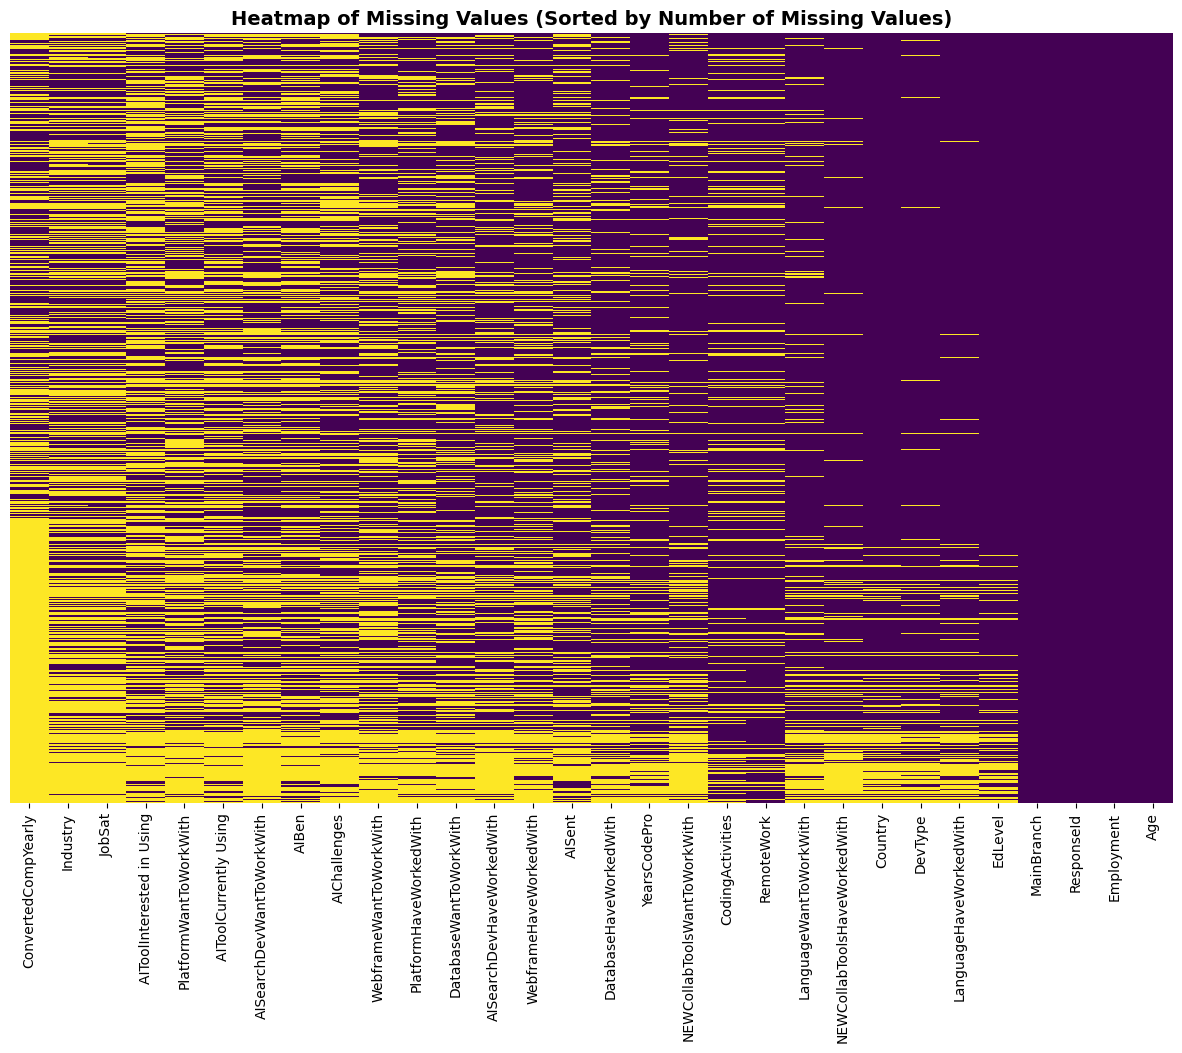

In [11]:
# Identify missing values for all columns in the dataset
df_nulls = df.isnull().sum().sort_values(ascending=False)

# Sort columns by the number of missing values
missing_values = df.isnull().sum()
sorted_cols = missing_values.sort_values(ascending=False).index

# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df[sorted_cols].isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values (Sorted by Number of Missing Values)', fontweight='bold', 
          fontsize=14)
plt.show()

In [12]:
df['Country'].value_counts()

Country
USA                                      11095
Germany                                   4947
India                                     4231
United Kingdom                            3224
Ukraine                                   2672
France                                    2110
Canada                                    2104
Poland                                    1534
Netherlands                               1449
Brazil                                    1375
Italy                                     1341
Australia                                 1260
Spain                                     1123
Sweden                                    1016
Russian Federation                         925
Switzerland                                876
Austria                                    791
Czech Republic                             714
Israel                                     604
Turkey                                     546
Belgium                                    526
Denma

In [13]:
# Impute missing values in numerical columns with median or mean
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mean()) 

# Impute missing values in categorical columns with the most frequent value or replace values
df['MainBranch'] = df['MainBranch'].fillna('Unknown')
df['Age'] = df['Age'].fillna('Unknown')
df['Employment'] = df['Employment'].fillna('Unknown')
df['RemoteWork'] = df['RemoteWork'].fillna('Unknown')
df['CodingActivities'] = df['CodingActivities'].fillna('Unknown')
df['EdLevel'] = df['EdLevel'].fillna('Unknown')
df['YearsCodePro'] = df['YearsCodePro'].fillna('Unknown')
df['DevType'] = df['DevType'].fillna('Unknown')
df['Country'] = df['Country'].fillna('Unknown')
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].fillna('Unknown')
df['LanguageWantToWorkWith'] = df['LanguageWantToWorkWith'].fillna('Unknown')
df['DatabaseHaveWorkedWith'] = df['DatabaseHaveWorkedWith'].fillna('Unknown')
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].fillna('Unknown')
df['PlatformHaveWorkedWith'] = df['PlatformHaveWorkedWith'].fillna('Unknown')
df['PlatformWantToWorkWith'] = df['PlatformWantToWorkWith'].fillna('Unknown')
df['WebframeHaveWorkedWith'] = df['WebframeHaveWorkedWith'].fillna('Unknown')
df['WebframeWantToWorkWith'] = df['WebframeWantToWorkWith'].fillna('Unknown')
df['NEWCollabToolsHaveWorkedWith'] = df['NEWCollabToolsHaveWorkedWith'].fillna('Unknown')
df['NEWCollabToolsWantToWorkWith'] = df['NEWCollabToolsWantToWorkWith'].fillna('Unknown')
df['AISearchDevHaveWorkedWith'] = df['AISearchDevHaveWorkedWith'].fillna('Unknown')
df['AISearchDevWantToWorkWith'] = df['AISearchDevWantToWorkWith'].fillna('Unknown')
df['AISent'] = df['AISent'].fillna('Unknown')
df['AIBen'] = df['AIBen'].fillna('Unknown')
df['AIToolCurrently Using'] = df['AIToolCurrently Using'].fillna('Unknown')
df['AIToolInterested in Using'] = df['AIToolInterested in Using'].fillna('Unknown')
df['AIChallenges'] = df['AIChallenges'].fillna('Unknown')
df['Industry'] = df['Industry'].fillna('Unknown')

In [14]:
# Identify missing values for all columns in the dataset
df.isnull().sum()

ResponseId                          0
MainBranch                          0
Age                                 0
Employment                          0
RemoteWork                          0
CodingActivities                    0
EdLevel                             0
YearsCodePro                        0
DevType                             0
Country                             0
LanguageHaveWorkedWith              0
LanguageWantToWorkWith              0
DatabaseHaveWorkedWith              0
DatabaseWantToWorkWith              0
PlatformHaveWorkedWith              0
PlatformWantToWorkWith              0
WebframeHaveWorkedWith              0
WebframeWantToWorkWith              0
NEWCollabToolsHaveWorkedWith        0
NEWCollabToolsWantToWorkWith        0
AISearchDevHaveWorkedWith           0
AISearchDevWantToWorkWith           0
AISent                              0
AIBen                               0
AIToolCurrently Using               0
AIToolInterested in Using           0
AIChallenges

* Removing Outliers

In [15]:
# Calculate basic statistics (mean, median, and standard deviation) for 'ConvertedCompYearly'
mean_compyearly = df['ConvertedCompYearly'].mean()
median_compyearly = df['ConvertedCompYearly'].median()
std_compyearly = df['ConvertedCompYearly'].std()

print('Mean Compensation is', mean_compyearly)
print('Median Compensation is', median_compyearly)
print('Standard Deviation is', std_compyearly)

# Identify compensation values exceeding a defined threshold for extremely high compensation
threshold = mean_compyearly + 3 * std_compyearly
print('\nThreshold for extremely high compensation is', threshold)

# Identify respondents exceeding the threshold
high_income = df[df['ConvertedCompYearly'] > threshold]

# Sort by ConvertedCompYearly descending
high_income_sorted = high_income[['ResponseId', 'ConvertedCompYearly']].\
    sort_values('ConvertedCompYearly', ascending=False)

print('\nRespondents with yearly income above threshold:') 
print(high_income_sorted)

Mean Compensation is 86155.28726264134
Median Compensation is 65000.0
Standard Deviation is 186756.97308629757

Threshold for extremely high compensation is 646426.2065215341

Respondents with yearly income above threshold:
       ResponseId  ConvertedCompYearly
15837       15838        16,256,603.00
12723       12724        13,818,022.00
28379       28380         9,000,000.00
17593       17594         6,340,564.00
17672       17673         4,936,778.00
19267       19268         3,367,716.00
23694       23695         2,584,118.00
33720       33721         2,237,846.00
34523       34524         2,153,432.00
13763       13764         2,048,046.00
22842       22843         2,014,062.00
2187         2188         2,000,000.00
27902       27903         2,000,000.00
36329       36330         1,900,000.00
14145       14146         1,750,749.00
33000       33001         1,750,000.00
7979         7980         1,728,025.00
21367       21368         1,562,898.00
16350       16351         1,550,391

In [16]:
# Calculate the Interquartile Range (IQR)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

print('Q1:', Q1)
print('Q3:', Q3)
print('IQR:', IQR)

# Determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print('Lower bound:', lower_bound)
print('Upper bound:', upper_bound)

# Count the outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
print('Number of outliers:', outliers.shape[0])

Q1: 32712.0
Q3: 107971.5
IQR: 75259.5
Lower bound: -80177.25
Upper bound: 220860.75
Number of outliers: 978


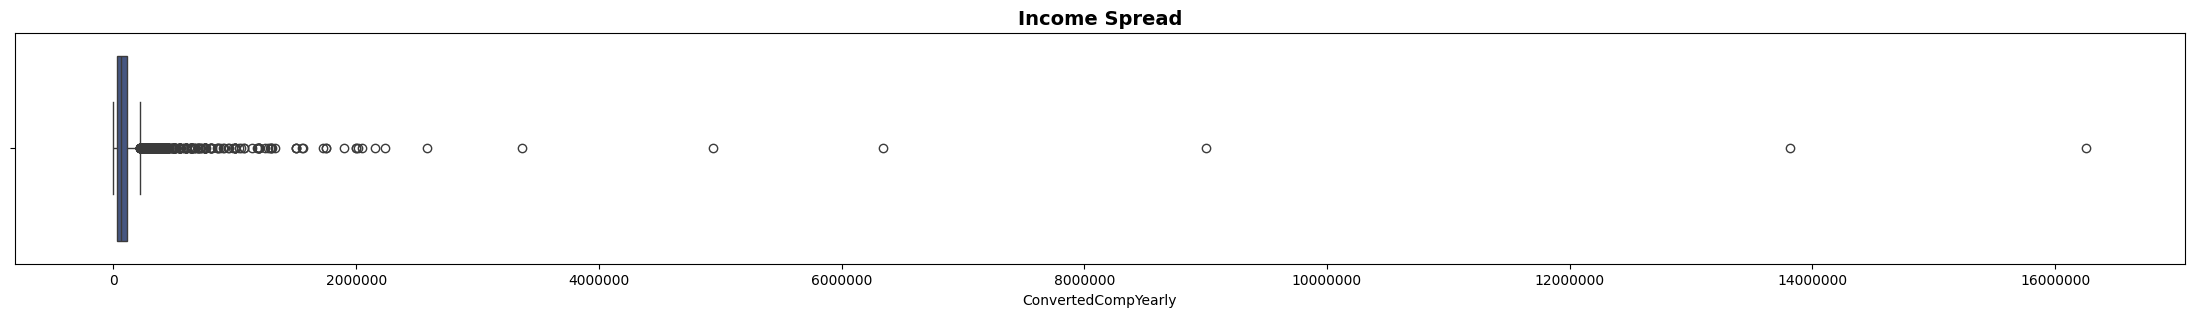

In [17]:
# Visualize outliers using a box plot
plt.figure(figsize=(28, 3))
sns.boxplot(data=df, x='ConvertedCompYearly', color=viridis_colors[3])
plt.ticklabel_format(style='plain', axis='x')  # disable scientific notation
plt.title('Income Spread', fontweight ='bold', fontsize = 14)
plt.show()

In [18]:
# Remove the outliers
mask_keep = (
    (df['ConvertedCompYearly'] >= lower_bound) &
    (df['ConvertedCompYearly'] <= upper_bound)
) | (df['ConvertedCompYearly'].isna())

df_without_outliers = df[mask_keep]
print('New dataset size (without outliers):', df_without_outliers.shape[0])
print('Number of removed rows:', df.shape[0] - df_without_outliers.shape[0])
df = df_without_outliers

New dataset size (without outliers): 64459
Number of removed rows: 978


* Feature Scaling and Transformation

In [19]:
# Identify missing values in column ConvertedCompYearly
#print('Missing values in column ConvertedCompYearly before:',df['ConvertedCompYearly'].isnull().sum())
# Calculate and fill missing values in 'ConvertedCompYearly'
#df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median())
#print('Missing values in column ConvertedCompYearly after:',df['ConvertedCompYearly'].isnull().sum())

# Identify compensation-related columns
compensation_keywords = ['Comp', 'Salary', 'Income']
# Filter columns that contain the compensation-related keywords
compensation_columns = [col for col in df.columns if any(keyword in col for keyword in compensation_keywords)]
# Display the identified compensation-related columns
print("Compensation-related columns:", compensation_columns)

Compensation-related columns: ['ConvertedCompYearly']


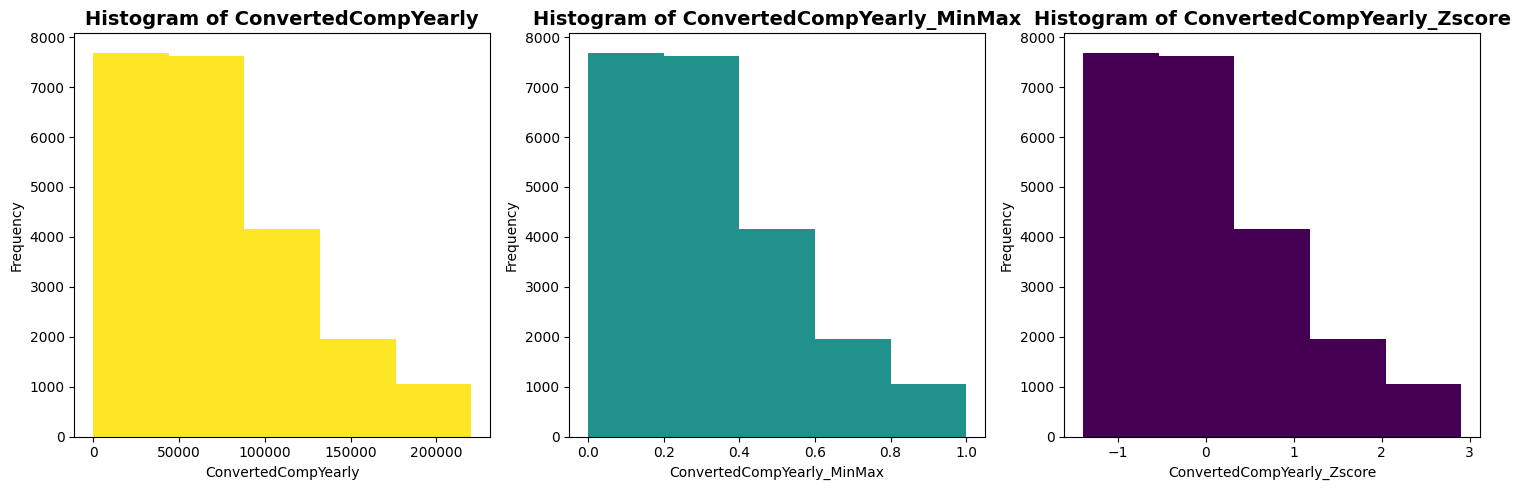

In [20]:
# Normalize ConvertedCompYearly using Min-Max Scaling
# Find the minimum and maximum values in 'ConvertedCompYearly'
min_value = df['ConvertedCompYearly'].min()
max_value = df['ConvertedCompYearly'].max()
# Apply Min-Max normalization to 'ConvertedCompYearly'
df['ConvertedCompYearly_MinMax'] = (df['ConvertedCompYearly'] - min_value) / (max_value - min_value)


# Apply Z-score Normalization to 'ConvertedCompYearly'
# Calculate the mean and standard deviation of 'ConvertedCompYearly'
mean_value = df['ConvertedCompYearly'].mean()
std_dev = df['ConvertedCompYearly'].std()
# Apply the Z-score formula
df['ConvertedCompYearly_Zscore'] = (df['ConvertedCompYearly'] - mean_value) / std_dev


# Visualization of Normalized Compensation Data
plt.figure(figsize=(15, 5))
# Histogram for the original 'ConvertedCompYearly'
plt.subplot(1, 3, 1)
plt.hist(df['ConvertedCompYearly'], bins=5, color=viridis_colors[0])
plt.title('Histogram of ConvertedCompYearly', fontweight ='bold', fontsize = 14)
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequency')
# Plot histogram for 'ConvertedCompYearly_MinMax'
plt.subplot(1, 3, 2)
plt.hist(df['ConvertedCompYearly_MinMax'], bins=5, color=viridis_colors[2])
plt.title('Histogram of ConvertedCompYearly_MinMax', fontweight ='bold', fontsize = 14)
plt.xlabel('ConvertedCompYearly_MinMax')
plt.ylabel('Frequency')
# Histogram for 'ConvertedCompYearly_Zscore'
plt.subplot(1, 3, 3)
plt.hist(df['ConvertedCompYearly_Zscore'], bins=5, color=viridis_colors[4])
plt.title('Histogram of ConvertedCompYearly_Zscore', fontweight ='bold', fontsize = 14)
plt.xlabel('ConvertedCompYearly_Zscore')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [21]:
# Log-transform the ConvertedCompYearly column to reduce skewness
# Replace each value x with log(x):
df['ConvertedCompYearly_log'] = df['ConvertedCompYearly'].apply(np.log)

* Feature Engineering

In [22]:
# Map the Age ranges to integer values
# Excluded: 'Prefer not to say'
age_mapped = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

df['Age_Number'] = df['Age'].map(age_mapped)

In [23]:
# Create a new column 'ExperienceLevel' based on the 'YearsCodePro' column
# Replace values
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0.9',
    'More than 50 years': '51',
    'Unknown': None   
})

# Convert column to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Define experience ranges
bins = [0, 5, 10, 20, 30, 40, float('inf')]  # Categories: 0-5, 5-10, 10-20, 20+
labels = ['0-5 years', '5-10 years', '10-20 years', '20-30 years', '30-40 years', '40+ years']

# Categorize
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

In [24]:
df.shape

(64459, 35)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64459 entries, 0 to 65436
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ResponseId                    64459 non-null  int64   
 1   MainBranch                    64459 non-null  object  
 2   Age                           64459 non-null  object  
 3   Employment                    64459 non-null  object  
 4   RemoteWork                    64459 non-null  object  
 5   CodingActivities              64459 non-null  object  
 6   EdLevel                       64459 non-null  object  
 7   YearsCodePro                  50637 non-null  float64 
 8   DevType                       64459 non-null  object  
 9   Country                       64459 non-null  object  
 10  LanguageHaveWorkedWith        64459 non-null  object  
 11  LanguageWantToWorkWith        64459 non-null  object  
 12  DatabaseHaveWorkedWith        64459 non-null  objec

In [26]:
df_nulls = df.isnull().sum()
print(df_nulls)

ResponseId                          0
MainBranch                          0
Age                                 0
Employment                          0
RemoteWork                          0
CodingActivities                    0
EdLevel                             0
YearsCodePro                    13822
DevType                             0
Country                             0
LanguageHaveWorkedWith              0
LanguageWantToWorkWith              0
DatabaseHaveWorkedWith              0
DatabaseWantToWorkWith              0
PlatformHaveWorkedWith              0
PlatformWantToWorkWith              0
WebframeHaveWorkedWith              0
WebframeWantToWorkWith              0
NEWCollabToolsHaveWorkedWith        0
NEWCollabToolsWantToWorkWith        0
AISearchDevHaveWorkedWith           0
AISearchDevWantToWorkWith           0
AISent                              0
AIBen                               0
AIToolCurrently Using               0
AIToolInterested in Using           0
AIChallenges

<br>
<h3>Conclusions After Data Wrangling</h3>

- The original dataset contained 65437 rows and 30 columns.
- There were no duplicate entries in the dataset therefore further actions such as removing duplicate rows were not necessary.
- Inconsistencies were identified and entries were standardized in columns 'Country' and 'EdLevel'.
- Handling of missing values:
missing values in the numerical column 'JobSat' were filled with mean, while categorical columns were filled with the value 'Unknown'. The column 'ConvertedCompYearly' was left with the missing values.
- Outliers were removed from the column 'ConvertedCompYearly' (978 rows) resulting in a new dataset size of 64459 rows. 
- Values in the column 'ConvertedCompYearly' were normalized resulting in new columns: 'ConvertedCompYearly_MinMax' and 'ConvertedCompYearly_Zscore', and also log-transformation was applied creating a new column 'Log-transform the ConvertedCompYearly'.
- Age ranges were mapped to integer values thus adding a new column 'Age_Number'.
- 'YearsCodePro' column was converted to numeric, and a new column 'ExperienceLevel' was created based on the 'YearsCodePro' with experience ranges.
- After data wrangling there are still 321 missing values in the column 'Age_Number' (representing the answers 'Prefer not to say'), 13822 - in the columns 'YearsCodePro' and 'ExperienceRange, and 42002 - in the coluns 'ConvertedCompYearly', 'ConvertedCompYearly_MinMax', 'ConvertedCompYearly_Zscore', 'ConvertedCompYearly_log'. These missing values will be treated as necessary further in the analysis process.
- After data wrangling the dataset consists of 64459 rows representing 64459 individual survey respondents and 35 columns providing various information about answers to survey questions.

In [27]:
# Save the cleaned file
df.to_csv('../data\\survey_results_public_smaller_cleaned.csv', index=False)

<br>
<br>

------------------------------------------------------------------------------------------------------------

<br>
<h1 align='center'>Exploratory Data Analysis (EDA)</h1>

<h2>Descriptive Statistical Analysis</h2>

In [28]:
# List data types for each column
print(df.dtypes)

ResponseId                         int64
MainBranch                        object
Age                               object
Employment                        object
RemoteWork                        object
CodingActivities                  object
EdLevel                           object
YearsCodePro                     float64
DevType                           object
Country                           object
LanguageHaveWorkedWith            object
LanguageWantToWorkWith            object
DatabaseHaveWorkedWith            object
DatabaseWantToWorkWith            object
PlatformHaveWorkedWith            object
PlatformWantToWorkWith            object
WebframeHaveWorkedWith            object
WebframeWantToWorkWith            object
NEWCollabToolsHaveWorkedWith      object
NEWCollabToolsWantToWorkWith      object
AISearchDevHaveWorkedWith         object
AISearchDevWantToWorkWith         object
AISent                            object
AIBen                             object
AIToolCurrently 

In [29]:
# Compute basic statistics for all variables
df.describe(include = 'all')

ResponseId                      MainBranch              Age  \
count    64,459.00                           64459            64459   
unique         NaN                               5                8   
top            NaN  I am a developer by profession  25-34 years old   
freq           NaN                           49291            23603   
mean     32,917.50                             NaN              NaN   
std      18,911.55                             NaN              NaN   
min           1.00                             NaN              NaN   
25%      16,506.50                             NaN              NaN   
50%      33,051.00                             NaN              NaN   
75%      49,322.50                             NaN              NaN   
max      65,437.00                             NaN              NaN   

                 Employment                            RemoteWork  \
count                 64459                                 64459   
unique                  109                                     4   
top     Employed, full-time  Hybrid (some remote, some in-person)   
freq                  38268                                 22693   
mean                    NaN                                   NaN   
std                     NaN                                   NaN   
min                     NaN                                   NaN   
25%                     NaN                                   NaN   
50%                     NaN                                   NaN   
75%                     NaN                                   NaN   
max                     NaN                                   NaN   

       CodingActivities            EdLevel  YearsCodePro  \
count             64459              64459     50,637.00   
unique              119                  9           NaN   
top             Unknown  Bachelor’s Degree           NaN   
freq              10971              24478           NaN   
mean                NaN                NaN         10.11   
std                 NaN                NaN          9.01   
min                 NaN                NaN          0.90   
25%                 NaN                NaN          3.00   
50%                 NaN                NaN          7.00   
75%                 NaN                NaN         15.00   
max                 NaN                NaN         51.00   

                      DevType Country LanguageHaveWorkedWith  \
count                   64459   64459                  64459   
unique                     35     185                  23501   
top     Developer, full-stack     USA                Unknown   
freq                    18039   10408                   5689   
mean                      NaN     NaN                    NaN   
std                       NaN     NaN                    NaN   
min                       NaN     NaN                    NaN   
25%                       NaN     NaN                    NaN   
50%                       NaN     NaN                    NaN   
75%                       NaN     NaN                    NaN   
max                       NaN     NaN                    NaN   

       LanguageWantToWorkWith DatabaseHaveWorkedWith DatabaseWantToWorkWith  \
count                   64459                  64459                  64459   
unique                  22457                   8887                   8366   
top                   Unknown                Unknown                Unknown   
freq                     9602                  15031                  22592   
mean                      NaN                    NaN                    NaN   
std                       NaN                    NaN                    NaN   
min                       NaN                    NaN                    NaN   
25%                       NaN                    NaN                    NaN   
50%                       NaN                    NaN                    NaN   
75%                       NaN                 

In [30]:
# Calculate the mean age of survey participants
age_mean = df['Age_Number'].dropna().mean()
print('The mean age of the survey participants is {:.2f} years.'.format(age_mean))

The mean age of the survey participants is 32.95 years.


In [31]:
# Count the number of unique countries represented in the survey
unique_countries = df['Country'].nunique()
print('There are', unique_countries, 'unique countries.')

There are 185 unique countries.


In [32]:
# Calculate median compensation for full-time employees
full_time_employed = df[df['Employment'] == 'Employed, full-time']
compensation_values = full_time_employed['ConvertedCompYearly'].dropna()
median = compensation_values.median()
print('Median compensation for full-time employed respondents:', median, 'USD')

Median compensation for full-time employed respondents: 66769.0 USD


In [33]:
# Examine the distribution of responses in the key columns

# Calculate the value counts in the column 'Employment'
val_counts_employment = df['Employment'].value_counts()
print(f'Value counts in the column "Employment":\n{val_counts_employment}')

# Calculate the value counts in the column 'JobSat'
val_counts_JobSat = df['JobSat'].value_counts()
print(f'Value counts in the column "JobSat":\n{val_counts_JobSat}')

# Calculate the value counts in the column 'YearsCodePro'
val_counts_YearsCodePro = df['YearsCodePro'].value_counts()
print(f'Value counts in the column "YearsCodePro":\n{val_counts_YearsCodePro}')

Value counts in the column "Employment":
Employment
Employed, full-time                                                                                                                                                                                                     38268
Independent contractor, freelancer, or self-employed                                                                                                                                                                     4751
Student, full-time                                                                                                                                                                                                       4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                                 3479
Not employed, but looking for work                          

* Age Distribution

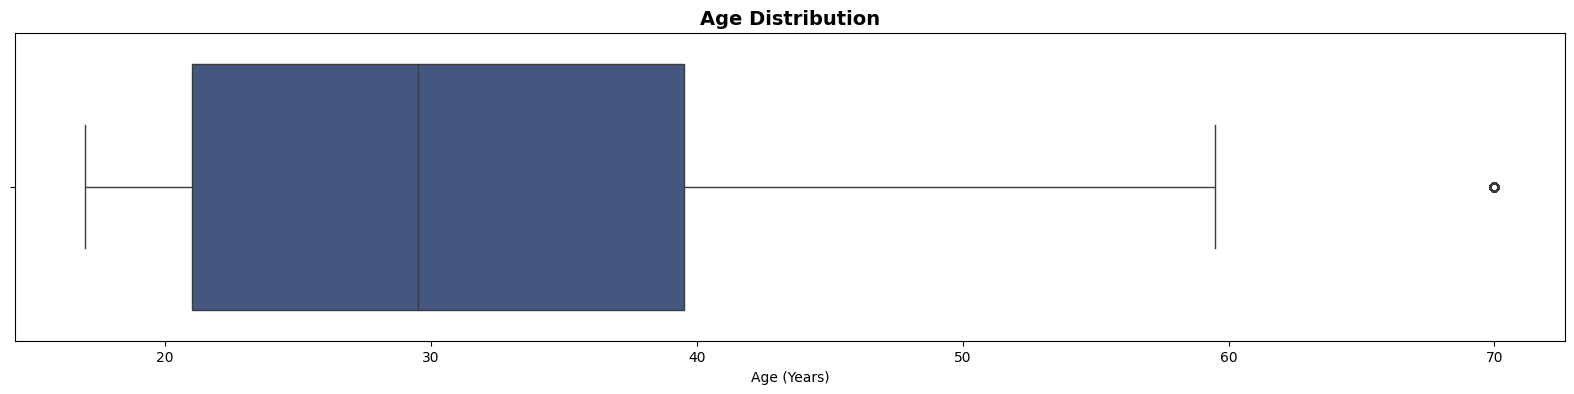

In [34]:
# Box plot
plt.figure(figsize=(20, 4))
sns.boxplot(x=df['Age_Number'], color=viridis_colors[3])
plt.xlabel('Age (Years)')
plt.title('Age Distribution', fontweight='bold', fontsize=14)
plt.show()

The box plot shows that the majority of respondents are between 20 and 40 years old with mean age being around 30. The third quartile shows that most respondents (75%) were aged around 40 or younger. 

* Yearly Compensation Distributed by Age Groups

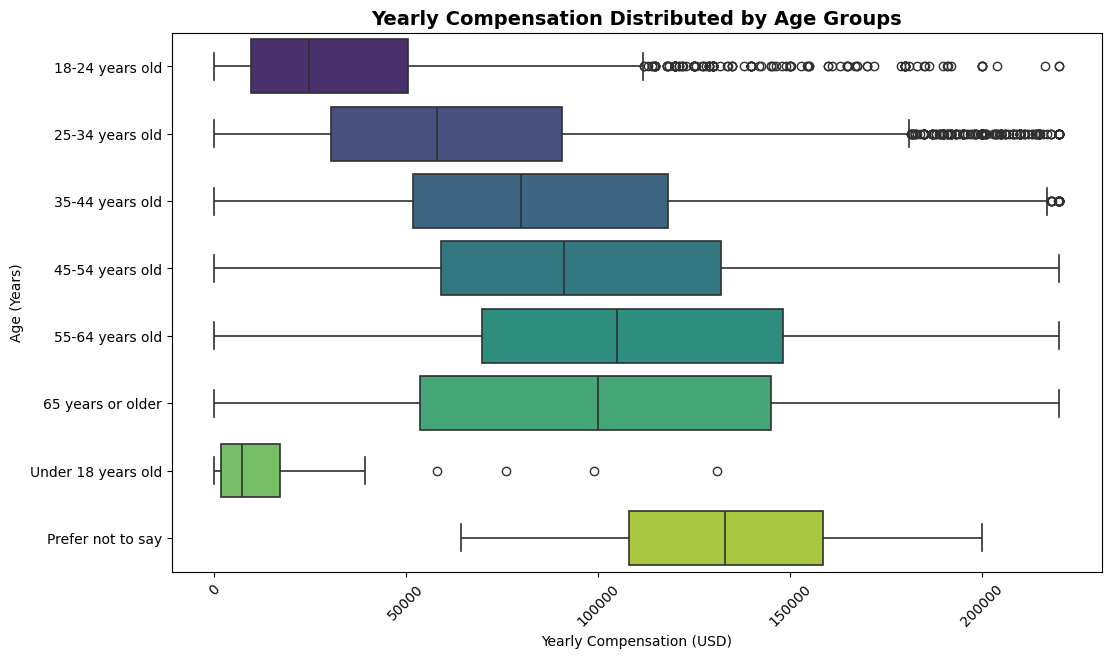

In [35]:
# Drop rows with missing values
df_conv_comp_age = df.dropna(subset=['ConvertedCompYearly', 'Age']).copy()
# Remove zero or negative values 
df_conv_comp_age = df_conv_comp_age[df_conv_comp_age['ConvertedCompYearly'] > 0]

# Box plot
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df_conv_comp_age, 
    x='ConvertedCompYearly', 
    y='Age',
    hue='Age', 
    palette='viridis',  
    showfliers=True,    
    linewidth=1.2
)
plt.title('Yearly Compensation Distributed by Age Groups', fontweight='bold', fontsize=14)
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Age (Years)')
plt.xticks(rotation=45)
plt.show()

The box plot shows that yearly compensation tends to increase with respondents age, the highest values reaching around the age of 55-64. There are many outliers in yearly compensation for respondets up to 44 years old.

* Distribution of Yearly Compensation

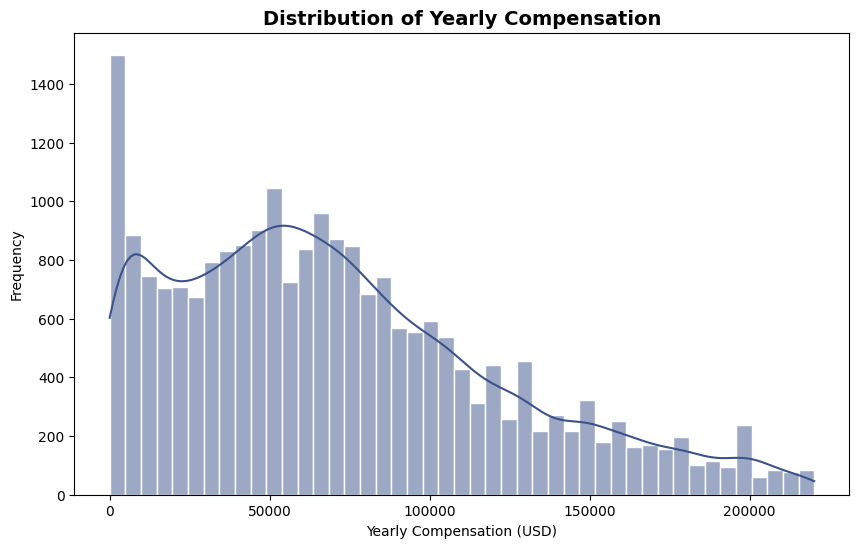

Skewness of the data: 0.7353520197416206


In [36]:
# Drop rows with missing values
df_conv_comp = df.dropna(subset=['ConvertedCompYearly']).copy()
# Remove zero or negative values 
df_conv_comp = df_conv_comp[df_conv_comp['ConvertedCompYearly'] > 0]

# Histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_conv_comp['ConvertedCompYearly'], bins='auto', kde=True, color=viridis_colors[3], 
             edgecolor='white')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Yearly Compensation', fontweight='bold', fontsize=14)
plt.show()

# Calculate skewness of the data
print('Skewness of the data:', skew(df_conv_comp['ConvertedCompYearly'], axis=0, bias=True))

The skewness coefficient of 0.735 indicates that data (after removal of outliers) is moderately positively skewed meaning that the distribution has a tail toward the higher values - exactly how it is expected with compensation or income data.

* Distribution of Yearly Compensation by Age Group

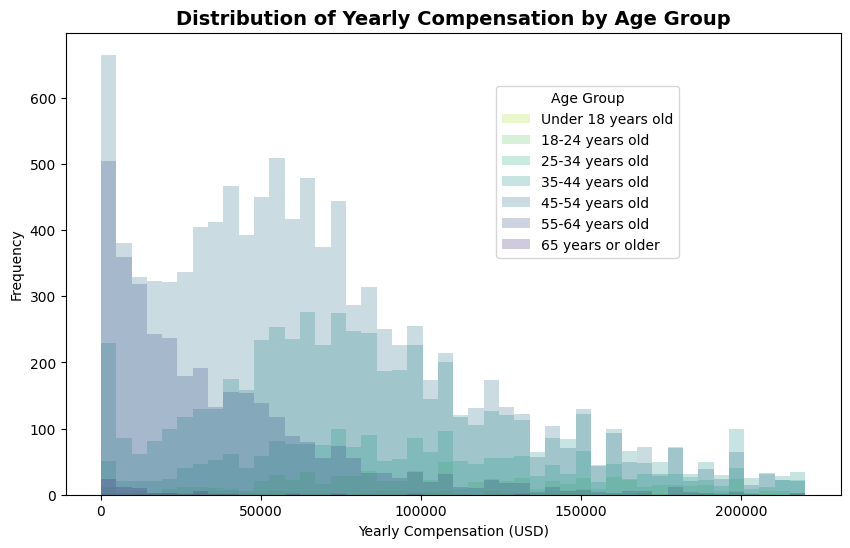

In [37]:
# Drop rows with missing values
df_conv_comp_age = df.dropna(subset=['ConvertedCompYearly', 'Age']).copy()
# Remove zero or negative values 
df_conv_comp_age = df_conv_comp_age[df_conv_comp_age['ConvertedCompYearly'] > 0]

# Define age categories in order
age_cat_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', 
    '65 years or older']

# Ensure Age is categorical
df_conv_comp_age['Age'] = pd.Categorical(df_conv_comp_age['Age'], categories=age_cat_order, ordered=True)

# Histograms for each Age group
plt.figure(figsize=(10, 6))
ax=sns.histplot(data=df_conv_comp_age, x='ConvertedCompYearly', hue='Age', bins='auto', kde=False, 
                element='step', edgecolor=None, palette='viridis')  
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Yearly Compensation by Age Group', fontweight='bold', fontsize=14)
plt.legend(title='Age Group', bbox_to_anchor=(0.8, 0.9), loc='upper right', 
           labels=['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', 
                   '55-64 years old', '65 years or older'])
plt.show()

* Distribution of Yearly Compensation Grouped by Job Satisfaction

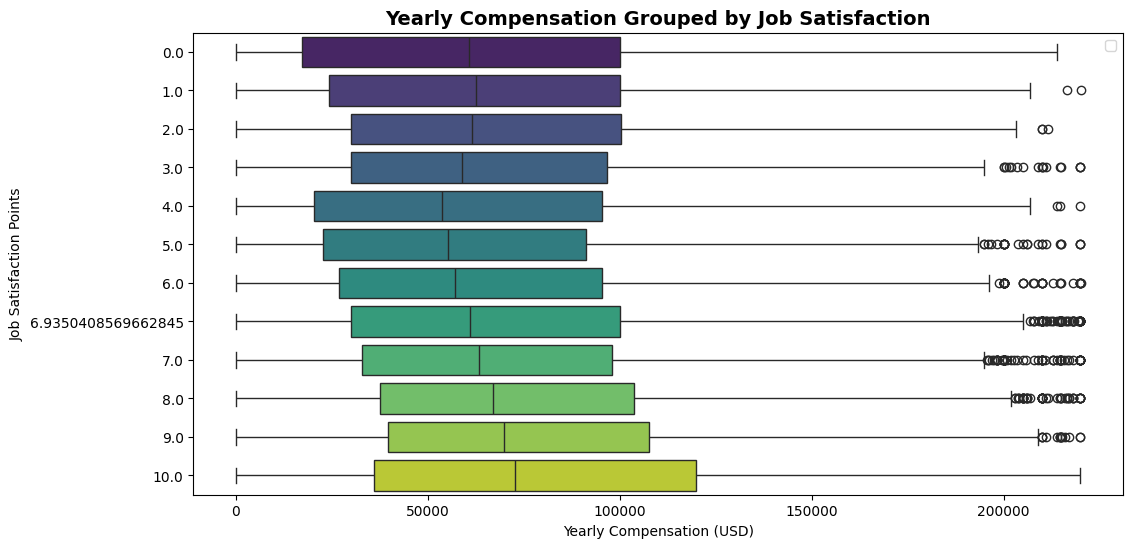

In [38]:
# Drop rows with missing values
df_compTot_jobsat = df.dropna(subset=['ConvertedCompYearly', 'JobSat']).copy()
# Remove zero or negative values 
df_compTot_jobsat = df_compTot_jobsat[df_compTot_jobsat['ConvertedCompYearly'] > 0]

# Convert JobSat to categorical and sort it
df_compTot_jobsat['JobSat'] = pd.Categorical(df_compTot_jobsat['JobSat'])
df_compTot_jobsat = df_compTot_jobsat.sort_values(by='JobSat', ascending=False)

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_compTot_jobsat, 
    x='ConvertedCompYearly', 
    y='JobSat', 
    hue='JobSat',
    palette='viridis',  
    showfliers=True    
)
plt.title('Yearly Compensation Grouped by Job Satisfaction', fontweight='bold', fontsize=14)
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Points')
plt.legend('')
plt.ticklabel_format(style='plain', axis='x')  # disable scientific notation
plt.show()

The box plot indicates that median job satisfaction slightly increases as yearly compensation increases.

* Distribution of Job Satisfaction

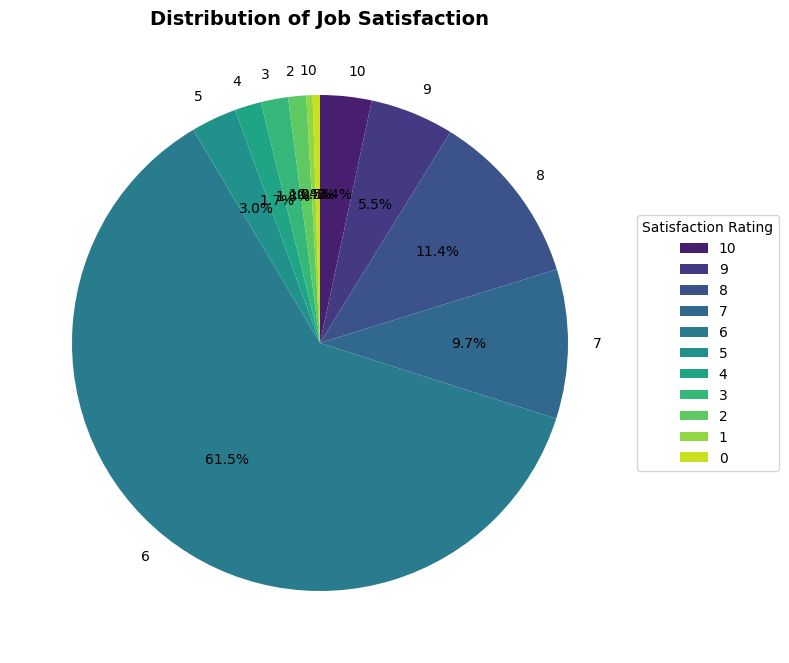

In [39]:
df['JobSat'] = df['JobSat'].astype(int)
counts = df['JobSat'].value_counts()
# Sort by the numeric rating value 
counts_sorted = counts.sort_index(ascending=False)

# Pie chart
colors = sns.color_palette('viridis', n_colors=len(counts_sorted))
plt.figure(figsize=(8, 10))
plt.pie(counts_sorted, labels=counts_sorted.index, autopct='%1.1f%%', counterclock=False, colors=colors, startangle=90)  
plt.title('Distribution of Job Satisfaction', fontweight='bold', fontsize=14)
plt.legend(title='Satisfaction Rating', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

The pie chart shows that the majority of respondents or 61.2% rate their job satisfaction level as 6 out of 10.

* Distribution of Yearly Compensation for the Top 5 Developer Types

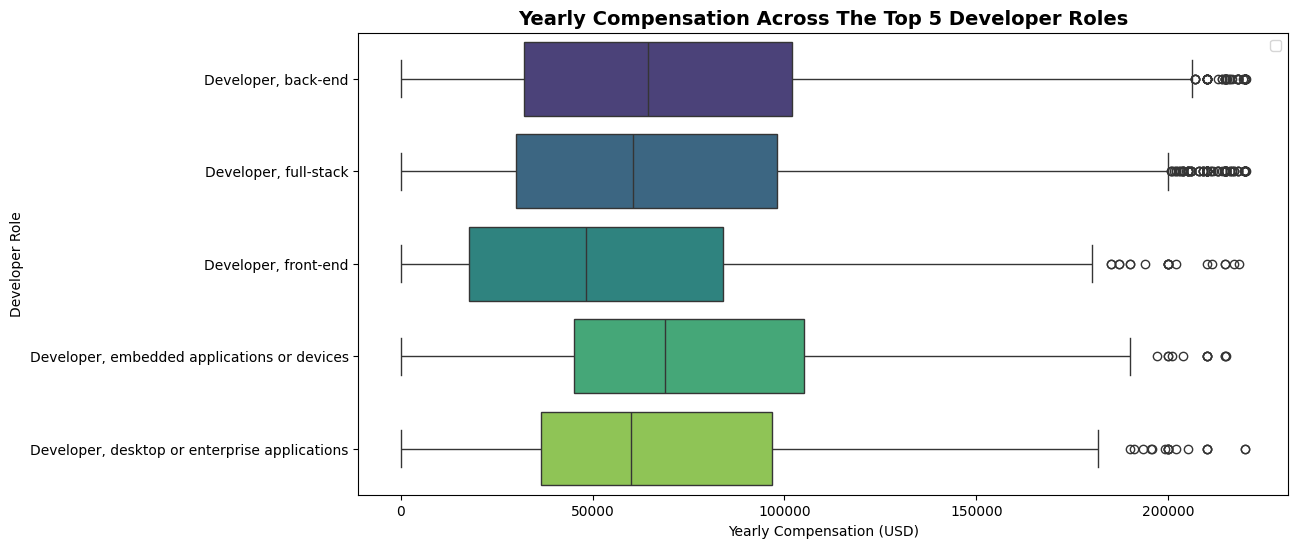

In [40]:
# Drop rows with missing values
df_dev_comp = df.dropna(subset=['ConvertedCompYearly', 'DevType']).copy()
# Remove zero or negative values 
df_dev_comp = df_dev_comp[df_dev_comp['ConvertedCompYearly'] > 0]

# Top 5 DevTypes
top_5_devtypes = (
    df_dev_comp.groupby('DevType', observed=False)['ConvertedCompYearly']
      .sum()
      .sort_values(ascending=False)
      .head(5)
      .index
)

# Filter the original dataframe
df_top_5 = df_dev_comp[df_dev_comp['DevType'].isin(top_5_devtypes)]

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_top_5, 
    x='ConvertedCompYearly', 
    y='DevType', 
    hue='DevType',
    palette='viridis',  
    showfliers=True    # Hide extreme outliers
)
plt.title('Yearly Compensation Across The Top 5 Developer Roles', fontweight='bold', fontsize=14)
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Developer Role')
plt.legend('')
plt.show()

The box plot shows that there are many outliers in yearly compensation independently of developer role but front-end developers tend to get paid slightly less than other developers.

* Distribution of Yearly Compensation for the Top 5 Countries

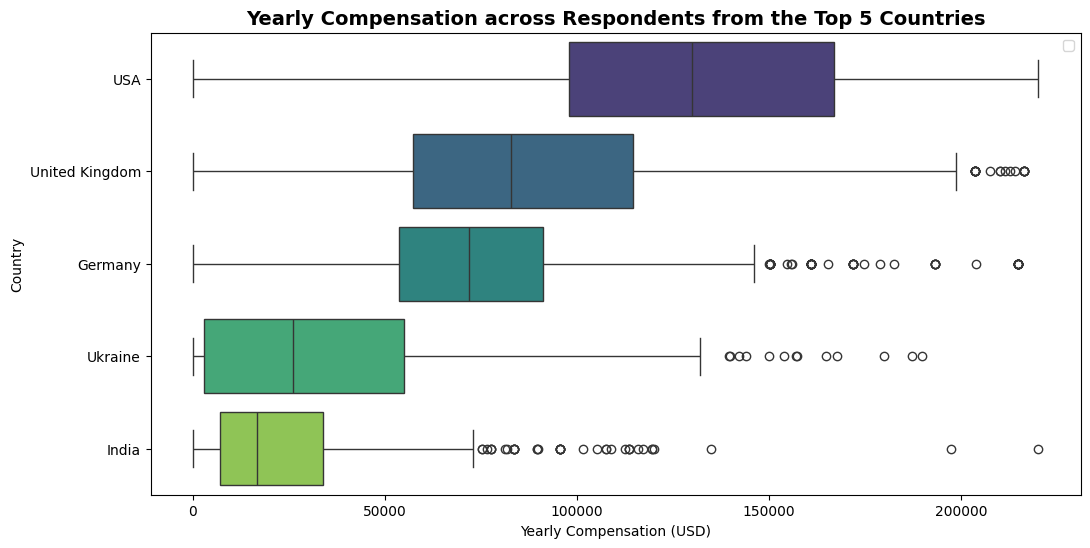

In [41]:
# Drop rows with missing values
df_country_comp = df.dropna(subset=['ConvertedCompYearly', 'Country']).copy()
# Drop rows with value 'Unknown'
df_country_comp.drop(df_country_comp.loc[df_country_comp['Country'] == 'Unknown'].index, inplace=True)
# Remove zero or negative values 
df_country_comp = df_country_comp[df_country_comp['ConvertedCompYearly'] > 0]

# Top 5 Countires
top_5_countries = (
    df_country_comp.groupby('Country', observed=False)['ConvertedCompYearly']
      .count() 
      .sort_values(ascending=False)
      .head(5)
      .index.tolist()
)

# Filter the original dataframe
df_top_5 = df_country_comp[df_country_comp['Country'].isin(top_5_countries)]

# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_top_5, 
    x='ConvertedCompYearly', 
    y='Country', 
    hue='Country',
    palette='viridis',  
    showfliers=True    
)
plt.title('Yearly Compensation across Respondents from the Top 5 Countries', fontweight='bold', fontsize=14)
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Country')
plt.legend('')
plt.show()

Although there are many outliers in most categories except USA, the box plot shows a big difference in yearly compensation across top 5 countries with respondents from USA being paid noticeably better than developers from other countries, especially, India. 

* Compensation Distribution by Country

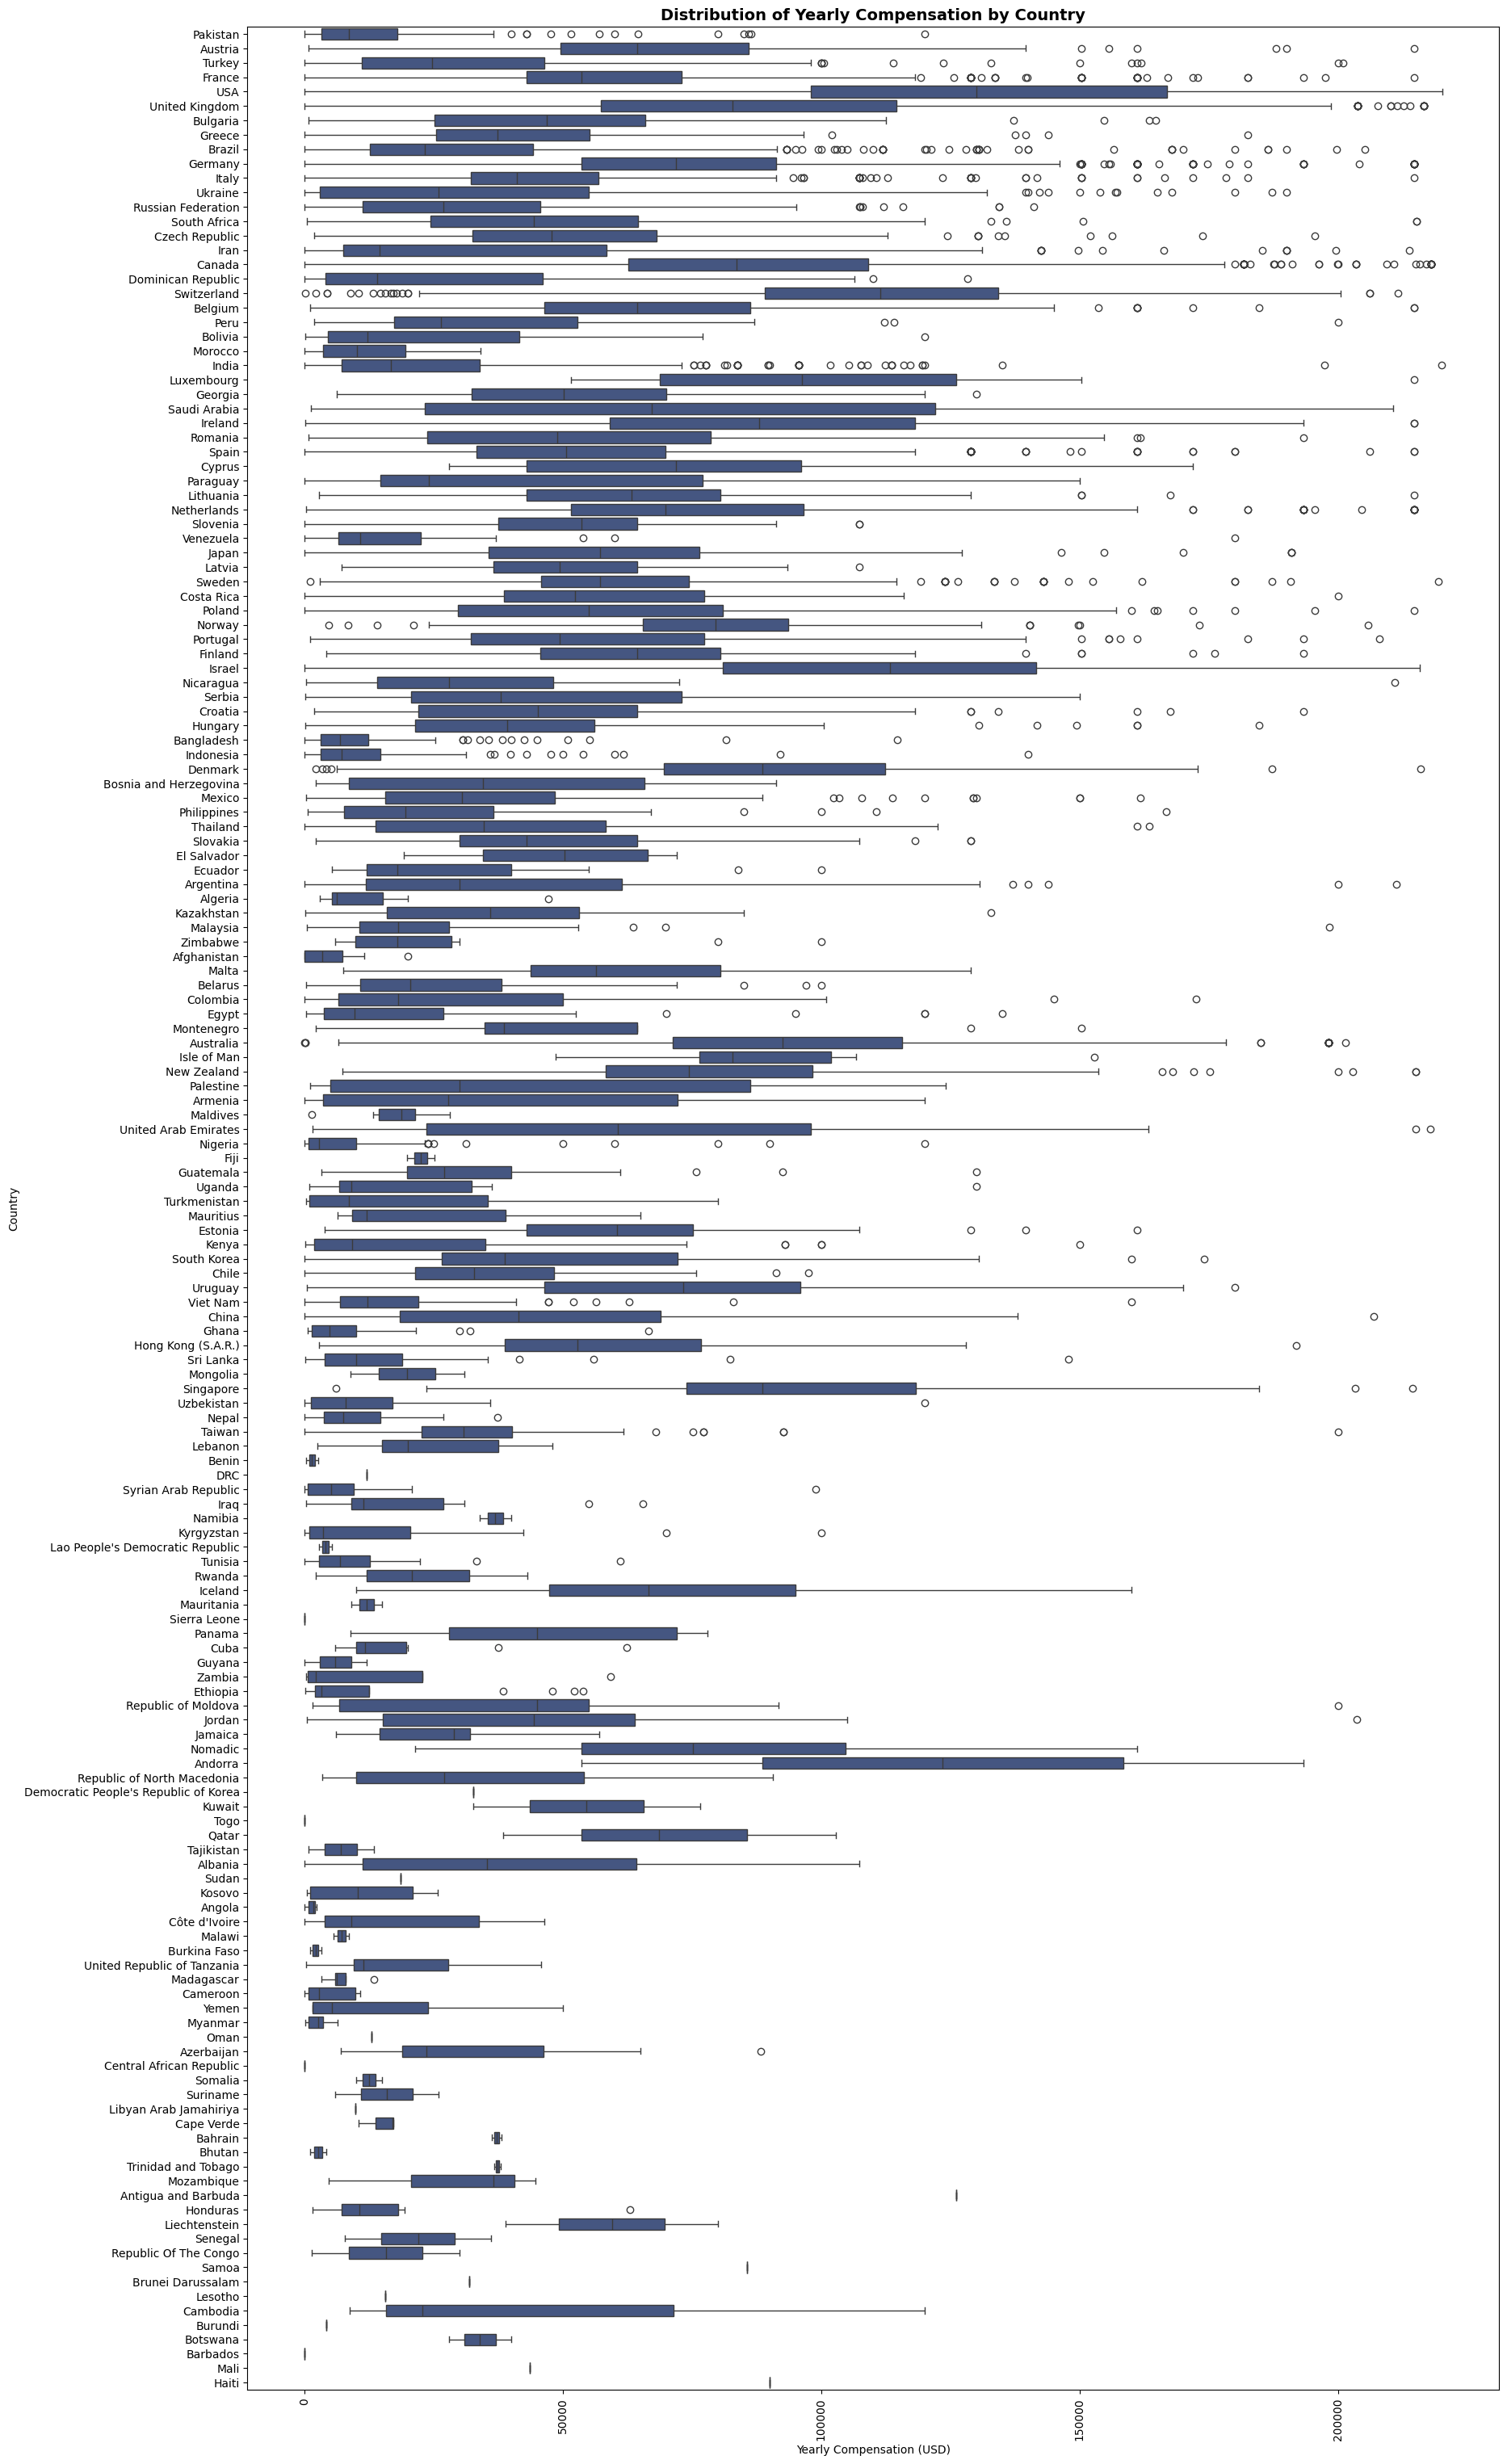

In [42]:
# Drop rows with missing values
df_conv_comp = df.dropna(subset=['ConvertedCompYearly', 'Country']).copy()
df_conv_comp.drop(df_conv_comp.loc[df_conv_comp['Country'] == 'Unknown'].index, inplace=True)
# Remove zero or negative values 
df_conv_comp = df_conv_comp[df_conv_comp['ConvertedCompYearly'] > 0]

# Box plot
plt.figure(figsize=(20, 38))
sns.boxplot(data=df_conv_comp, x='ConvertedCompYearly', y='Country', color=viridis_colors[3], showfliers=True)
plt.xticks(rotation=90)
plt.title('Distribution of Yearly Compensation by Country', fontweight='bold', fontsize=14)
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Country')
plt.show()

Worldwidely the distribution of yearly compensation differs noticeably between countries. Also, many outliers are present in most categories.

* Distribution of Coding Experience among Respondents

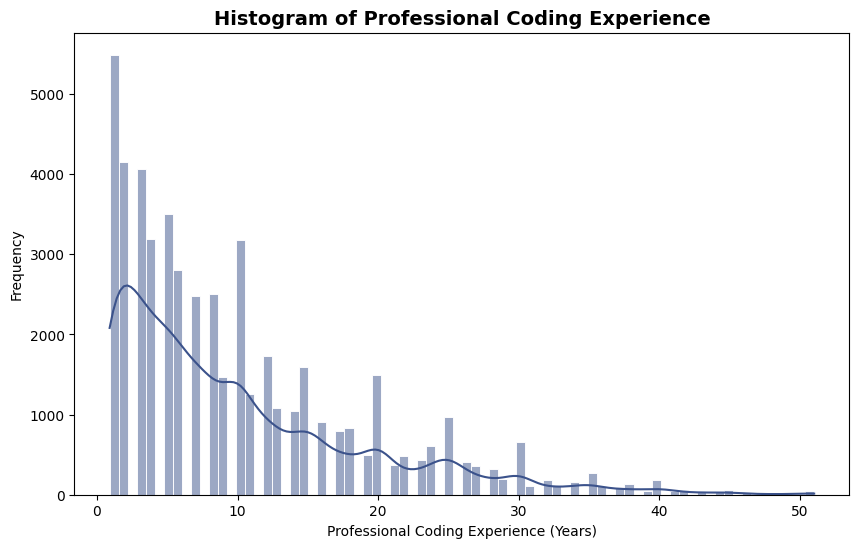

In [43]:
# Drop rows with missing values
df_code_pro = df.dropna(subset=['YearsCodePro']).copy()

# Histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_code_pro['YearsCodePro'], bins='auto', kde=True, color=viridis_colors[3], edgecolor='white')
plt.xlabel('Professional Coding Experience (Years)')
plt.ylabel('Frequency')
plt.title('Histogram of Professional Coding Experience', fontweight='bold', fontsize=14)
plt.show()

* Histogram of Work Type

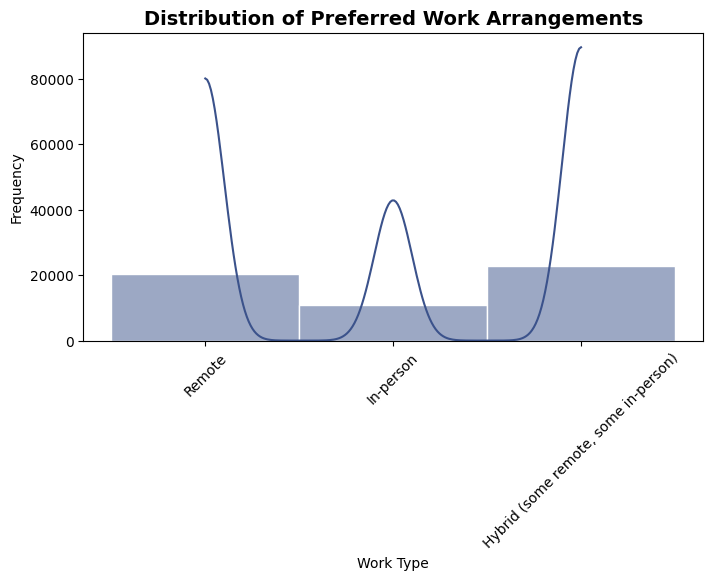

In [44]:
df_remote = df[['RemoteWork']].copy()

# Drop rows with value 'Unknown'
df_remote.drop(df_remote.loc[df_remote['RemoteWork'] == 'Unknown'].index, inplace=True)

# Count occurrences by RemoteWork for Bar Chart
df_remote_bar = df_remote.groupby(['RemoteWork']).size().reset_index(name='Count')

# Histogram using seaborn
plt.figure(figsize=(8, 4))
sns.histplot(df_remote['RemoteWork'], bins='auto', kde=True, color=viridis_colors[3], edgecolor='white')
plt.xlabel('Work Type')
plt.ylabel('Frequency')
plt.title('Distribution of Preferred Work Arrangements', fontweight='bold', fontsize=14)
plt.xticks(rotation=45)
plt.show()

<br>
<h2>Numeric-Numerical Analysis</h2>

* Correlation between Numerical Variables

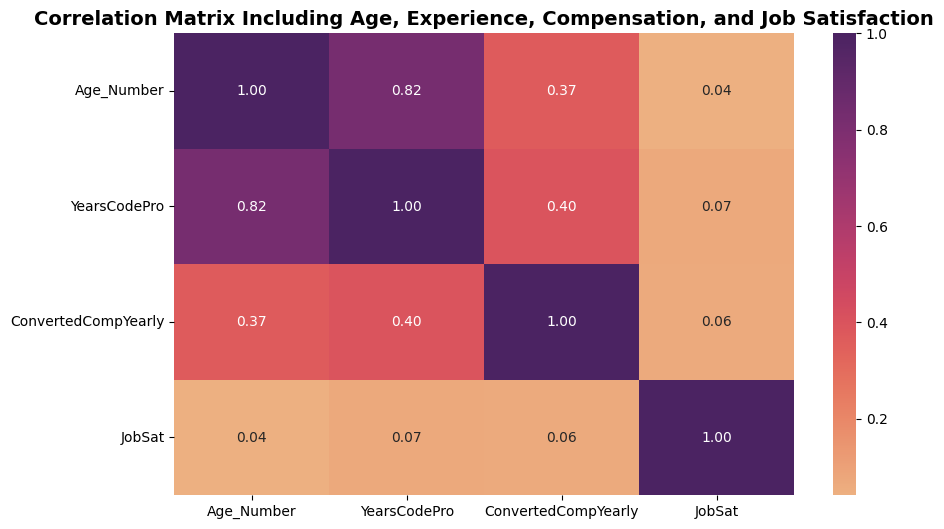


Correlation of Age with other numeric columns:
Age_Number            1.00
YearsCodePro          0.82
ConvertedCompYearly   0.37
JobSat                0.04
Name: Age_Number, dtype: float64


In [45]:
# Drop rows with missing values
numeric_df = df.dropna(subset=['Age_Number', 'YearsCodePro', 'ConvertedCompYearly', 'JobSat']).copy()

# Calculate correlation matrix
corr_df = numeric_df[['Age_Number', 'YearsCodePro', 'ConvertedCompYearly', 'JobSat']]
corr_matrix = corr_df.corr(method='pearson')

# Visualize correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='flare', fmt=".2f")
plt.title('Correlation Matrix Including Age, Experience, Compensation, and Job Satisfaction', fontweight='bold', fontsize=14)
plt.show()

# Display correlation of Age with other numeric columns
print("\nCorrelation of Age with other numeric columns:")
print(corr_matrix['Age_Number'].sort_values(ascending=False))

The correlation matrix shows that there is a strong positive linear relationship (correlation coefficient 0.82) between age and working experience, meaning that older respondents have more years of professional experience. There is also a moderate positive relationship (0.37) between age and compensation.<br>
A correlation of 0.4 between coding experience and compensation indicates a moderate positive relationship between these two variables, meaning they tend to increase together but not perfectly.<br>

* Correlation between Job Satisfaction and Work Experience

Correlation between JobSat and YearsCodePro:
0.07061632549018614


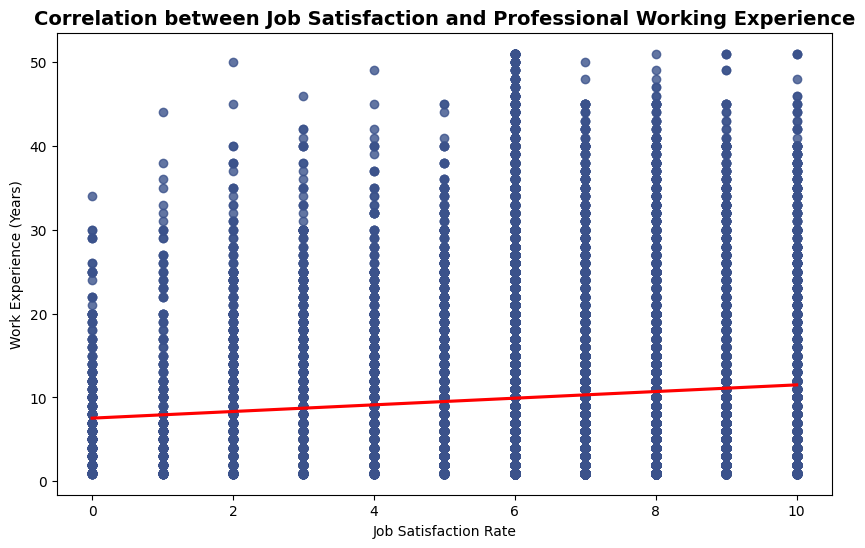

In [46]:
# Drop rows with missing values
df_pro_sat = df.dropna(subset=['YearsCodePro', 'JobSat']).copy()

# Correlation between Job Satisfaction and Experience
correlation = df_pro_sat[['JobSat', 'YearsCodePro']].corr().iloc[0, 1]
print(f'Correlation between JobSat and YearsCodePro:\n{correlation}')

# Scatter plot and line of best fit
plt.figure(figsize=(10, 6))
sns.regplot(x=df_pro_sat['JobSat'], y=df_pro_sat['YearsCodePro'], ci=None, color=viridis_colors[3], 
            line_kws={'color': 'red'},)
plt.xlabel('Job Satisfaction Rate')
plt.ylabel('Work Experience (Years)')
plt.title('Correlation between Job Satisfaction and Professional Working Experience', fontweight='bold', fontsize=14)
plt.show()

A correlation coefficient of 0.07 indicates a negligible or very weak positive linear relationship between two variables.

* Correlation between Job Satisfaction and Yearly Compensation

Correlation between JobSat and ConvertedCompYearly:
0.06520265645264399


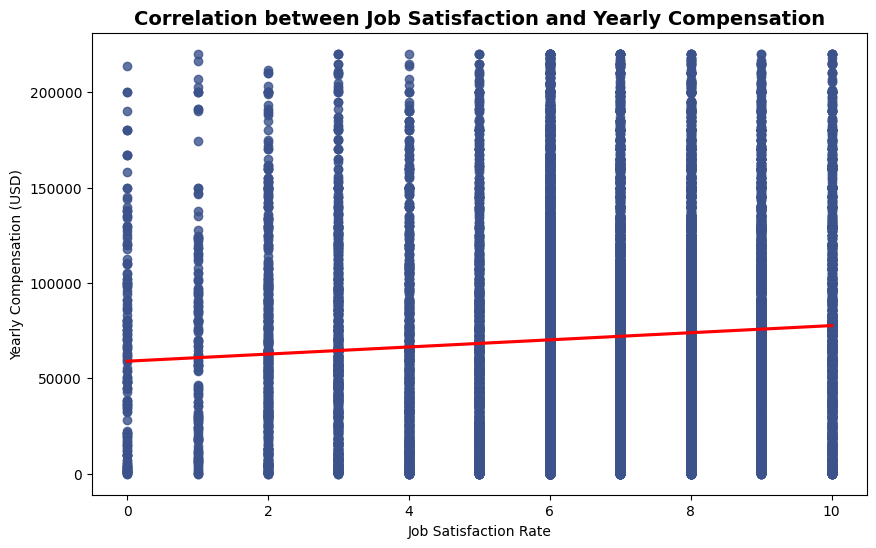

In [47]:
# Drop rows with missing values
df_comp_sat = df.dropna(subset=['JobSat', 'ConvertedCompYearly']).copy()

# Correlation between Job Satisfaction and Yearly Compensation
correlation = df_comp_sat[['JobSat', 'ConvertedCompYearly']].corr().iloc[0, 1]
print(f'Correlation between JobSat and ConvertedCompYearly:\n{correlation}')

# Scatter plot and line of best fit
plt.figure(figsize=(10, 6))
sns.regplot(x=df_comp_sat['JobSat'], y=df_comp_sat['ConvertedCompYearly'], ci=None, color=viridis_colors[3], 
            line_kws={'color': 'red'},)
plt.xlabel('Job Satisfaction Rate')
plt.ylabel('Yearly Compensation (USD)')
plt.title('Correlation between Job Satisfaction and Yearly Compensation', fontweight='bold', fontsize=14)
plt.show()

A correlation coefficient of 0.07 indicates a negligible or very weak positive linear relationship between two variables.

* Correlation between Work Experience and Yearly Compensation

Correlation between YearsCodePro and ConvertedCompYearly:
0.3991471351093146


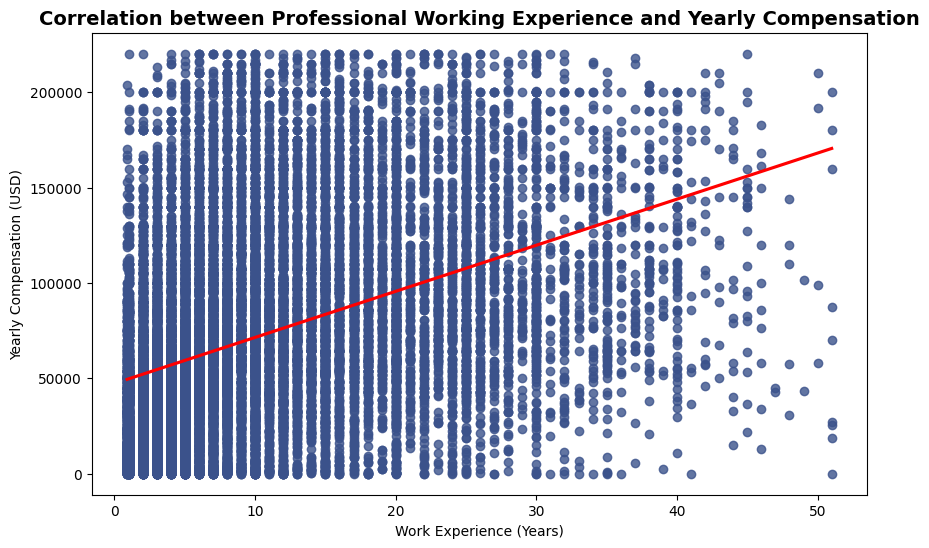

In [48]:
# Drop rows with missing values
df_exp_comp = df.dropna(subset=['YearsCodePro', 'ConvertedCompYearly']).copy()

# Correlation between Experience and Yearly Compensation
correlation = df_exp_comp[['YearsCodePro', 'ConvertedCompYearly']].corr().iloc[0, 1]
print(f'Correlation between YearsCodePro and ConvertedCompYearly:\n{correlation}')

# Scatter plot and line of best fit
plt.figure(figsize=(10, 6))
sns.regplot(x=df_exp_comp['YearsCodePro'], y=df_exp_comp['ConvertedCompYearly'], ci=None, 
            color=viridis_colors[3], line_kws={'color': 'red'},)
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation (USD)')
plt.title('Correlation between Professional Working Experience and Yearly Compensation', fontweight='bold', fontsize=14)
plt.show()

A correlation coefficient of 0.4 indicates a moderate positive linear relationship between professional working experience and yearly compensation, meaning as professional coding experience tends to increase, yearly compensation also tends to increase, but not perfectly.

* Correlation between Age and Professional Working Experience

Correlation between Age_Number and YearsCodePro:
0.8326325969284765


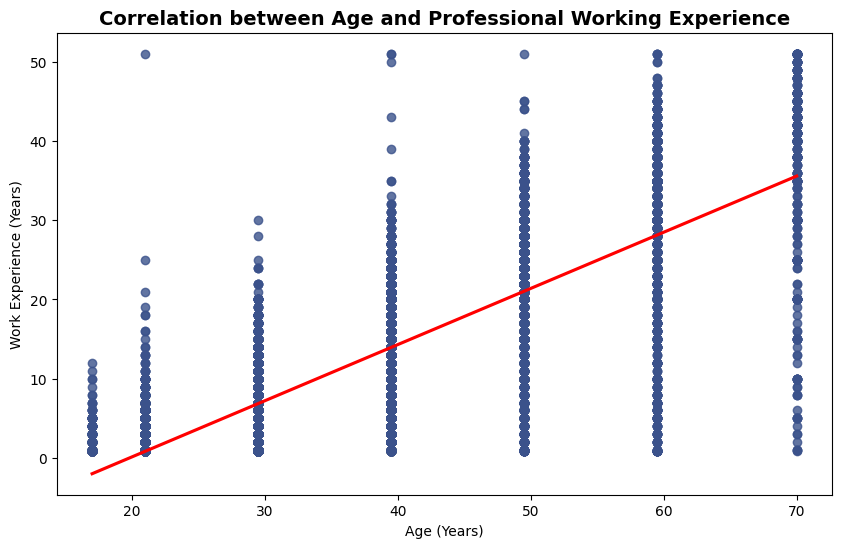

In [49]:
# Drop rows with missing values
df_age_pro = df.dropna(subset=['Age_Number', 'YearsCodePro']).copy()

# Correlation between Age and Work Experience
correlation = df_age_pro[['Age_Number', 'YearsCodePro']].corr().iloc[0, 1]
print(f'Correlation between Age_Number and YearsCodePro:\n{correlation}')

# Scatter plot and line of best fit
plt.figure(figsize=(10, 6))
sns.regplot(x=df_age_pro['Age_Number'], y=df_age_pro['YearsCodePro'], ci=None, color=viridis_colors[3], line_kws={'color': 'red'},)
plt.xlabel('Age (Years)')
plt.ylabel('Work Experience (Years)')
plt.title('Correlation between Age and Professional Working Experience', fontweight='bold', fontsize=14)
plt.show()

The Pearson's correlation coefficient is 0.83 indicating a strong positive linear relationship between respondents' age and working experience, meaning that older respondents have more years of professional experience. Also the scatterplot line that goes upwards to the right indicates a positive correlation between these two variables.

* Relationship between Average Yearly Compensation and Average Job Satisfaction Related to Age

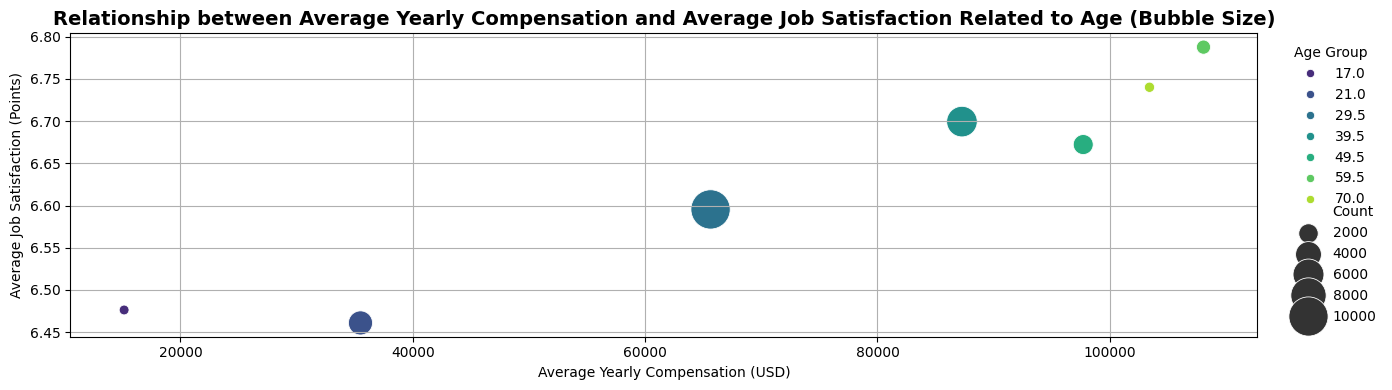

In [50]:
df_convcomp_jobsat = df[['JobSat', 'ConvertedCompYearly', 'Age_Number']].dropna().copy()

# Remove negative or zero values 
df_convcomp_jobsat = df_convcomp_jobsat[df_convcomp_jobsat['ConvertedCompYearly'] > 0]

# Aggregate the data by Age_Number
df_grouped = df_convcomp_jobsat.groupby('Age_Number').agg({
    'ConvertedCompYearly': 'mean',
    'JobSat': 'mean',
    'Age_Number': 'size'
}).rename(columns={'Age_Number':'Count'}).reset_index()

# Bubble chart
colors = sns.color_palette('viridis', n_colors=7) 
plt.figure(figsize=(14, 4))
ax = sns.scatterplot(
    data=df_grouped,
    x='ConvertedCompYearly', 
    y='JobSat',
    size='Count', # number of respondents in the age group
    hue='Age_Number', # color by age
    sizes=(50, 800),       # adjust bubble size range
    palette=colors,    
    alpha=1
)
plt.xlabel('Average Yearly Compensation (USD)')
plt.ylabel('Average Job Satisfaction (Points)')
plt.title('Relationship between Average Yearly Compensation and Average Job Satisfaction Related to Age (Bubble Size)', fontweight='bold', fontsize=14)
plt.legend(
    loc='lower center',
    bbox_to_anchor=(-0.1, 0.1),   # moves legend below plot
    frameon=True
)
plt.grid(True)
# Extract the legend
handles, labels = ax.get_legend_handles_labels()

# Create separate legends:
# First legend: AgeMapped (hue)
h1 = ax.legend(
    handles=handles[1:len(df_grouped)+1], 
    labels=labels[1:len(df_grouped)+1],
    title='Age Group',
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    frameon=False
)
ax.add_artist(h1)  # Add the first legend back
# Second legend: Count (size)
h2 = ax.legend(
    handles=handles[len(df_grouped)+1:], 
    labels=labels[len(df_grouped)+1:],
    title='',
    loc='lower left',
    bbox_to_anchor=(1.02, 0),
    frameon=False
)
plt.tight_layout()
plt.show()

The bubble chart shows that the highest average job satisfaction and the highest yearly compensation relate with the age group of around 59.5 years old. Meanwhile, the lowest job satisfaction and the lowest yearly compensation relate with the respondents who are approximately 21 years old or younger.

* Median Compensation by Age Group

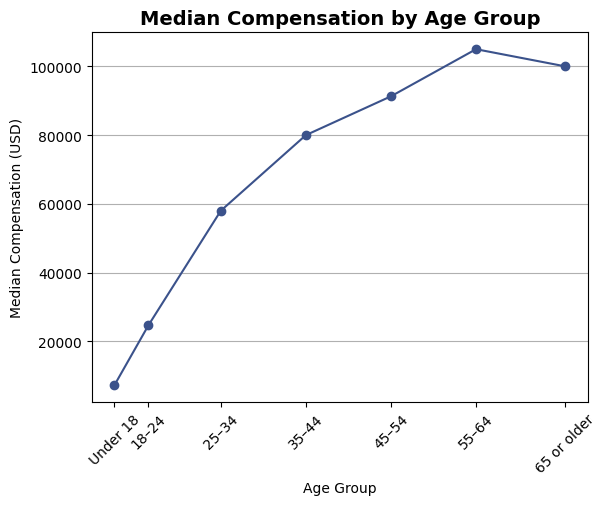

In [51]:
df_convcomp_age = df[['Age_Number', 'ConvertedCompYearly']].dropna().copy()

# Remove negative or zero values (log cannot handle them)
df_convcomp_age = df_convcomp_age[df_convcomp_age['ConvertedCompYearly'] > 0]

# Group by Age and calculate median
convcomp_age_grouped = df_convcomp_age.groupby('Age_Number')['ConvertedCompYearly'].median().reset_index()

age_labels = ['Under 18', '18–24', '25–34', '35–44', '45–54', '55–64', '65 or older']

# Line chart
plt.plot(convcomp_age_grouped['Age_Number'], convcomp_age_grouped['ConvertedCompYearly'], 
         color=viridis_colors[3], marker='o')
plt.xticks(rotation=45, ticks=convcomp_age_grouped['Age_Number'], labels=age_labels)
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.title('Median Compensation by Age Group', fontweight='bold', fontsize=14)
plt.grid(True, axis='y')
plt.show()

The bar chart shows that median yearly compensation increases with age, reaching the peak at age of 55-64.

<br>
<h2>Numeric-Categorical Analysis</h2>

* Number of Respondents by Age Group

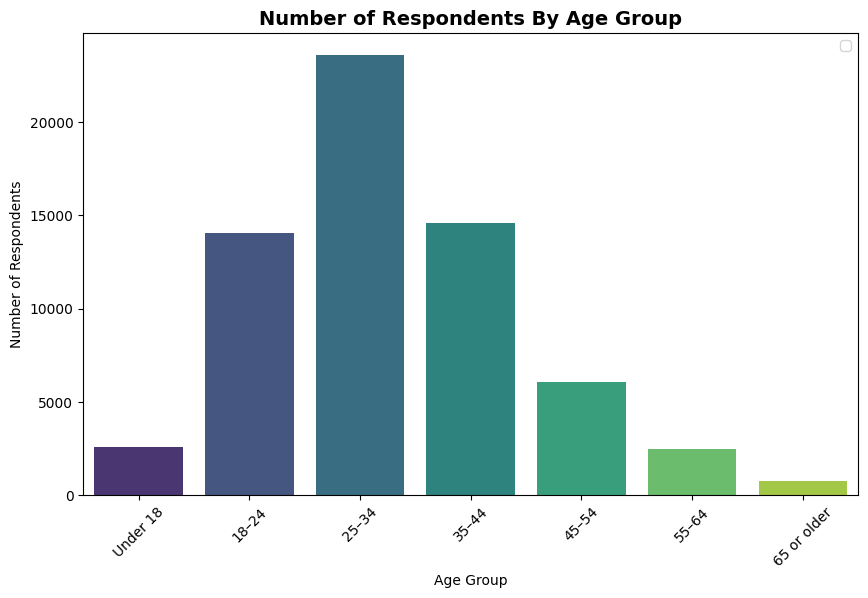

In [52]:
df_age = df[['Age_Number']].dropna().copy()

df_age_grouped = df_age.groupby(['Age_Number']).size().reset_index(name='Frequency')

# Define the correct order for compensation ranges
age_order = ['Under 18', '18–24', '25–34', '35–44', '45–54', '55–64', '65 or older']

# Convert to categorical with correct order
df_age['Age_Number'] = pd.Categorical(df_age['Age_Number'], categories=age_order, ordered=True)

# Bar chart
colors = sns.color_palette('viridis', n_colors=7)
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Age_Number', y = 'Frequency', data = df_age_grouped, hue = 'Age_Number', palette = colors)
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.title('Number of Respondents By Age Group', fontweight='bold', fontsize=14)
plt.xticks(
    ticks=plt.xticks()[0],   # current tick positions
    labels=age_order,       # custom labels
    rotation=45
)
plt.legend('')
plt.show()

The bar plot shows that the majority of respondents are 18-44 years old.

* Number of Respondents by Country (Top 10 Countries)

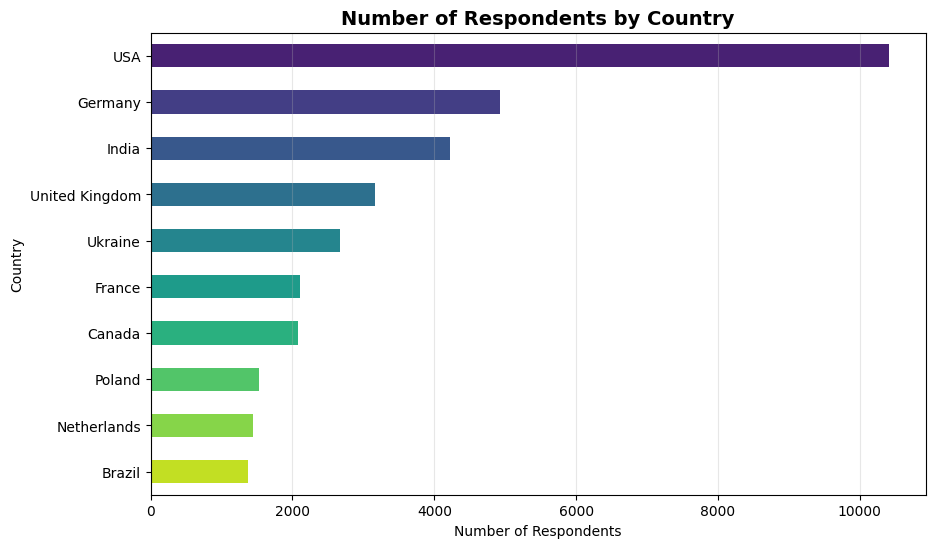

In [53]:
df_country2 = df[['Country']].dropna().copy()
# Drop rows with value 'Unknown'
df_country2.drop(df_country2.loc[df_country2['Country'] == 'Unknown'].index, inplace=True)

# Group to get frequency
df_country2 = (
    df_country2
    .groupby('Country')
    .size()
    .reset_index(name='Count')
    .sort_values('Count', ascending=False)   
)

country_top_10 = df_country2.head(10)

# Bar chart
colors = sns.color_palette('viridis', n_colors=10)
country_top_10.plot(kind='barh', x='Country', y='Count', figsize=(10,6), color=colors, legend=False)
plt.title('Number of Respondents by Country', fontweight='bold', fontsize=14)
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Descending
plt.grid(axis='x', linestyle='-', alpha=0.3)
plt.show()

The countries most represented in the survey are USA, Germany, and India.

* Scatter Plot for Work Experience vs. Age Group by Country (Top 10 Countries)

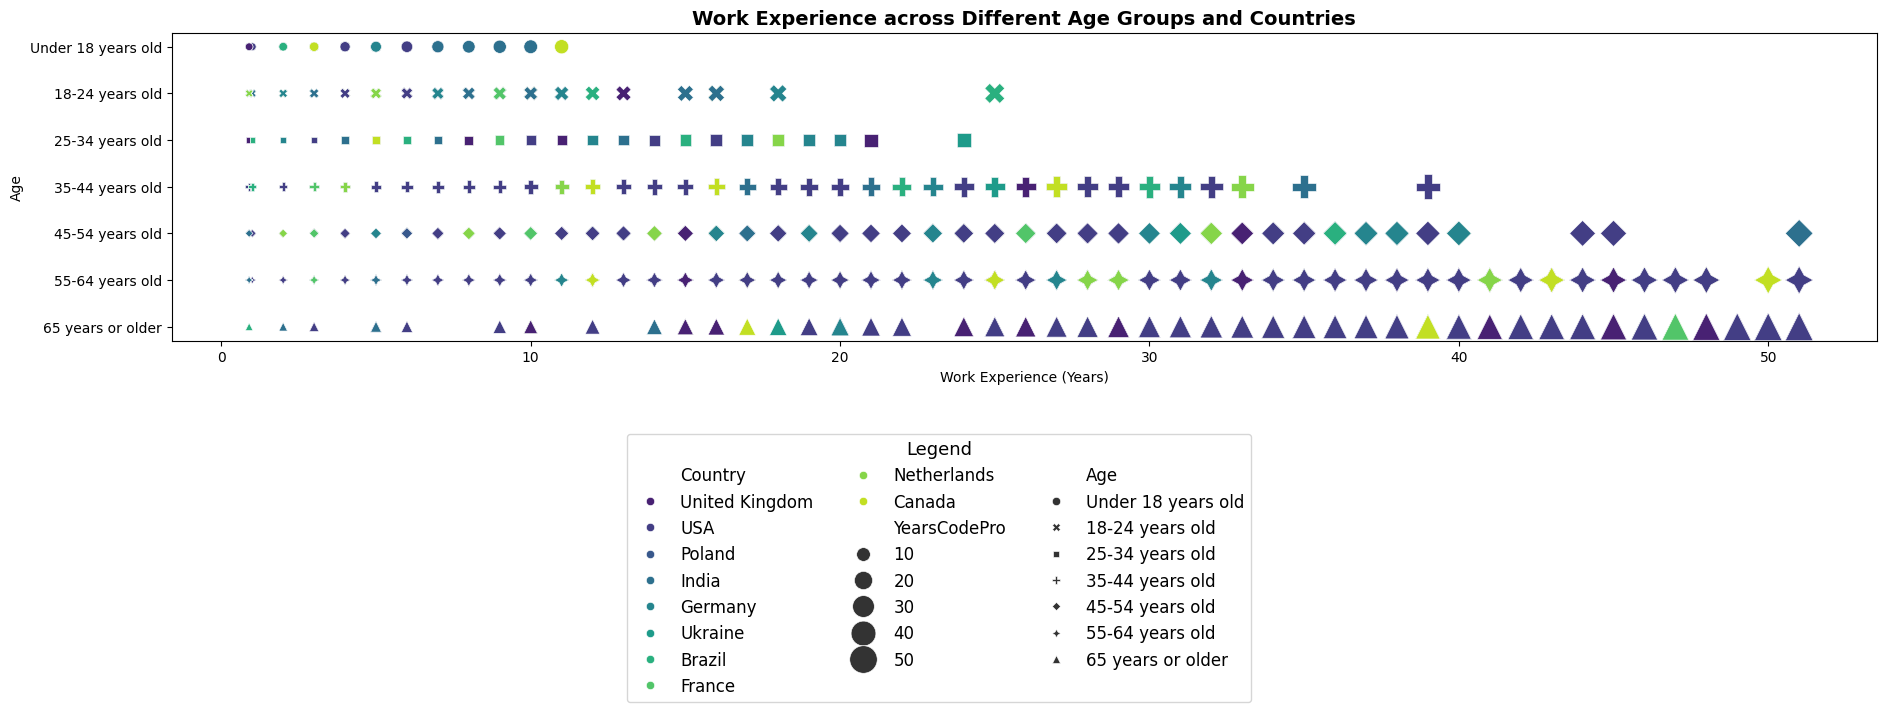

In [54]:
df_exp_age_country = df[['YearsCodePro', 'Age', 'Country']].copy()

# Drop rows with missing values 
df_exp_age_country = df_exp_age_country.dropna(subset=['YearsCodePro', 'Age', 'Country'])
# Drop rows with value 'Unknown'
df_exp_age_country.drop(df_exp_age_country.loc[df_exp_age_country['Country'] == 'Unknown'].index, inplace=True)
# Drop rows with value 'Prefer not to say' from column 'Age'
df_exp_age_country.drop(df_exp_age_country.loc[df_exp_age_country['Age'] == 'Prefer not to say'].index, inplace=True)

# Define age-group order
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', 
             '55-64 years old', '65 years or older']

# Convert the AgeGroup column to an ordered categorical
df_exp_age_country['Age'] = pd.Categorical(df_exp_age_country['Age'], categories=age_order, ordered=True)

# Top 10 Countries
top_10_countries = df_exp_age_country['Country'].value_counts().nlargest(10).index
df_top_10_countries = df_exp_age_country[df_exp_age_country['Country'].isin(top_10_countries)]

markers = ['o', 's', 'D', '^', 'P', 'X', 'z']

# Scatterplot - Bubble plot
plt.figure(figsize=(22, 4))
ax = sns.scatterplot(
    data=df_top_10_countries, 
    x='YearsCodePro', 
    y='Age',
    size='YearsCodePro',
    sizes=(30, 400),       # adjust bubble size range
    hue='Country',
    style='Age',           # marker by age group
    style_order=age_order,
    palette='viridis',    
    alpha=1
)
plt.xlabel('Work Experience (Years)')
plt.ylabel('Age')
plt.title('Work Experience across Different Age Groups and Countries', 
          fontweight='bold', fontsize=14)

# Get legend handles and labels
handles, labels = ax.get_legend_handles_labels()
# Rename YearsCodeProClean label in the legend
labels = [lbl.replace('YearsCodeProClean', 'Work Experience (Years)') for lbl in labels]
# Create bottom legend
plt.legend(
    handles,
    labels,
    title='Legend',
    loc='lower center',
    bbox_to_anchor=(0.45, -1.2),   
    ncol=3,                        
    frameon=True,
    fontsize=12,
    title_fontsize=13
)
plt.show()

* Distribution of Respondents Across Industries

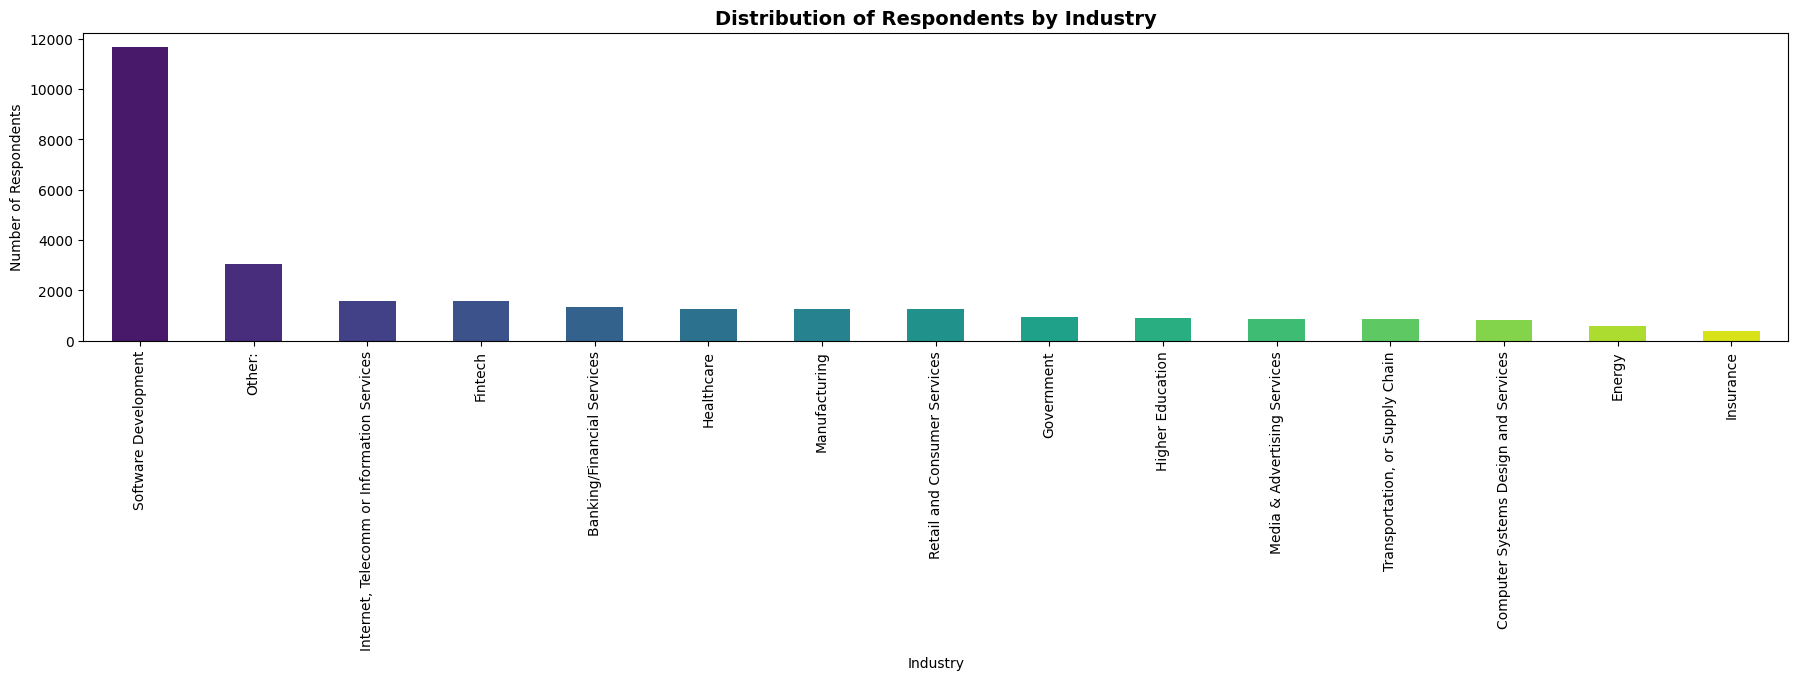

In [55]:
industry = df['Industry'].copy()
# Drop rows with 'Unknown'
industry = industry[industry != 'Unknown'].dropna()

industry_counts = industry.value_counts()

# Bar chart
colors = sns.color_palette('viridis', len(industry_counts))
plt.figure(figsize=(22,4))
industry_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Respondents by Industry', fontweight='bold', fontsize=14)
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=90)
plt.show()

The bar chart shows that the majority of respondents work for Software Development industry.

* Respondents by Main Branch

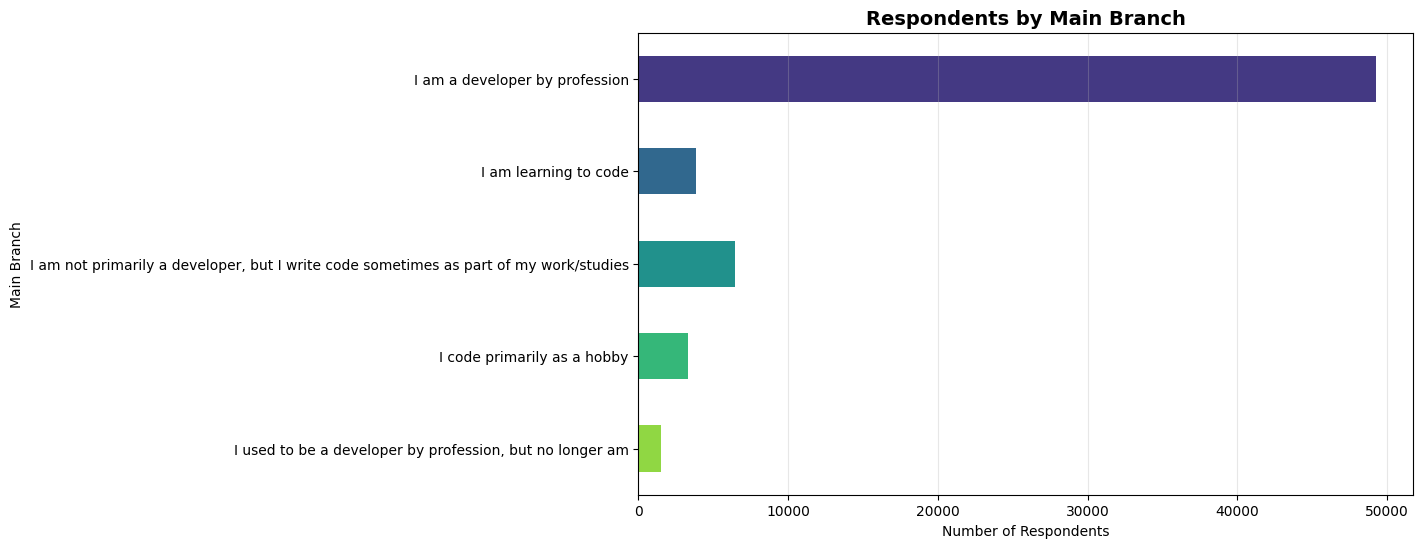

In [56]:
# Group to get frequency
mainbr_grouped = df.groupby(['MainBranch']).size().reset_index(name='Count')

# Bar chart
colors = sns.color_palette('viridis', n_colors=5)
mainbr_grouped.plot(kind='barh', x='MainBranch', y='Count', figsize=(10,6), color=colors, legend=False)
plt.title('Respondents by Main Branch', fontweight='bold', fontsize=14)
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.gca().invert_yaxis()  # Descending
plt.grid(axis='x', linestyle='-', alpha=0.3)
plt.show()

The bar chart shows that the majority of respondents are developers by profession.

* Remote Work Trends by Country

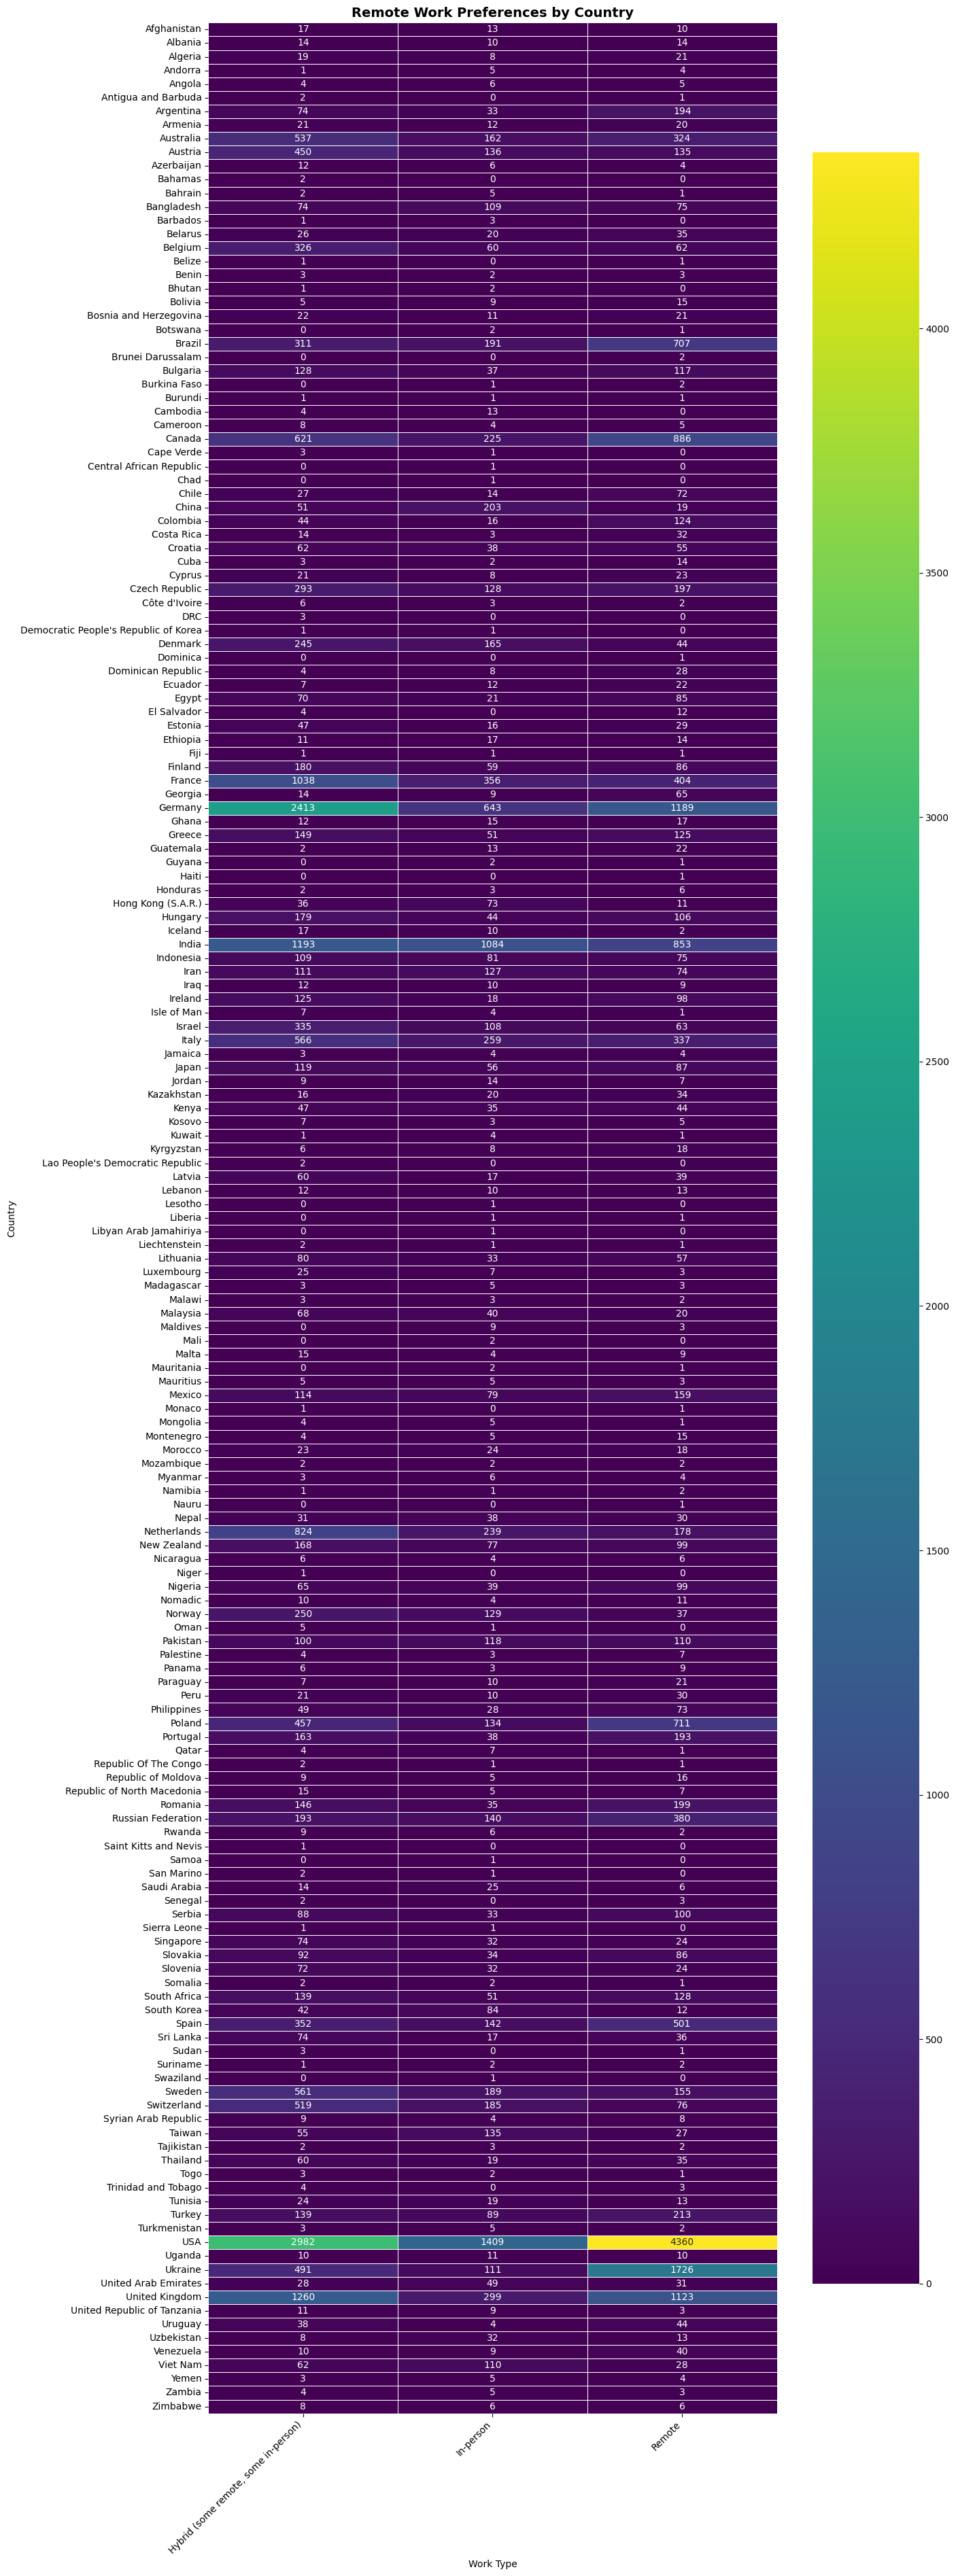

In [57]:
remote_country = df[['Country', 'RemoteWork']].dropna().copy()

# Drop rows with value 'Unknown'
remote_country.drop(remote_country.loc[remote_country['Country'] == 'Unknown'].index, inplace=True)
remote_country.drop(remote_country.loc[remote_country['RemoteWork'] == 'Unknown'].index, inplace=True)

# Count occurrences by Country and RemoteWork
remote_country_counts = remote_country.groupby(['Country', 'RemoteWork']).size().reset_index(name='Count')
# Pivot for heatmap 
remote_country_pivot = remote_country_counts.pivot(index='Country', columns='RemoteWork', 
                                                   values='Count').fillna(0)

# Heatmap
plt.figure(figsize=(14, 38))
sns.heatmap(remote_country_pivot, cmap='viridis', linewidths=0.5, annot=True, fmt='.0f')
plt.title('Remote Work Preferences by Country', fontweight='bold', fontsize=14)
plt.ylabel('Country')
plt.xlabel('Work Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

                             RemoteWork  Count
0  Hybrid (some remote, some in-person)  22693
1                             In-person  10856
2                                Remote  20279


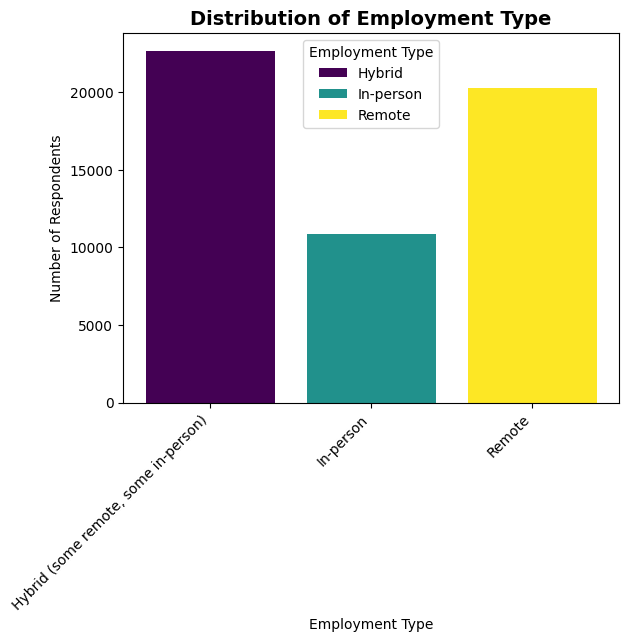

In [58]:
remote_total = df[['RemoteWork']].dropna().copy()
# Drop rows with 'Unknown'
remote_total = remote_total[remote_total != 'Unknown'].dropna()
# Count occurrences by RemoteWork
remote_total_counts = remote_total.groupby(['RemoteWork']).size().reset_index(name='Count')
print(remote_total_counts)

# Bar chart
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, remote_total_counts.shape[0]))
fig, ax = plt.subplots()
legend_labels = ['Hybrid', 'In-person', 'Remote']
ax.bar(remote_total_counts['RemoteWork'], remote_total_counts['Count'], label=legend_labels, color=colors)  
ax.set_xlabel('Employment Type')
ax.set_ylabel('Number of Respondents')
ax.set_title('Distribution of Employment Type', fontweight='bold', fontsize=14)
ax.legend(title='Employment Type')
plt.xticks(rotation=45, ha='right')
plt.show()

The charts show that hybrid employment type is the most popular between respondents, followed by remote work although in some countries, for example, USA, remote work is preferred.

* Analysis of Remote Work Preferences by Job Role

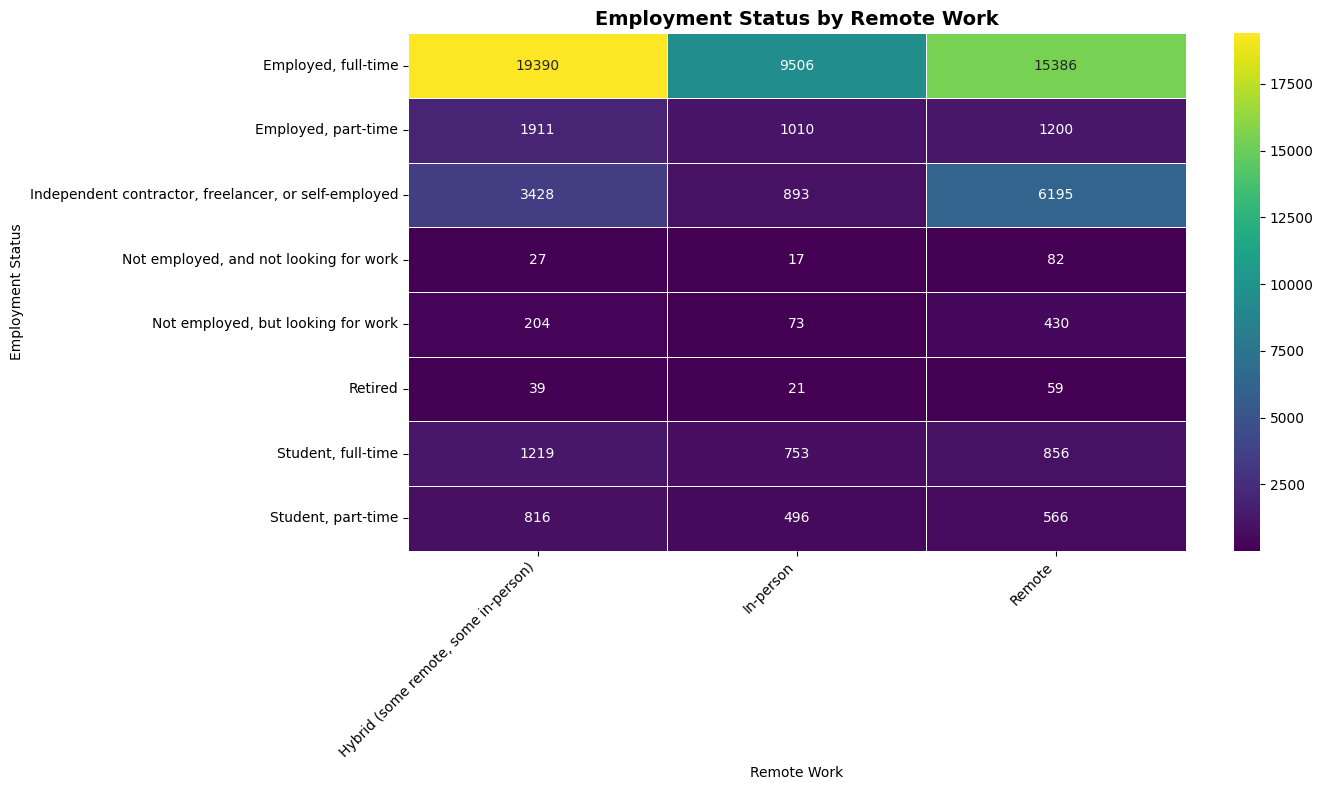

In [59]:
remote_employm = df[['RemoteWork', 'Employment']].dropna().copy()
# Drop rows with value 'Unknown'
remote_employm.drop(remote_employm.loc[remote_employm['RemoteWork'] == 'Unknown'].index, inplace=True)
# Expand multiple employment status into separate rows
remote_employm_expanded = remote_employm.assign(
    EmploymStatus=remote_employm['Employment'].str.split(';')).explode('EmploymStatus')
# Count occurrences by RemoteWork and Employment Status
employm_counts = remote_employm_expanded.groupby(['RemoteWork', 'EmploymStatus']).size().reset_index(name='Count')
# Pivot for heatmap (EmploymStatus vs RemoteWork)
employm_pivot = employm_counts.pivot(index='EmploymStatus', columns='RemoteWork', values='Count').fillna(0)

# Heatmap for employment type
plt.figure(figsize=(14, 8))
sns.heatmap(employm_pivot, cmap='viridis', linewidths=0.5, annot=True, fmt='.0f')
plt.title('Employment Status by Remote Work', fontweight='bold', fontsize=14)
plt.ylabel('Employment Status')
plt.xlabel('Remote Work')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The heatmap shows that hybrid (some remote, some - in person) option is the most frequent choice, especially between full-time employed respondents.

* Top 5 Developer Roles

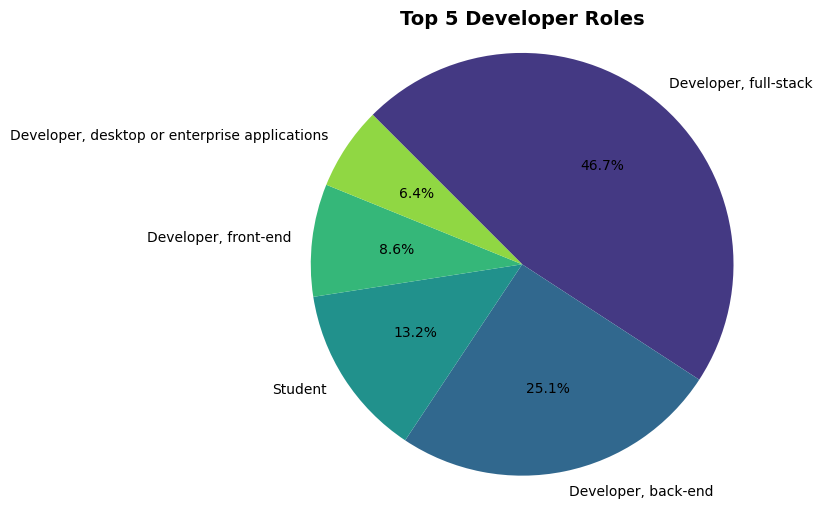

In [60]:
# Drop rows with missing values 
df_dev = df.dropna(subset=['DevType']).copy()

# Drop rows with value 'Unknown'
df_dev.drop(df_dev.loc[df_dev['DevType'] == 'Unknown'].index, inplace=True)

# Count frequencies
top_5_dev = df_dev['DevType'].value_counts().nlargest(5)

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_5_dev.values, labels=top_5_dev.index, autopct='%1.1f%%', startangle=135, 
        colors=sns.color_palette('viridis', n_colors=5), counterclock=False)
plt.title('Top 5 Developer Roles', fontweight='bold', fontsize=14)
plt.axis('equal') 
plt.show()

The pie chart shows that almost half (46.7%) of respondents are full-stack developers, followed by back-end developers (25.1%) and students (13.2%).

* Yearly Compensation Across Developer Roles

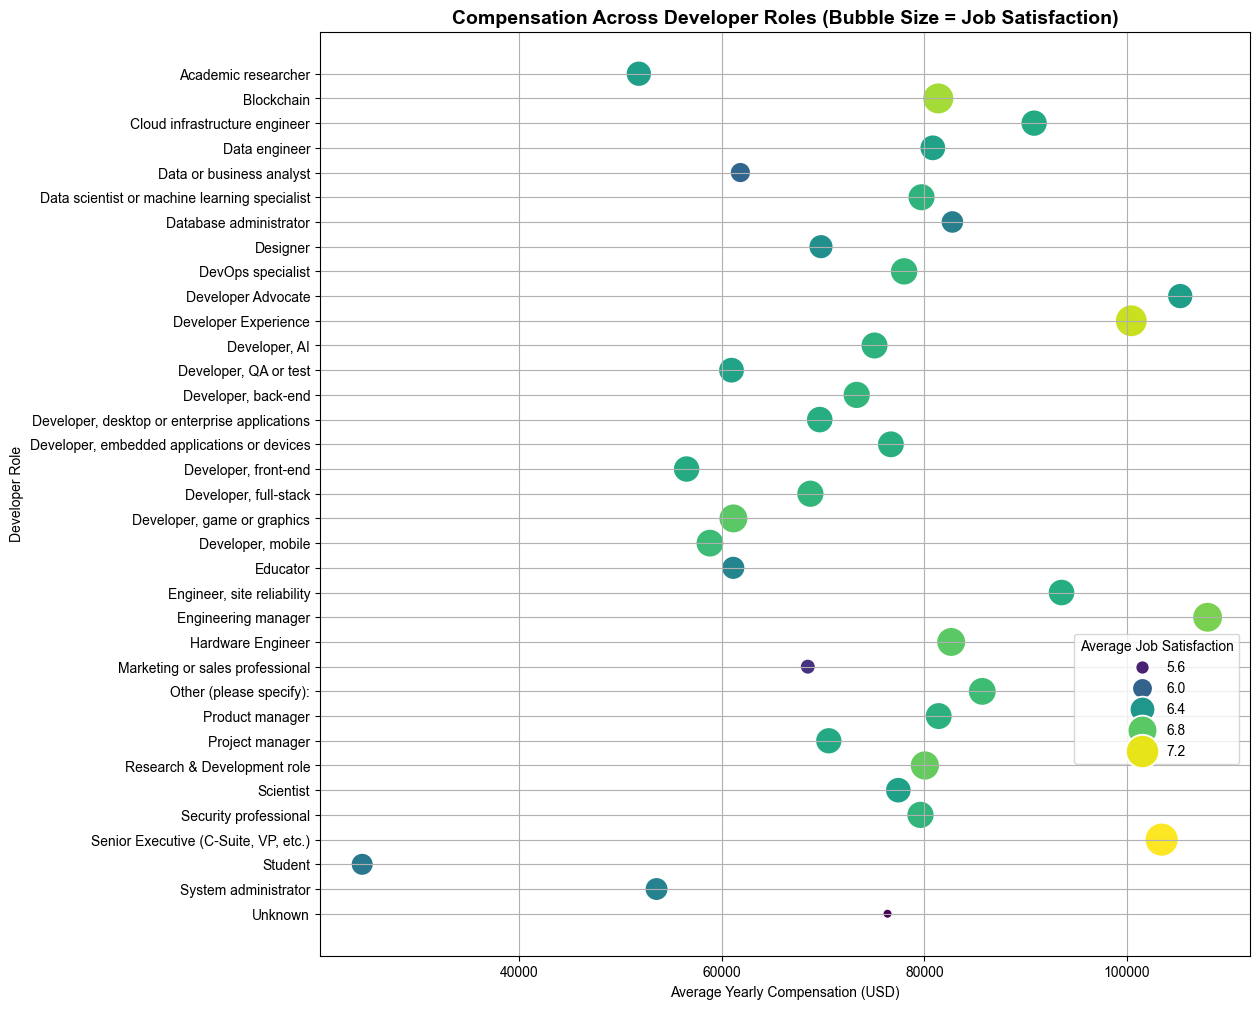

In [61]:
df_dev_comp = df[['DevType', 'ConvertedCompYearly', 'JobSat']].dropna().copy()

# Remove negative or zero values
df_dev_comp = df_dev_comp[df_dev_comp['ConvertedCompYearly'] > 0]

# Aggregate by DevType
df_dev_comp_plot = df_dev_comp.groupby('DevType').agg({'ConvertedCompYearly': 'mean', 'JobSat': 'mean'}).reset_index()

# Scatterplot - Bubble plot
plt.figure(figsize=(12, 12))
ax = sns.scatterplot(
    data=df_dev_comp_plot, 
    x='ConvertedCompYearly', 
    y='DevType',
    size='JobSat',
    sizes=(50, 600),       
    hue='JobSat',
    palette='viridis',    
    alpha=1
)
plt.xlabel('Average Yearly Compensation (USD)')
plt.ylabel('Developer Role')
plt.title('Compensation Across Developer Roles (Bubble Size = Job Satisfaction)', fontweight='bold', fontsize=14)
plt.legend(
    title='Average Job Satisfaction',
    loc='lower center',
    bbox_to_anchor=(0.9, 0.2),   
    frameon=True
)
sns.set_style('whitegrid', {'grid.linestyle': ':'})
plt.grid(True)
plt.show()

The bubble plot shows that such roles like Engineering Manager, Developer Advocate, and Senior Executive are better paid and shows slightly higher job satisfaction. 

* Median Compensation and Job Satisfaction Across Age Groups

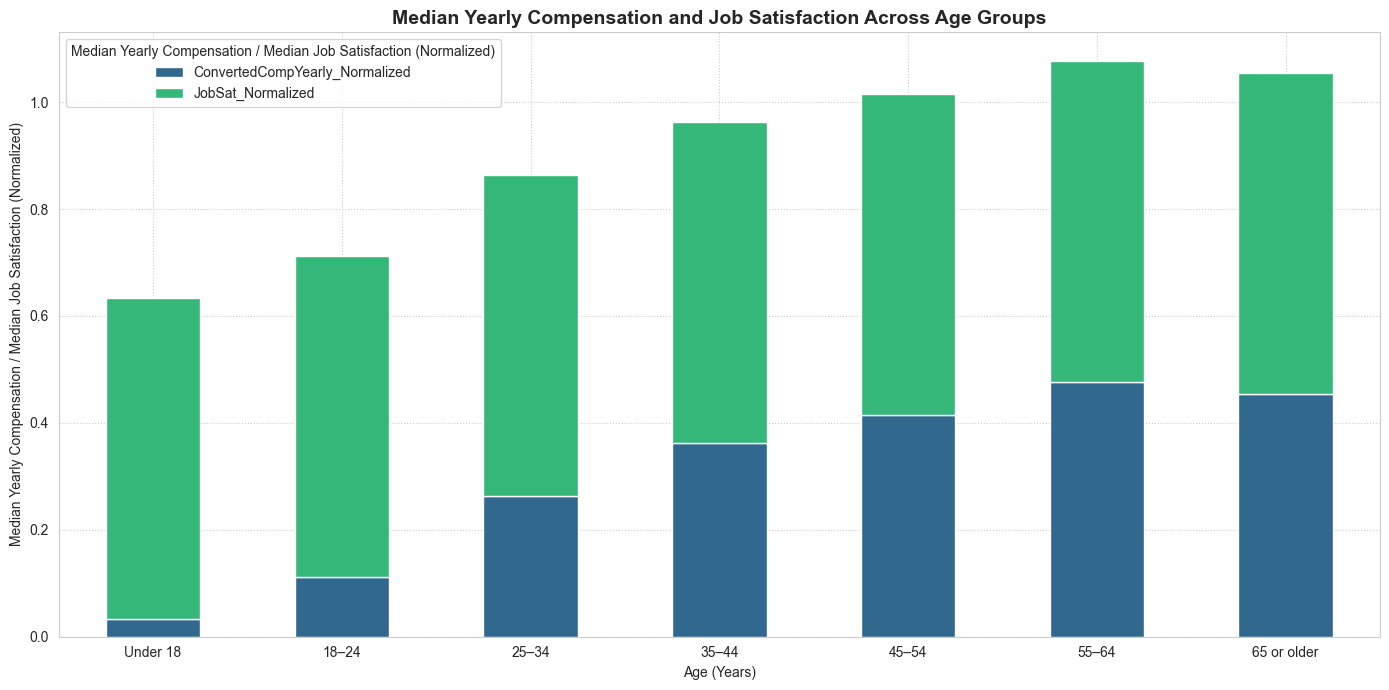

In [62]:
df_convcomp_jobsat = df[['Age_Number', 'ConvertedCompYearly', 'JobSat']].dropna().copy()

# Remove negative or zero values 
df_convcomp_jobsat = df_convcomp_jobsat[df_convcomp_jobsat['ConvertedCompYearly'] > 0]

# Normalize 
df_convcomp_jobsat['ConvertedCompYearly_Normalized'] = (df_convcomp_jobsat['ConvertedCompYearly'] - 
    df_convcomp_jobsat['ConvertedCompYearly'].min()) / (df_convcomp_jobsat['ConvertedCompYearly'].max() - 
    df_convcomp_jobsat['ConvertedCompYearly'].min())
df_convcomp_jobsat['JobSat_Normalized'] = (df_convcomp_jobsat['JobSat'] - 
    df_convcomp_jobsat['JobSat'].min()) / (df_convcomp_jobsat['JobSat'].max() - 
    df_convcomp_jobsat['JobSat'].min())

# Group by Age and calculate median
convcomp_jobsat_plot = df_convcomp_jobsat.groupby('Age_Number')[['ConvertedCompYearly_Normalized', 
                                                                'JobSat_Normalized']].median()

colors=sns.color_palette('viridis', n_colors=2)
age_labels = {17: 'Under 18', 21: '18–24', 29.5: '25–34', 39.5: '35–44', 49.5: '45–54', 59.5: '55–64', 
              70: '65 or older'}

# Stacked bar chart
fig, ax = plt.subplots(figsize=(14, 7))
convcomp_jobsat_plot.plot(kind='bar', stacked=True, ax=ax, color=colors)
ax.set_title('Median Yearly Compensation and Job Satisfaction Across Age Groups', fontweight='bold', fontsize=14)
ax.set_ylabel('Median Yearly Compensation / Median Job Satisfaction (Normalized)')
ax.set_xlabel('Age (Years)')
ax.set_xticklabels([age_labels[i] for i in convcomp_jobsat_plot.index])
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.legend(title='Median Yearly Compensation / Median Job Satisfaction (Normalized)')
plt.show()

* Median Yearly Compensation Over Experience Level

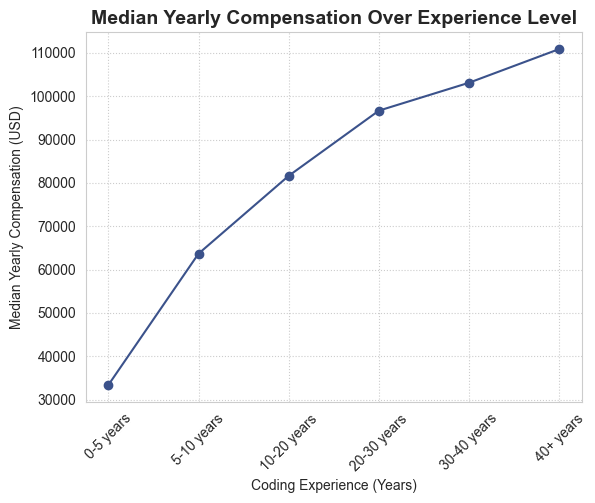

In [63]:
df_exp_comp = df[['ExperienceRange', 'ConvertedCompYearly']].dropna().copy()

# Remove negative or zero values 
df_exp_comp = df_exp_comp[df_exp_comp['ConvertedCompYearly'] > 0]

# Group by ExperienceRange and calculate median
exp_comp_grouped = df_exp_comp.groupby('ExperienceRange', observed=False)[['ConvertedCompYearly']].median().reset_index()

# Line chart
plt.plot(exp_comp_grouped['ExperienceRange'], exp_comp_grouped['ConvertedCompYearly'], color=viridis_colors[3], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Coding Experience (Years)')
plt.ylabel('Median Yearly Compensation (USD)')
plt.title('Median Yearly Compensation Over Experience Level', fontweight='bold', fontsize=14)
plt.grid(True, axis='y')
plt.show()

The line chart shows that as respondents' experience increases their yearly compensation tend to increase as well.

* Analysis of Job Experience and Job Satisfaction

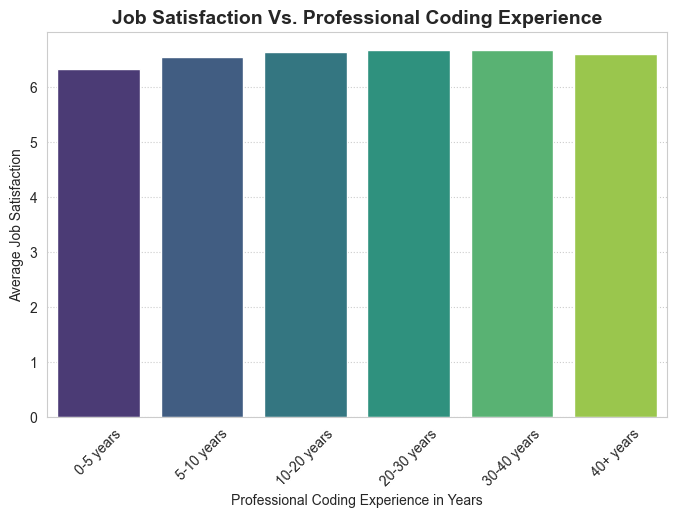

In [64]:
exp_job_sat = df[['JobSat', 'ExperienceRange']].dropna().copy()
# Calculate the mean 'JobSat' for each Experience range:
# Convert JobSat to numeric 
exp_job_sat['JobSat'] = exp_job_sat['JobSat'].astype('category').cat.codes
# Group by ExperienceRange and calculate mean job satisfaction
median_job_satisfaction = exp_job_sat.groupby('ExperienceRange', observed=False)['JobSat'].mean()

# Bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=median_job_satisfaction.index, y=median_job_satisfaction.values, \
            hue=median_job_satisfaction.index, legend=False, palette='viridis')

plt.xlabel('Professional Coding Experience in Years')
plt.ylabel('Average Job Satisfaction')
plt.title('Job Satisfaction Vs. Professional Coding Experience', fontweight='bold', fontsize=14)
plt.xticks(rotation=45)
plt.show()

The bar chart shows the relationship between years of professional coding experience and job satisfaction indicationg that job satisfaction slightly increases with more years of experience.

* Programming Languages Analysis

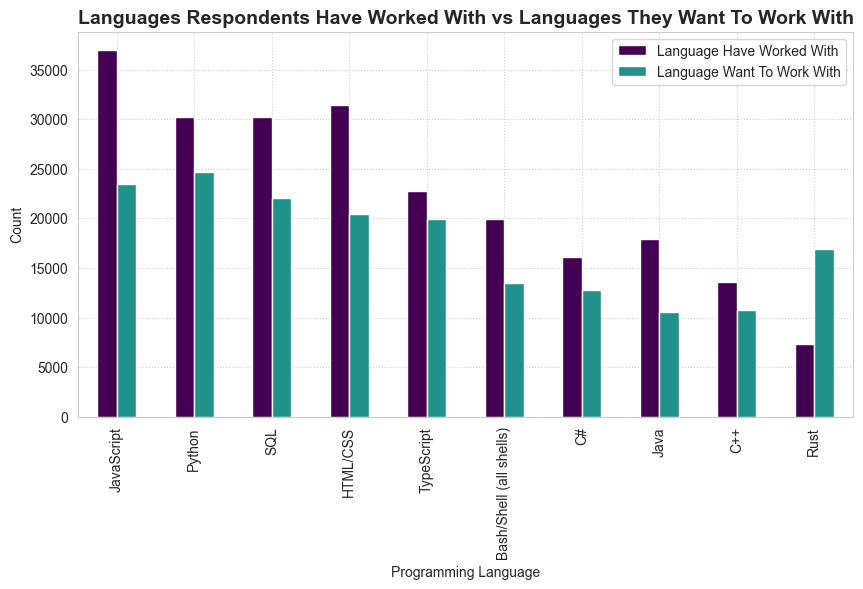

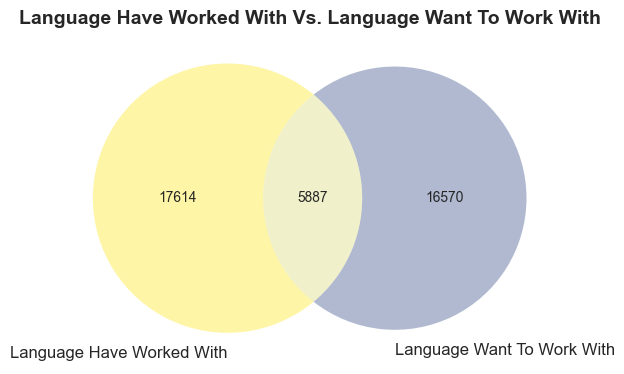

In [65]:
languages = df[['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']].dropna().copy()
# Expand multiple LanguagesHaveWorkedWith into separate rows
langHaveWorkedWith_expanded = languages.assign(
    LanguageHaveWorkedWith=languages['LanguageHaveWorkedWith'].str.split(';')
).explode('LanguageHaveWorkedWith')
# Expand multiple LanguagesWantToWorkWith into separate rows
langWantToWorkWith_expanded = languages.assign(
    LanguageWantToWorkWith=languages['LanguageWantToWorkWith'].str.split(';')
).explode('LanguageWantToWorkWith')

# Count occurrences by LanguageHaveWorkedWith
total_lang_counts_have_worked = langHaveWorkedWith_expanded.groupby(['LanguageHaveWorkedWith']).size().\
    reset_index(name='Count')
# Count occurrences by LanguageWantToWorkWith
total_lang_counts_want_to_work = langWantToWorkWith_expanded.groupby(['LanguageWantToWorkWith']).size().\
    reset_index(name='Count')

df_lang_have_worked_with = total_lang_counts_have_worked.rename(columns={
    'LanguageHaveWorkedWith': 'Language',
    'Count': 'Language Have Worked With'
})
df_lang_want_to_work_with = total_lang_counts_want_to_work.rename(columns={
    'LanguageWantToWorkWith': 'Language',
    'Count': 'Language Want To Work With'
})
merged = df_lang_have_worked_with.merge(df_lang_want_to_work_with, on='Language', how='outer')
merged = merged.set_index('Language')

# Sort by total interest
merged['Total'] = merged['Language Have Worked With'] + merged['Language Want To Work With']
top_10_lang = merged.sort_values(by='Total', ascending=False).head(10)

# Bar chart
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, top_10_lang.shape[1]))
top_10_lang[['Language Have Worked With', 'Language Want To Work With']].plot(kind='bar', figsize=(10,5), 
        color=colors)
plt.title('Languages Respondents Have Worked With vs Languages They Want To Work With', fontweight='bold', 
        fontsize=14)
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.show()


# Venn Diagram: Languages Worked With vs. Languages Want To Work With
set1 = set(df['LanguageHaveWorkedWith'].dropna().unique())
set2 = set(df['LanguageWantToWorkWith'].dropna().unique())
frequency_comparison = df.groupby(['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']).size().reset_index(name='count')

# Venn diagram
labels = ('Language Have Worked With', 'Language Want To Work With')
values = (set1, set2)
fig, ax = plt.subplots()
venn = venn2(subsets=values, set_labels=labels, ax=ax, set_colors=('#fde725','#3b528b'))
ax.set_title('Language Have Worked With Vs. Language Want To Work With', fontweight='bold', fontsize=14)
plt.show()

The bar chart shows that the top 4 programming languages respondents have worked with are also the languages most respondents would like to work with: JavaScript, Python, SQL, and HTML/CSS.

* Analysis of Programming Language Trends by Region

In [66]:
lang_country = df[['Country', 'LanguageHaveWorkedWith']].dropna().copy()
# Expand multiple languages into separate rows
lang_country_expanded = lang_country.assign(
    Language=lang_country['LanguageHaveWorkedWith'].str.split(';')
).explode('Language')
# Count occurrences by Country and Language
lang_counts = lang_country_expanded.groupby(['Country', 'Language']).size().reset_index(name='Count')
# Pivot for heatmap (Language vs Country)
lang_pivot = lang_counts.pivot(index='Language', columns='Country', values='Count').fillna(0)
# Filter top 10 languages
top_10_languages = lang_counts.groupby('Language')['Count'].sum().nlargest(10).index
lang_pivot_top = lang_pivot.loc[top_10_languages]

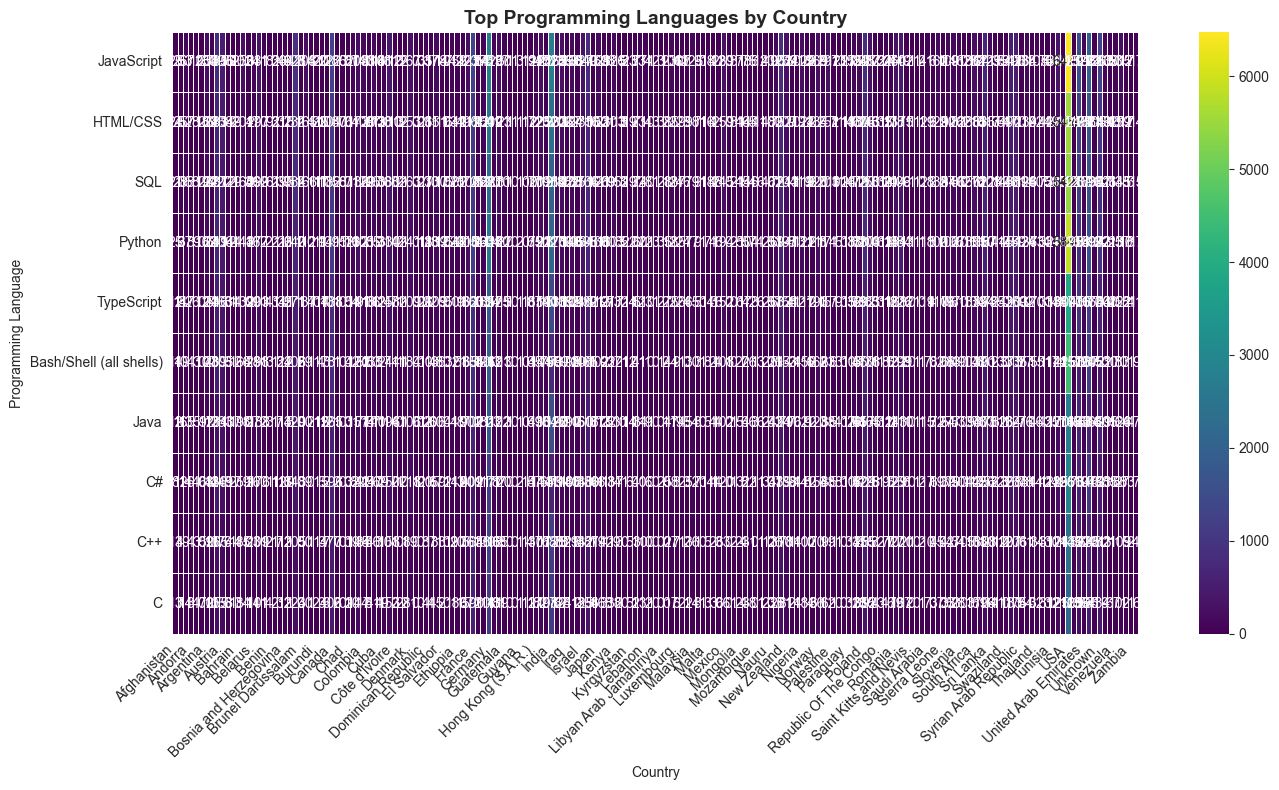

In [67]:
# Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(lang_pivot_top, cmap='viridis', linewidths=0.5, annot=True, fmt='.0f')
plt.title('Top Programming Languages by Country', fontweight='bold', fontsize=14)
plt.ylabel('Programming Language')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

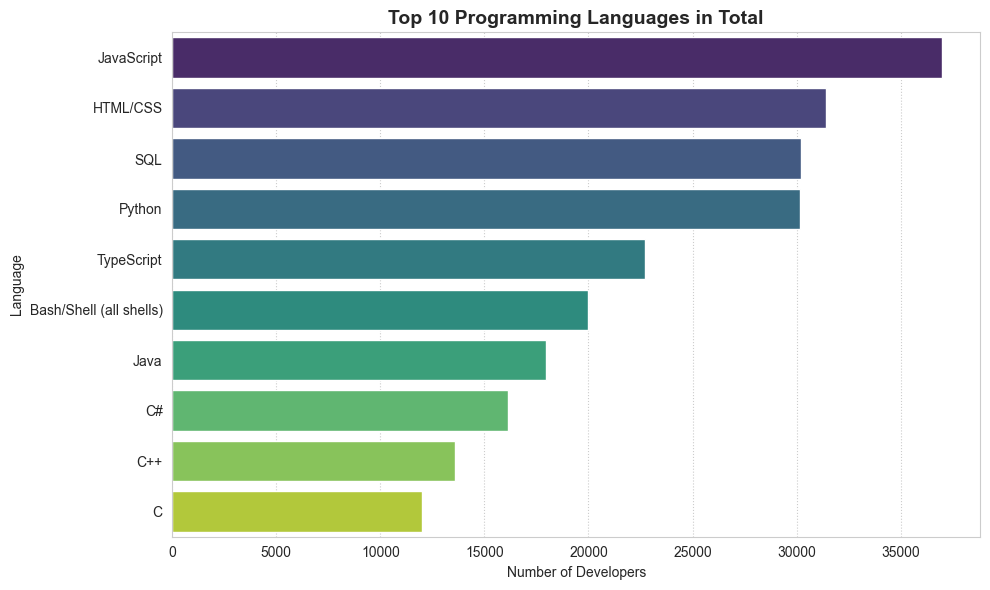

In [68]:
# Bar plot for Total Top 10 Languages

# Count occurrences by Language
total_lang_counts = lang_country_expanded.groupby(['Language']).size().reset_index(name='Count')

# Filter top 10 languages
top_10_languages_total = total_lang_counts.groupby('Language')['Count'].sum().nlargest(10)

#Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_languages_total.values, y=top_10_languages_total.index, hue=top_10_languages_total.index, \
            legend=False, palette='viridis') 
plt.title('Top 10 Programming Languages in Total', fontweight='bold', fontsize=14)
plt.xlabel('Number of Developers')
plt.ylabel('Language')
plt.tight_layout()
plt.show()

* Programming Language Have Worked With by Age

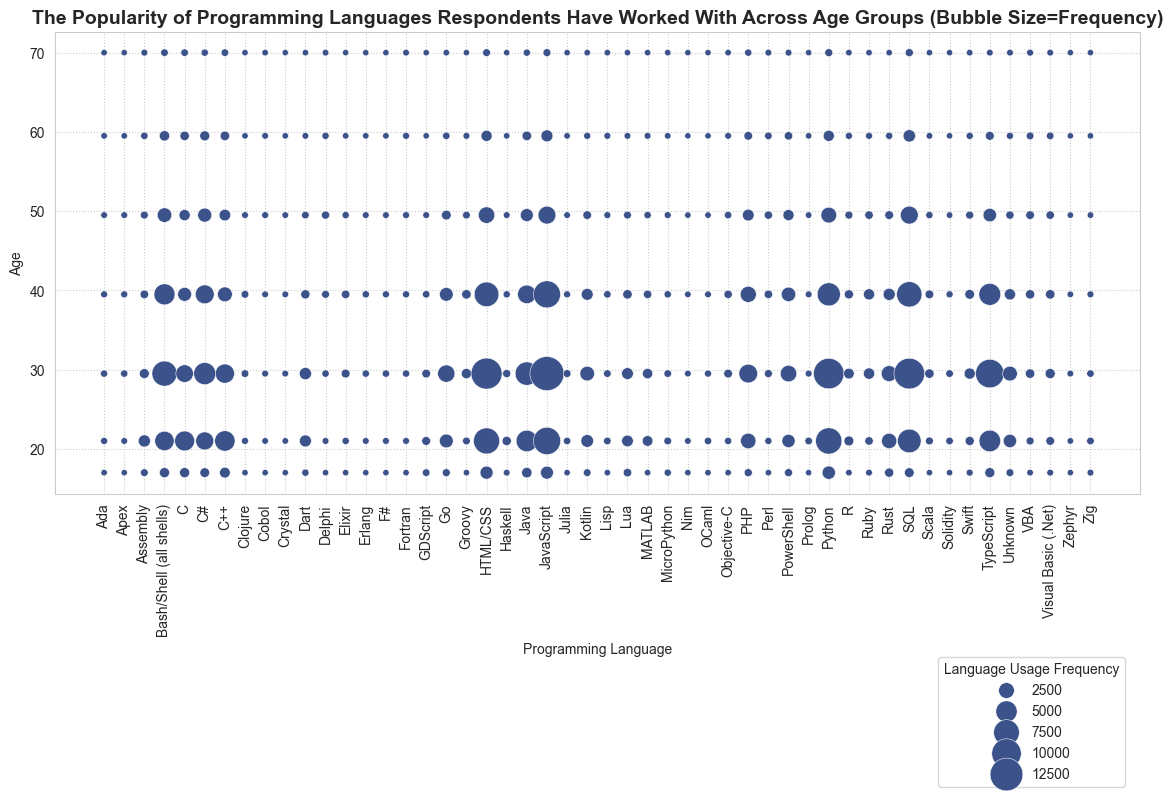

In [69]:
df_lang_age = df[['LanguageHaveWorkedWith', 'Age_Number']].dropna().copy()

# Expand multiple languages into separate rows
df_lang_age['LanguageHaveWorkedWith'] = df_lang_age['LanguageHaveWorkedWith'].str.split(';')
df_lang_age = df_lang_age.explode('LanguageHaveWorkedWith')
df_lang_age['LanguageHaveWorkedWith'] = df_lang_age['LanguageHaveWorkedWith'].str.strip()

# Group by age and language to get frequency
lang_age_grouped = df_lang_age.groupby(['Age_Number', 'LanguageHaveWorkedWith']).size().reset_index(name='Frequency')

# Bubble chart
plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=lang_age_grouped,
    x='LanguageHaveWorkedWith', 
    y='Age_Number',
    size='Frequency',
    sizes=(20, 600),
    #hue='Frequency',
    #palette='flare',
    alpha=1,
    color=viridis_colors[3]
)
plt.xlabel('Programming Language')
plt.ylabel('Age')
plt.title('The Popularity of Programming Languages Respondents Have Worked With Across Age Groups (Bubble Size=Frequency)', 
          fontweight='bold', fontsize=14)
plt.xticks(rotation=90)
plt.legend(
    title='Language Usage Frequency',
    loc='lower center',
    bbox_to_anchor=(0.9, -0.65),   
    frameon=True
)
plt.grid(True)
plt.show()

The charts show that the most popular programming languages respondents have worked with are Javascript followed by SQL, HTML/CSS, and Python - across all age groups.

* Preferred Languages by Age Group

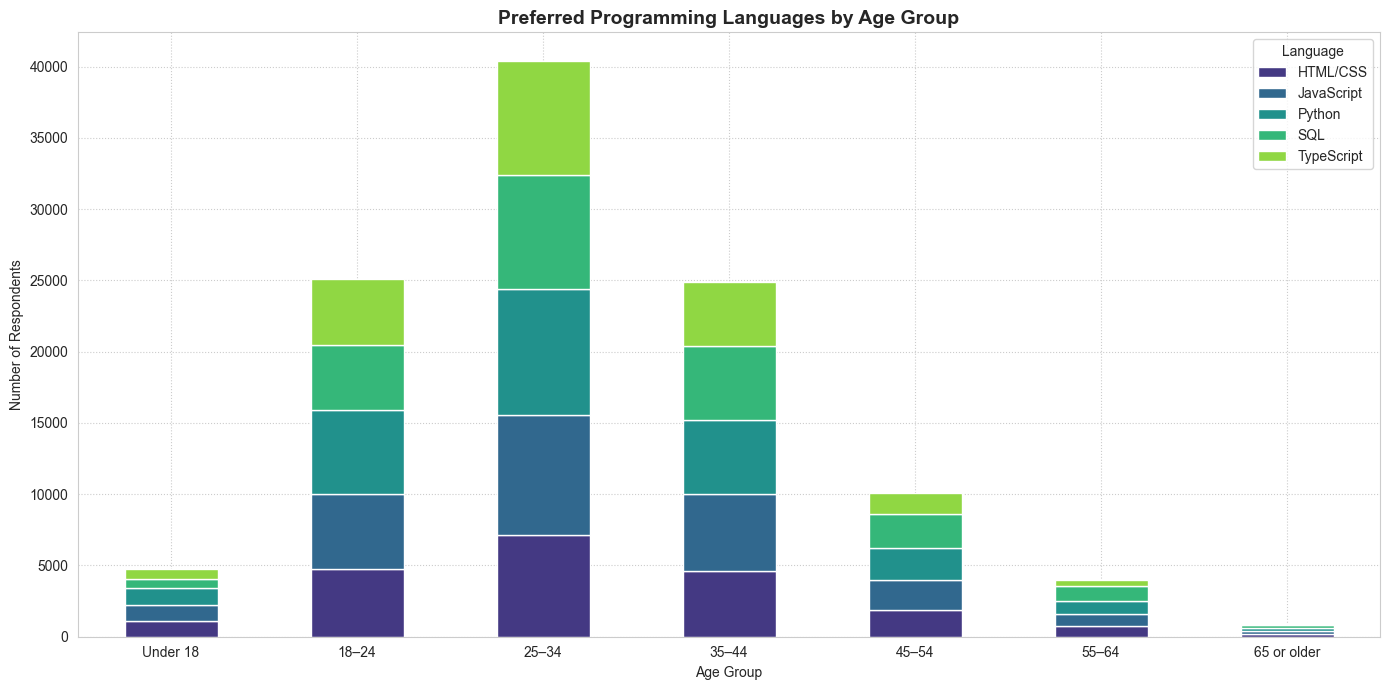

In [70]:
df_lang_age = df[['Age_Number', 'LanguageWantToWorkWith']].dropna().copy()

# Split and explode
df_lang_age['Language'] = df_lang_age['LanguageWantToWorkWith'].str.split(';')
df_lang_age_exploded = df_lang_age.explode('Language')

# Strip whitespaces
df_lang_age_exploded['Language'] = df_lang_age_exploded['Language'].str.strip()

# Compute the top 5 db overall
top_5_lang = (
    df_lang_age_exploded.groupby('Language')
    .size()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter the original dataset to keep only the top 5
df_top_5_lang = df_lang_age_exploded[df_lang_age_exploded['Language'].isin(top_5_lang)]

# Stacked bar dataset
df_db_plot = (
    df_top_5_lang
    .groupby(['Age_Number', 'Language'])
    .size()
    .unstack(fill_value=0)
)

colors=sns.color_palette('viridis', n_colors=5)
age_labels = {17: 'Under 18', 21: '18–24', 29.5: '25–34', 39.5: '35–44', 49.5: '45–54', 59.5: '55–64', 
              70: '65 or older'}

# Stacked bar chart
fig, ax = plt.subplots(figsize=(14, 7))
df_db_plot.plot(kind='bar', stacked=True, ax=ax, color=colors)
ax.set_title('Preferred Programming Languages by Age Group', fontweight='bold', fontsize=14)
ax.set_ylabel('Number of Respondents')
ax.set_xlabel('Age Group')
ax.set_xticklabels([age_labels[i] for i in df_db_plot.index])
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.legend(title='Language')
plt.show()

The stacked bar chart shows that the most popular programming languages respondents would like to work with are Javascript, SQL, and Python - across all age groups.

* Databases Have Worked With vs. Job Satisfaction

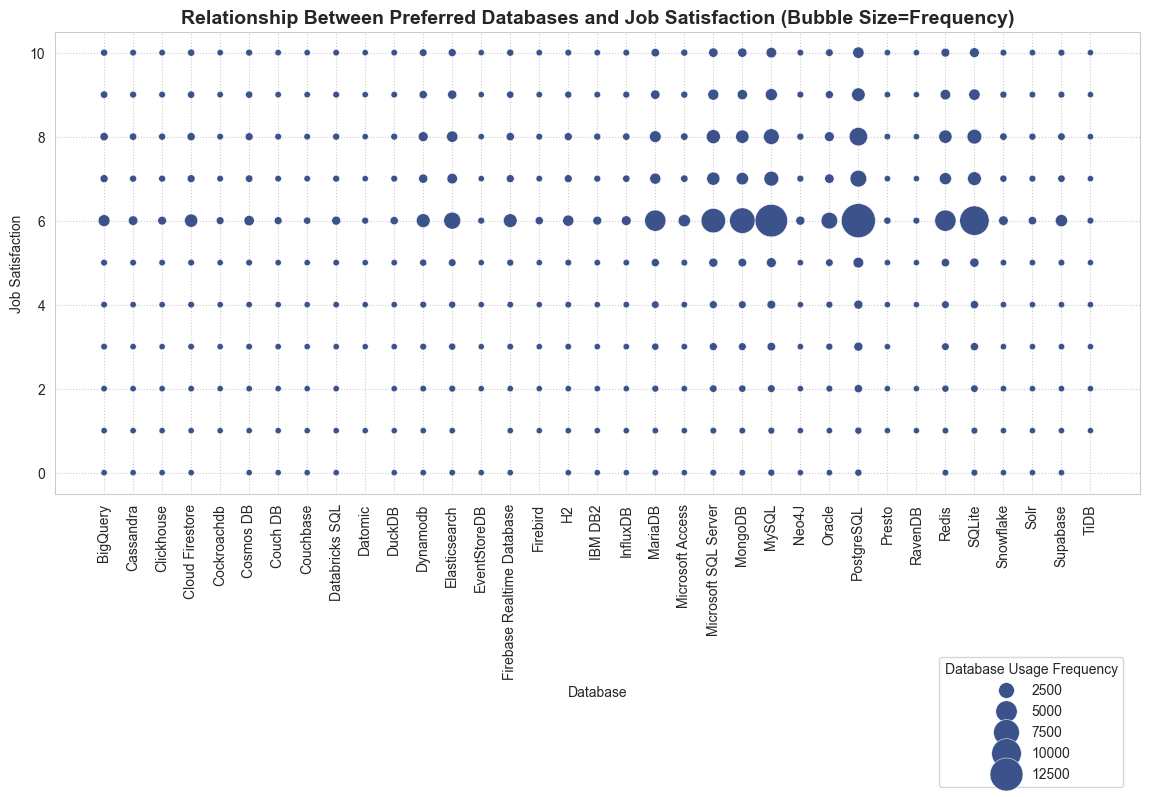

In [71]:
df_db_jobsat = df[['DatabaseHaveWorkedWith', 'JobSat']].dropna().copy()
# Drop rows with value 'Unknown'
df_db_jobsat.drop(df_db_jobsat.loc[df_db_jobsat['DatabaseHaveWorkedWith'] == 'Unknown'].index, inplace=True)

# Expand multiple db into separate rows
df_db_jobsat['DatabaseHaveWorkedWith'] = df_db_jobsat['DatabaseHaveWorkedWith'].str.split(';')
df_db_jobsat = df_db_jobsat.explode('DatabaseHaveWorkedWith')
df_db_jobsat['DatabaseHaveWorkedWith'] = df_db_jobsat['DatabaseHaveWorkedWith'].str.strip()

# Group by age and language to get frequency
db_jobsat_grouped = df_db_jobsat.groupby(['DatabaseHaveWorkedWith', 'JobSat']).size().reset_index(name='Frequency')

# Bubble chart
plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=db_jobsat_grouped,
    x='DatabaseHaveWorkedWith', 
    y='JobSat',
    size='Frequency',
    sizes=(20, 600),
    #hue='Frequency',
    #palette='flare',
    alpha=1,
    color=viridis_colors[3]
)
plt.xlabel('Database')
plt.ylabel('Job Satisfaction')
plt.title('Relationship Between Preferred Databases and Job Satisfaction (Bubble Size=Frequency)', 
          fontweight='bold', fontsize=14)
plt.xticks(rotation=90)
plt.legend(
    title='Database Usage Frequency',
    loc='lower center',
    bbox_to_anchor=(0.9, -0.65),   
    frameon=True
)
plt.show()

The most popular databases respondents have worked with are PostreSQL, MySQL, and SQLite, and overall respondents' job satisfaction is around 6 (out of 10).

* Preferred Databases by Age Group

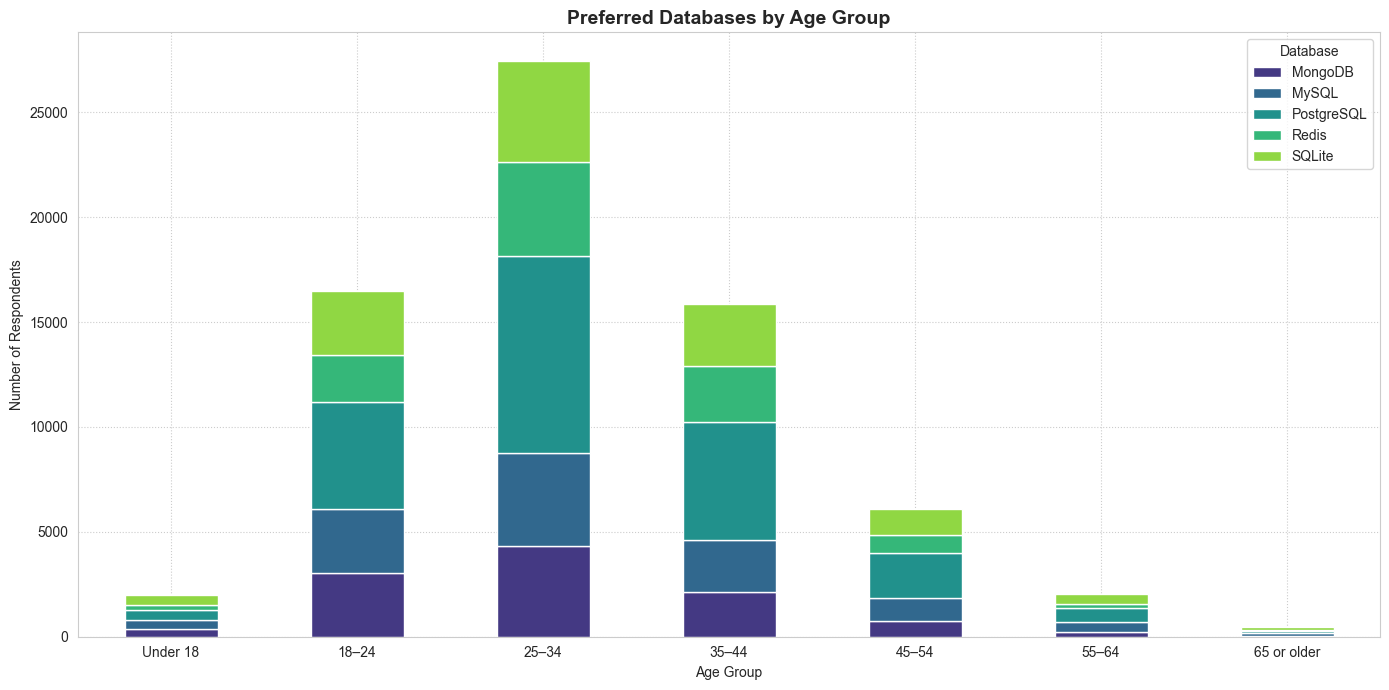

In [72]:
df_db_age = df[['Age_Number', 'DatabaseWantToWorkWith']].dropna().copy()
# Drop rows with value 'Unknown'
df_db_age.drop(df_db_age.loc[df_db_age['DatabaseWantToWorkWith'] == 'Unknown'].index, inplace=True)

# Split and explode
df_db_age['Databases'] = df_db_age['DatabaseWantToWorkWith'].str.split(';')
df_db_age_exploded = df_db_age.explode('Databases')

# Strip whitespaces
df_db_age_exploded['Databases'] = df_db_age_exploded['Databases'].str.strip()

# Compute the top 5 db overall
top_5_db = (
    df_db_age_exploded.groupby('Databases')
    .size()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter the original dataset to keep only the top 5
df_top_5_db = df_db_age_exploded[df_db_age_exploded['Databases'].isin(top_5_db)]

# Stacked bar dataset
df_db_plot = (
    df_top_5_db
    .groupby(['Age_Number', 'Databases'])
    .size()
    .unstack(fill_value=0)
)

colors=sns.color_palette('viridis', n_colors=5)
age_labels = {17: 'Under 18', 21: '18–24', 29.5: '25–34', 39.5: '35–44', 49.5: '45–54', 59.5: '55–64', 
              70: '65 or older'}

# Stacked bar chart
fig, ax = plt.subplots(figsize=(14, 7))
df_db_plot.plot(kind='bar', stacked=True, ax=ax, color=colors)
ax.set_title('Preferred Databases by Age Group', fontweight='bold', fontsize=14)
ax.set_ylabel('Number of Respondents')
ax.set_xlabel('Age Group')
ax.set_xticklabels([age_labels[i] for i in df_db_plot.index])
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.legend(title='Database')
plt.show()

The most popular databases respondents would like to work with are PostreSQL, MySQL, SQLite, and Redis - across all age groups.

* Preferred Web Frameworks vs. Job Satisfaction

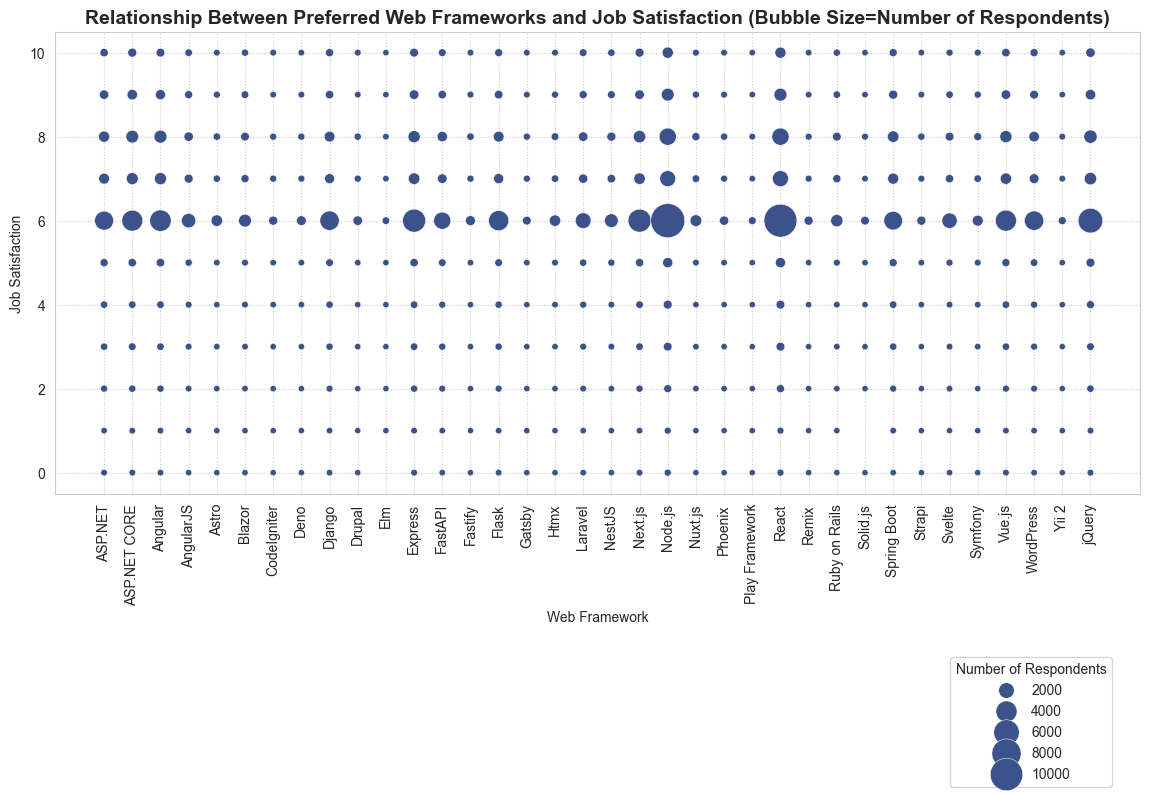

In [73]:
df_webfr_jobsat = df[['WebframeHaveWorkedWith', 'JobSat']].dropna().copy()
# Drop rows with value 'Unknown'
df_webfr_jobsat.drop(df_webfr_jobsat.loc[df_webfr_jobsat['WebframeHaveWorkedWith'] == 'Unknown'].index, inplace=True)

# Expand multiple web frameworks into separate rows
df_webfr_jobsat['WebframeHaveWorkedWith'] = df_webfr_jobsat['WebframeHaveWorkedWith'].str.split(';')
df_webfr_jobsat = df_webfr_jobsat.explode('WebframeHaveWorkedWith')
df_webfr_jobsat['WebframeHaveWorkedWith'] = df_webfr_jobsat['WebframeHaveWorkedWith'].str.strip()

# Group by age and web framework to get frequency
webfr_jobsat_grouped = df_webfr_jobsat.groupby(['WebframeHaveWorkedWith', 'JobSat']).size().reset_index(name='Frequency')

# Bubble chart
plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=webfr_jobsat_grouped,
    x='WebframeHaveWorkedWith', 
    y='JobSat',
    size='Frequency',
    sizes=(20, 600),
    #hue='Frequency',
    #palette='flare',
    alpha=1,
    color=viridis_colors[3]
)
plt.xlabel('Web Framework')
plt.ylabel('Job Satisfaction')
plt.title('Relationship Between Preferred Web Frameworks and Job Satisfaction (Bubble Size=Number of Respondents)', 
          fontweight='bold', fontsize=14)
plt.xticks(rotation=90)
plt.legend(
    title='Number of Respondents',
    loc='lower center',
    bbox_to_anchor=(0.9, -0.65),   
    frameon=True
)
plt.grid(True)
plt.show()

The most popular web frameworks respondents would like to work with are Node.js, React, and jQuery, and overall job satisfaction among respondents is around 6 (out of 10).

* Top 5 Collaboration Tools Used

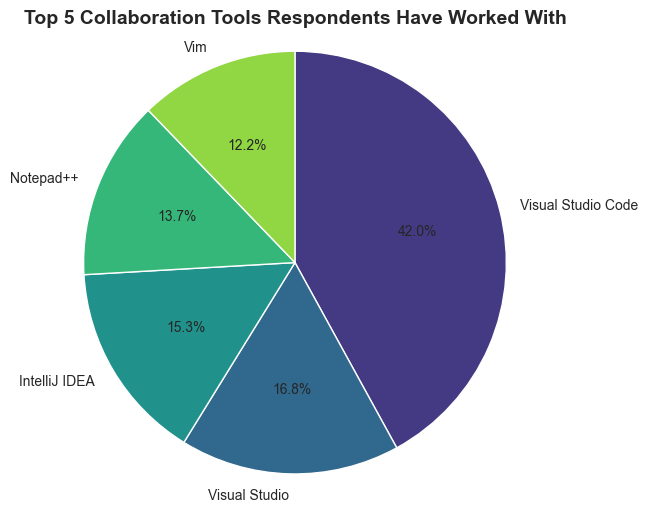

In [74]:
df_tools = df.dropna(subset=['NEWCollabToolsHaveWorkedWith']).copy()
# Drop rows with value 'Unknown'
df_tools.drop(df_tools.loc[df_tools['NEWCollabToolsHaveWorkedWith'] == 'Unknown'].index, inplace=True)

# Split and explode
df_tools['Tools'] = df_tools['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_tools_exploded = df_tools.explode('Tools')

# Strip whitespaces
df_tools_exploded['Tools'] = df_tools_exploded['Tools'].str.strip()

# Count frequencies
top_5_tools = df_tools_exploded['Tools'].value_counts().nlargest(5)

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_5_tools.values, labels=top_5_tools.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette('viridis', n_colors=5), 
        counterclock=False)
plt.title('Top 5 Collaboration Tools Respondents Have Worked With', fontweight='bold', fontsize=14)
plt.axis('equal') 
plt.show()

* Collaboration Tools by Age

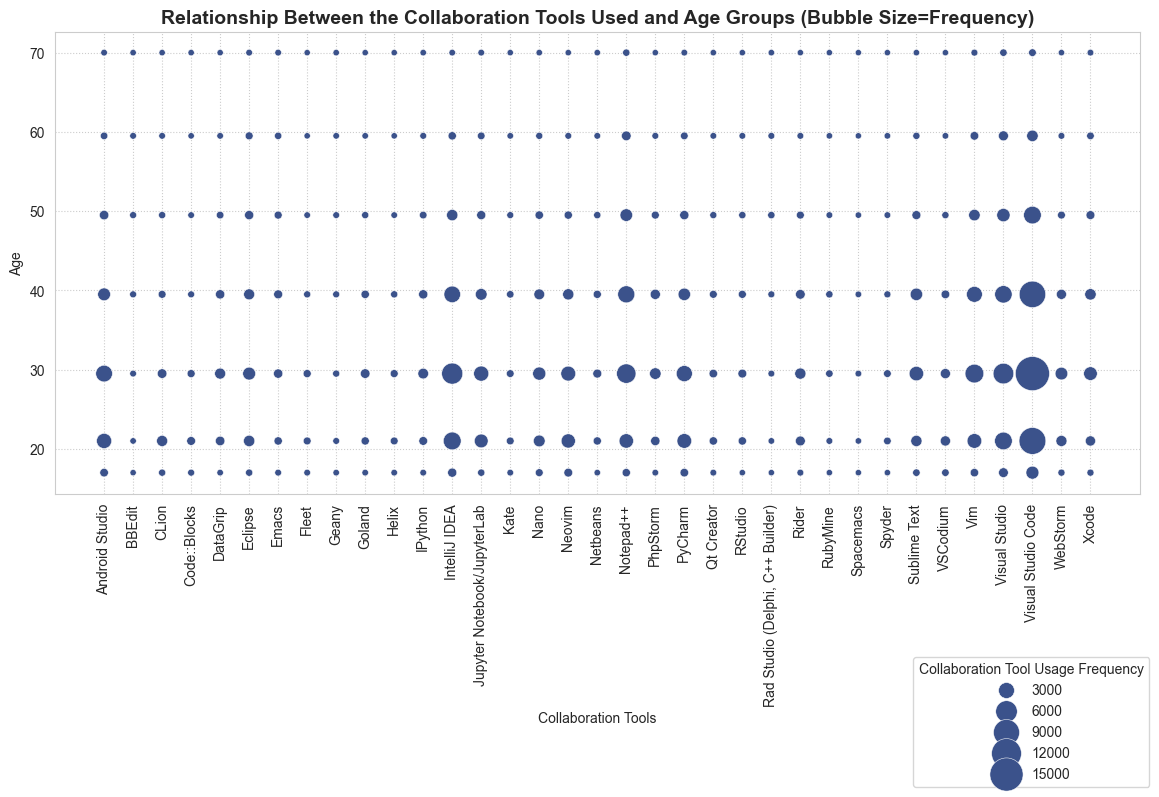

In [75]:
df_tool_age = df[['NEWCollabToolsHaveWorkedWith', 'Age_Number']].dropna().copy()
# Drop rows with value 'Unknown'
df_tool_age.drop(df_tool_age.loc[df_tool_age['NEWCollabToolsHaveWorkedWith'] == 'Unknown'].index, inplace=True)

# Expand multiple languages into separate rows
df_tool_age['NEWCollabToolsHaveWorkedWith'] = df_tool_age['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_tool_age = df_tool_age.explode('NEWCollabToolsHaveWorkedWith')
df_tool_age['NEWCollabToolsHaveWorkedWith'] = df_tool_age['NEWCollabToolsHaveWorkedWith'].str.strip()

# Group by age and language to get frequency
lang_tool_grouped = df_tool_age.groupby(['Age_Number', 'NEWCollabToolsHaveWorkedWith']).size().reset_index(name='Frequency')

# Bubble chart
plt.figure(figsize=(14, 6))
sns.scatterplot(
    data=lang_tool_grouped,
    x='NEWCollabToolsHaveWorkedWith', 
    y='Age_Number',
    size='Frequency',
    sizes=(20, 600),
    #hue='Frequency',
    #palette='flare',
    alpha=1,
    color=viridis_colors[3]
)
plt.xlabel('Collaboration Tools')
plt.ylabel('Age')
plt.title('Relationship Between the Collaboration Tools Used and Age Groups (Bubble Size=Frequency)', 
          fontweight='bold', fontsize=14)
plt.xticks(rotation=90)
plt.legend(
    title='Collaboration Tool Usage Frequency',
    loc='lower center',
    bbox_to_anchor=(0.9, -0.65),   
    frameon=True
)
plt.grid(True)
plt.show()

The most popular collaboration tools respondents have worked with are Visual Studio Code (42%), Visual Studio (16.8%), and IntelliJ IDEA (15.3%) - across all age groups.

* Top 5 Collaboration Tools Respondents Would Like to Work With

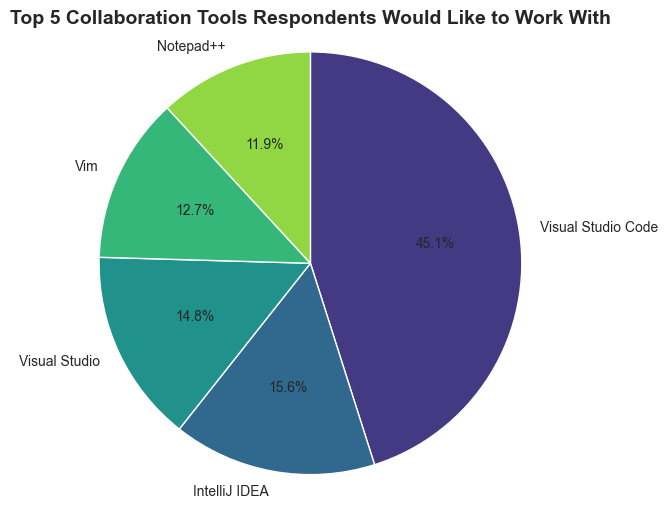

In [76]:
df_toolsW = df.dropna(subset=['NEWCollabToolsWantToWorkWith']).copy()
# Drop rows with value 'Unknown'
df_toolsW.drop(df_toolsW.loc[df_toolsW['NEWCollabToolsWantToWorkWith'] == 'Unknown'].index, inplace=True)

# Split and explode
df_toolsW['ToolsW'] = df_toolsW['NEWCollabToolsWantToWorkWith'].str.split(';')
df_toolsW_exploded = df_toolsW.explode('ToolsW')

# Strip whitespaces
df_toolsW_exploded['ToolsW'] = df_toolsW_exploded['ToolsW'].str.strip()

# Count frequencies
top_5_toolsW = df_toolsW_exploded['ToolsW'].value_counts().nlargest(5)

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_5_toolsW.values, labels=top_5_toolsW.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette('viridis', n_colors=5), 
        counterclock=False)
plt.title('Top 5 Collaboration Tools Respondents Would Like to Work With', fontweight='bold', fontsize=14)
plt.axis('equal') 
plt.show()

The most popular collaboration tools respondents would like to work with are Visual Studio Code (45.1%), IntelliJ IDEA (15.6%), and Visual Studio (14.8%).

* Educational Background and Employment Type

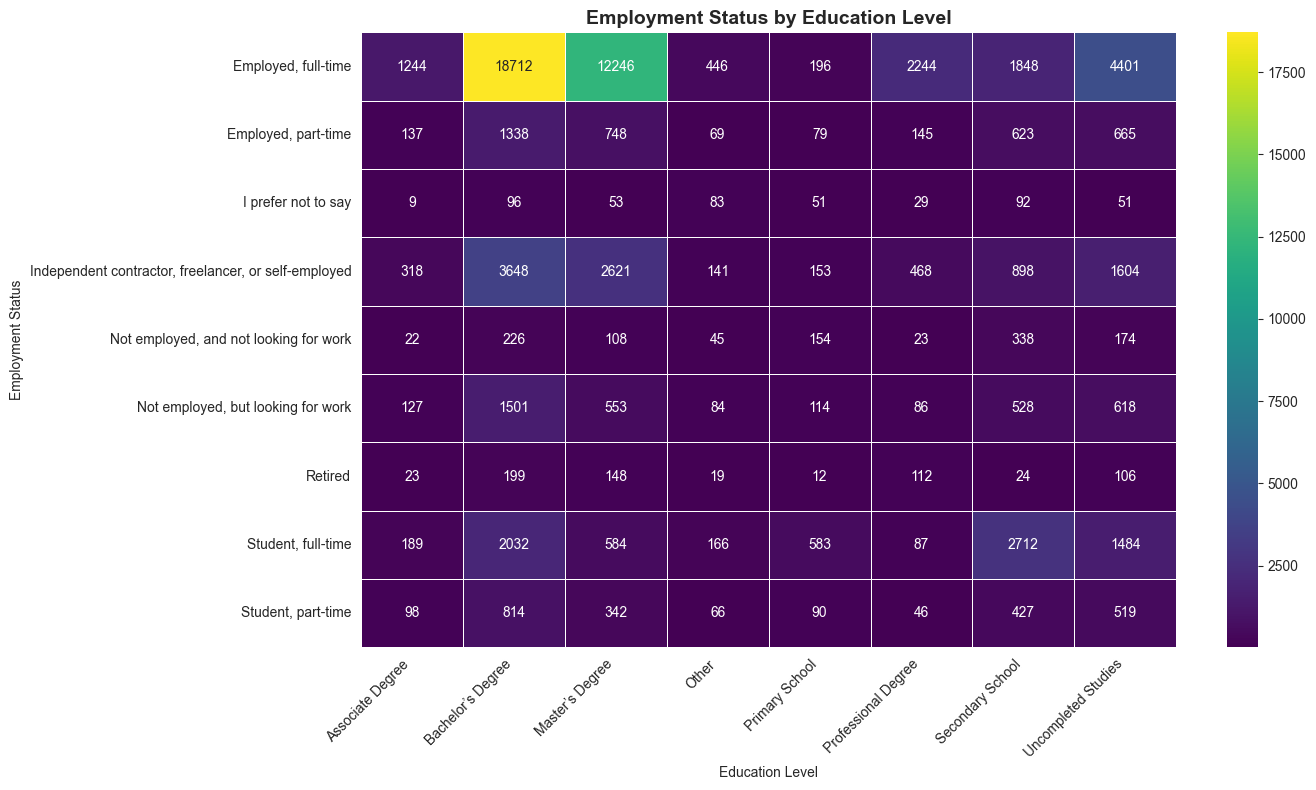

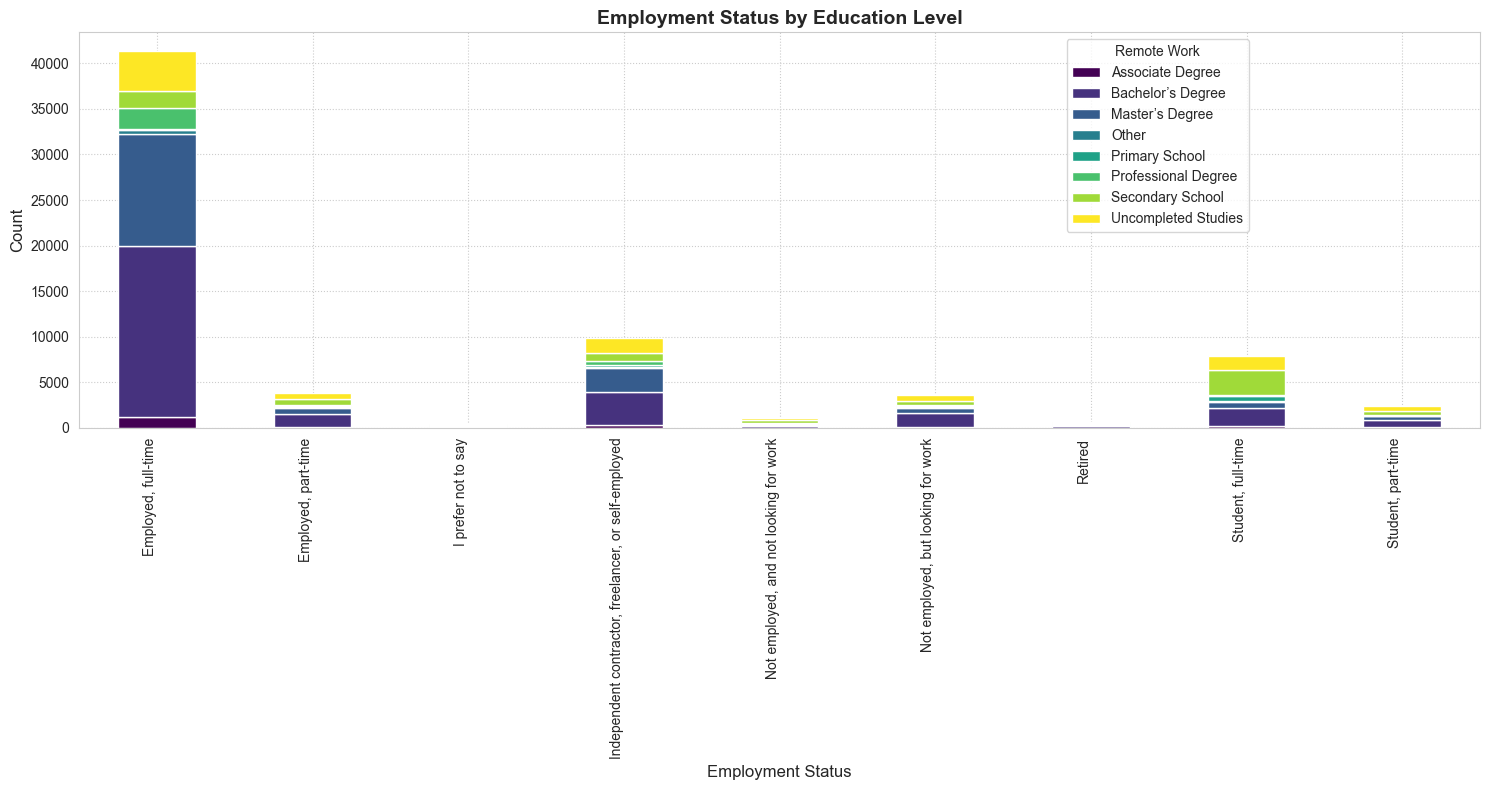

In [77]:
edLevel_employm = df[['EdLevel', 'Employment']].dropna().copy()
# Drop rows with value 'Unknown'
edLevel_employm.drop(edLevel_employm.loc[edLevel_employm['EdLevel'] == 'Unknown'].index, inplace=True)

# Expand multiple employment status into separate rows
edLevel_employm_expanded = edLevel_employm.assign(
    EmploymStatus=edLevel_employm['Employment'].str.split(';')
).explode('EmploymStatus')
# Count occurrences by EdLevel and Employment Status
ed_employm_counts = edLevel_employm_expanded.groupby(['EdLevel', 'EmploymStatus']).size().reset_index(name='Count')
# Pivot for heatmap (EmploymStatus vs EdLevel)
ed_employm_pivot = ed_employm_counts.pivot(index='EmploymStatus', columns='EdLevel', values='Count').fillna(0)

# Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(ed_employm_pivot, cmap='viridis', linewidths=0.5, annot=True, fmt='.0f')
plt.title('Employment Status by Education Level', fontweight='bold', fontsize=14)
plt.ylabel('Employment Status')
plt.xlabel('Education Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar plot
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, ed_employm_pivot.shape[1]))
ax = ed_employm_pivot.plot(kind='bar', stacked=True, figsize=(15, 8), color=colors)
plt.title('Employment Status by Education Level', fontweight='bold', fontsize=14)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)  
plt.legend(title='Remote Work', bbox_to_anchor=(0.7, 1), loc='upper left')
plt.tight_layout()
plt.show()

The heatmap and bar chart show how educational background relates to employment status: full-time employed respondents tend to have higher education (especially, Bachelor's and Master's Degree).

* Bubble Plot for AIChallenges Across Countries

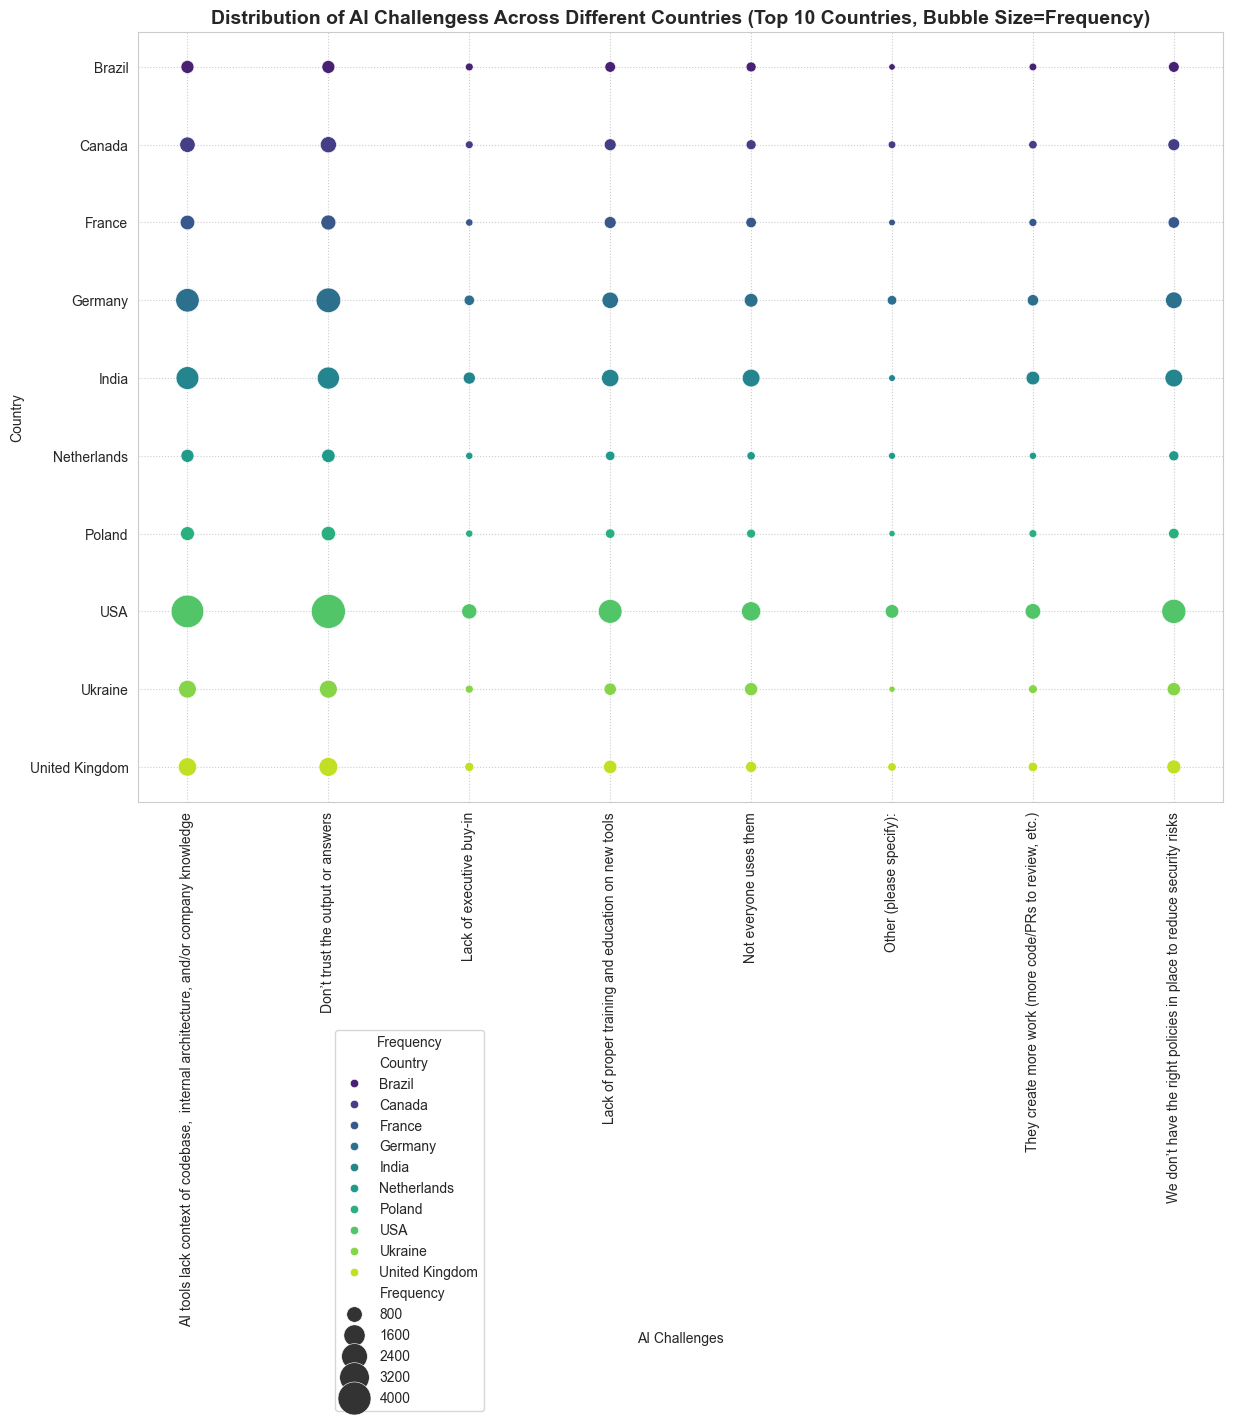

In [78]:
df_chall_country = df[['AIChallenges', 'Country']].dropna().copy()
# Drop rows with value 'Unknown'
df_chall_country.drop(df_chall_country.loc[df_chall_country['AIChallenges'] == 'Unknown'].index, inplace=True)
df_chall_country.drop(df_chall_country.loc[df_chall_country['Country'] == 'Unknown'].index, inplace=True)

# Expand 
df_chall_country['AIChallenges'] = df_chall_country['AIChallenges'].str.split(';')
df_chall_country = df_chall_country.explode('AIChallenges')
df_chall_country['AIChallenges'] = df_chall_country['AIChallenges'].str.strip()

# Group to get frequency
chall_country_grouped = df_chall_country.groupby(['Country', 'AIChallenges']).size().reset_index(name='Frequency')

# Top 10 Countries (By Number of Respondents)
# Calculate total frequency per country and keep count for each challenge
country_totals = (
    chall_country_grouped
    .groupby('Country')['Frequency']
    .sum()
    .sort_values(ascending=False) # Order-descending
)

# Select the top 10 countries
top10_countries = country_totals.head(10).index

# Filter original grouped data to keep all languages for those top 10 countries
chall_country_top10 = chall_country_grouped[chall_country_grouped['Country'].isin(top10_countries)]

# Convert Country to ordered category
ordered_countries = country_totals.head(10).index.tolist()
chall_country_top10.loc[:, 'Country'] = pd.Categorical(
    chall_country_top10['Country'],
    categories=ordered_countries,   
    ordered=True
)

# Bubble chart
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=chall_country_top10,
    x='AIChallenges', 
    y='Country',
    size='Frequency',
    sizes=(20, 600),
    hue='Country',
    palette='viridis',
    alpha=1
)
plt.xlabel('AI Challenges')
plt.ylabel('Country')
plt.title('Distribution of AI Challengess Across Different Countries (Top 10 Countries, Bubble Size=Frequency)', 
          fontweight='bold', fontsize=14)
plt.xticks(rotation=90)
plt.legend(
    title='Frequency',
    loc='lower center',
    bbox_to_anchor=(0.25, -0.8),   
    frameon=True
)
plt.grid(True)
plt.show()

* Five Most Often Mentioned AI Challenges

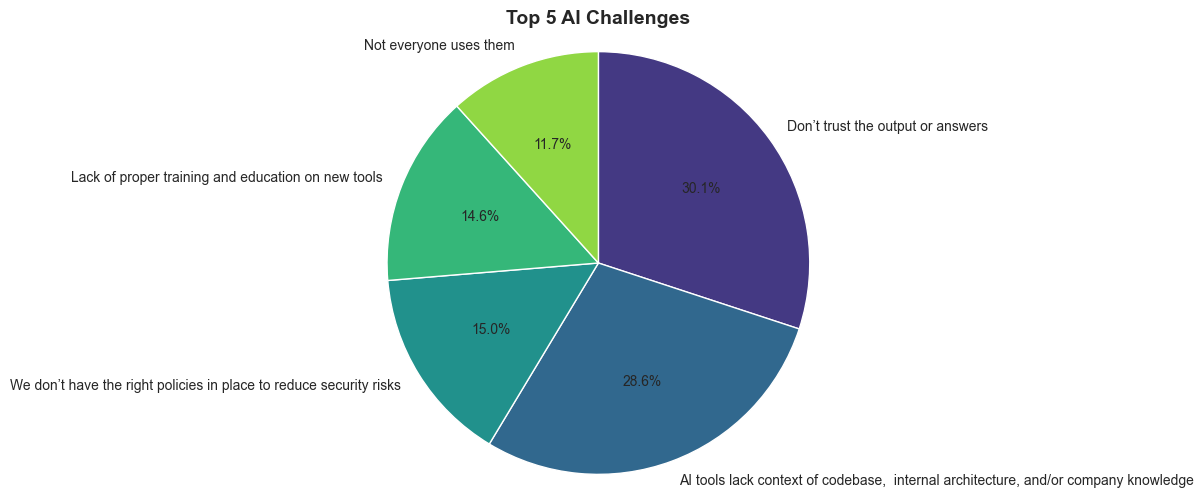

In [79]:
# Drop rows with missing values 
df_ai_chall = df.dropna(subset=['AIChallenges']).copy()

# Drop rows with value 'Unknown'
df_ai_chall.drop(df_ai_chall.loc[df_ai_chall['AIChallenges'] == 'Unknown'].index, inplace=True)

# Split and explode
df_ai_chall['AI_Chall'] = df_ai_chall['AIChallenges'].str.split(';')
df_ai_chall_exploded = df_ai_chall.explode('AI_Chall')

# Strip whitespaces
df_ai_chall_exploded['AI_Chall'] = df_ai_chall_exploded['AI_Chall'].str.strip()

# Count frequencies
top_5_ai_chall = df_ai_chall_exploded['AI_Chall'].value_counts().nlargest(5)

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_5_ai_chall.values, labels=top_5_ai_chall.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette('viridis', n_colors=5), 
        counterclock=False)
plt.title('Top 5 AI Challenges', fontweight='bold', fontsize=14)
plt.axis('equal') 
plt.show()

The most often mentioned AI challenge (30.1% mentions) is that respondents "don't trust the output or answers". Second most often mentioned AI challenge (28.6%) is that "AI tools lack context of codebase, internal architecture, and/or company knowledge", followed by the lack of "the right policies in place to reduce security risks" (15%).

* Five Most Often Mentioned AI Benefits

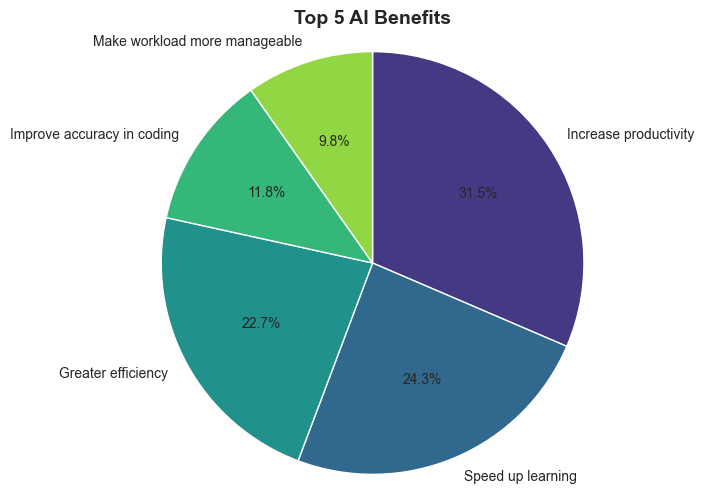

In [80]:
# Drop rows with missing values 
df_ai_using = df.dropna(subset=['AIBen']).copy()

# Drop rows with value 'Unknown'
df_ai_using.drop(df_ai_using.loc[df_ai_using['AIBen'] == 'Unknown'].index, inplace=True)

# Split and explode
df_ai_using['AI_Ben'] = df_ai_using['AIBen'].str.split(';')
df_ai_using_exploded = df_ai_using.explode('AI_Ben')

# Strip whitespaces
df_ai_using_exploded['AI_Ben'] = df_ai_using_exploded['AI_Ben'].str.strip()

# Count frequencies
top_5_ai_using = df_ai_using_exploded['AI_Ben'].value_counts().nlargest(5)

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_5_ai_using.values, labels=top_5_ai_using.index, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette('viridis', n_colors=5), 
        counterclock=False)
plt.title('Top 5 AI Benefits', fontweight='bold', fontsize=14)
plt.axis('equal') 
plt.show()

Among most often mentioned AI benefits is increased productivity (31.5% mentioned), accelerated learning (24.3%), and greater efficiency (22.7%).

* Sentiment towards AI

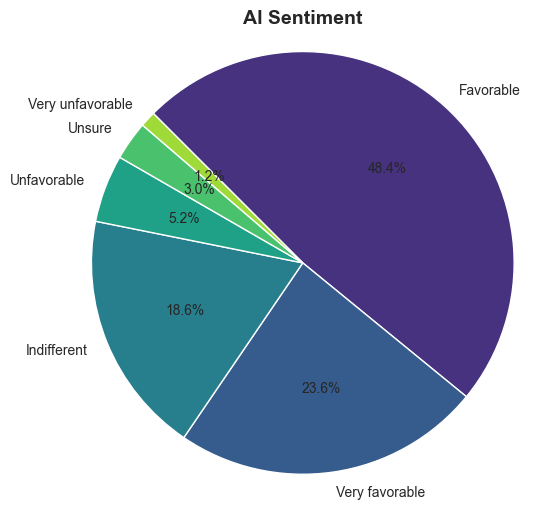

In [81]:
# Drop rows with missing values 
df_sent = df.dropna(subset=['AISent']).copy()

# Drop rows with value 'Unknown'
df_sent.drop(df_sent.loc[df_sent['AISent'] == 'Unknown'].index, inplace=True)

# Count frequencies
df_sent = df_sent['AISent'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(df_sent.values, labels=df_sent.index, autopct='%1.1f%%', startangle=135, 
        colors=sns.color_palette('viridis'), counterclock=False)
plt.title('AI Sentiment', fontweight='bold', fontsize=14)
plt.axis('equal') 
plt.show()

Overall, respondents see AI as a beneficial tool, with the majority (72%) expressing positive (favorable or very favorable) sentiment towards its use in their work, and only 9.2% holding an unfavorable view.

<br>
<br>

---------------------------------------------------------------------------------------------------------------------------

<br>
<h1 align='center'>Charts for Power Point Presentation</h1>

* Programming Languages

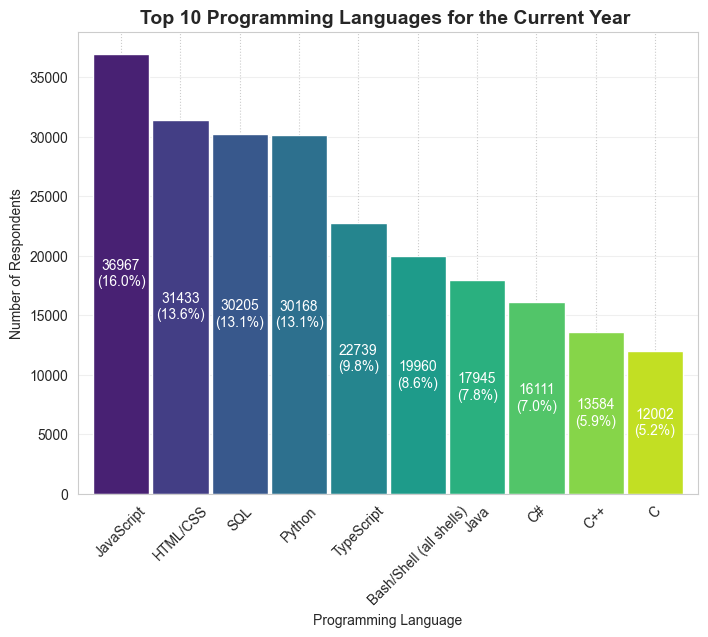

In [82]:
df_lang = df[['LanguageHaveWorkedWith']].dropna().copy()
# Drop rows with value 'Unknown'
df_lang.drop(df_lang.loc[df_lang['LanguageHaveWorkedWith'] == 'Unknown'].index, inplace=True)

# Split and explode
df_lang['Language'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_lang_exploded = df_lang.explode('Language')

# Strip whitespaces
df_lang_exploded['Language'] = df_lang_exploded['Language'].str.strip()

# Group to get count
lang_grouped = df_lang_exploded.groupby(['Language']).size().reset_index(name='Count').sort_values('Count', ascending=False)
lang_grouped_plot = lang_grouped.head(10)

# Generate more colors from the 'viridis' palette
colors = sns.color_palette('viridis', n_colors=10)

# Bar chart
ax = lang_grouped_plot.plot(kind='bar', x='Language', y='Count', figsize=(8,6), color=colors, legend=False, width=0.95)
plt.title('Top 10 Programming Languages for the Current Year ', fontweight='bold', fontsize=14)
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='-', alpha=0.3)
# Calculate total for percentages
total = lang_grouped_plot['Count'].sum()
# Add value labels + percentage
# Add labels INSIDE bars
for p in ax.patches:
    value = p.get_height()
    percent = value / total * 100
    # Position
    x = p.get_x() + p.get_width() / 2
    y = value * 0.5   
    ax.annotate(
        f"{value:.0f}\n({percent:.1f}%)",
        (x, y),
        ha='center',
        va='center',
        color='white',     
        fontsize=10,
        fontweight='regular'
    )
plt.xticks(rotation=45)
# Save figure
plt.savefig('../images/1_Top10_Programming_Languages.png', bbox_inches = 'tight')
plt.show()

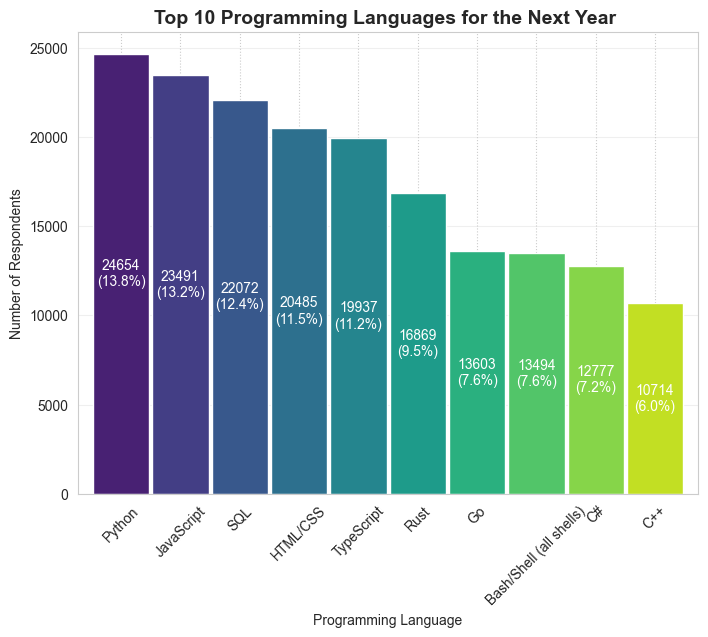

In [83]:
df_lang_want = df[['LanguageWantToWorkWith']].dropna().copy()
# Drop rows with value 'Unknown'
df_lang_want.drop(df_lang_want.loc[df_lang_want['LanguageWantToWorkWith'] == 'Unknown'].index, inplace=True)

# Split and explode
df_lang_want['LanguageWant'] = df_lang_want['LanguageWantToWorkWith'].str.split(';')
df_lang_want_exploded = df_lang_want.explode('LanguageWant')

# Strip whitespaces
df_lang_want_exploded['LanguageWant'] = df_lang_want_exploded['LanguageWant'].str.strip()

# Group to get count
lang_want_grouped = df_lang_want_exploded.groupby(['LanguageWant']).size().reset_index(name='Count').sort_values('Count', ascending=False)
lang_want_grouped_plot = lang_want_grouped.head(10)

# Generate more colors from the 'viridis' palette
colors = sns.color_palette('viridis', n_colors=10)

# Bar chart
ax = lang_want_grouped_plot.plot(kind='bar', x='LanguageWant', y='Count', figsize=(8,6), color=colors, legend=False, 
                                 width=0.95)
plt.title('Top 10 Programming Languages for the Next Year ', fontweight='bold', fontsize=14)
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='-', alpha=0.3)
# Calculate total for percentages
total = lang_want_grouped_plot['Count'].sum()
# Add value labels + percentage
# Add labels INSIDE bars
for p in ax.patches:
    value = p.get_height()
    percent = value / total * 100
    # Position
    x = p.get_x() + p.get_width() / 2
    y = value * 0.5   
    ax.annotate(
        f"{value:.0f}\n({percent:.1f}%)",
        (x, y),
        ha='center',
        va='center',
        color='white',      
        fontsize=10,
        fontweight='regular'
    )
plt.xticks(rotation=45)
# Save figure
plt.savefig('../images/2_Top10_Programming_Languages_Next_Year.png', bbox_inches = 'tight')
plt.show()

* Databases

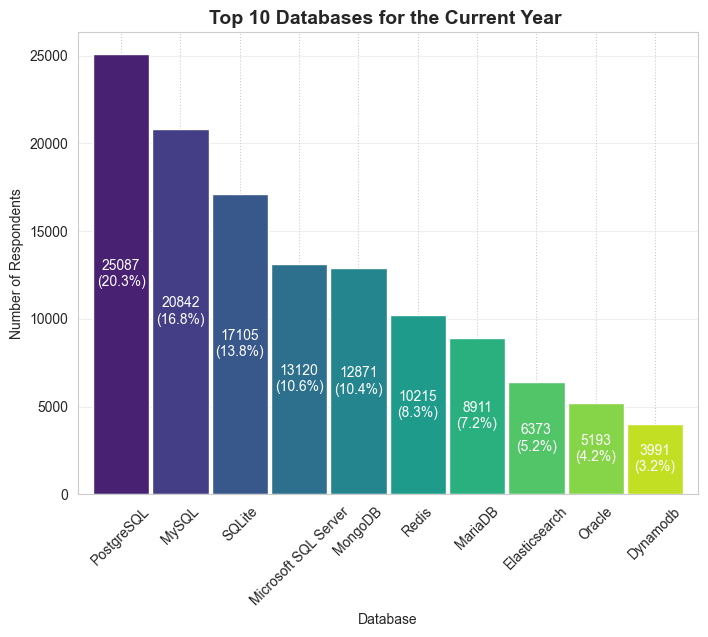

In [84]:
df_db = df[['DatabaseHaveWorkedWith']].dropna().copy()
# Drop rows with value 'Unknown'
df_db.drop(df_db.loc[df_db['DatabaseHaveWorkedWith'] == 'Unknown'].index, inplace=True)

# Split and explode
df_db['Database'] = df_db['DatabaseHaveWorkedWith'].str.split(';')
df_db_exploded = df_db.explode('Database')

# Strip whitespaces
df_db_exploded['Database'] = df_db_exploded['Database'].str.strip()

# Group to get count
db_grouped = df_db_exploded.groupby(['Database']).size().reset_index(name='Count').sort_values('Count', ascending=False)
db_grouped_plot = db_grouped.head(10)

# Generate more colors from the 'viridis' palette
colors = sns.color_palette('viridis', n_colors=10)

# Bar chart
ax = db_grouped_plot.plot(kind='bar', x='Database', y='Count', figsize=(8,6), color=colors, legend=False, width=0.95)
plt.title('Top 10 Databases for the Current Year ', fontweight='bold', fontsize=14)
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='-', alpha=0.3)
# Calculate total for percentages
total = db_grouped_plot['Count'].sum()
# Add value labels + percentage
# Add labels INSIDE bars
for p in ax.patches:
    value = p.get_height()
    percent = value / total * 100
    # Position
    x = p.get_x() + p.get_width() / 2
    y = value * 0.5   
    ax.annotate(
        f"{value:.0f}\n({percent:.1f}%)",
        (x, y),
        ha='center',
        va='center',
        color='white',      
        fontsize=10,
        fontweight='regular'
    )
plt.xticks(rotation=45)
# Save figure
plt.savefig('../images/3_Top10_Databases.png', bbox_inches = 'tight')
plt.show()

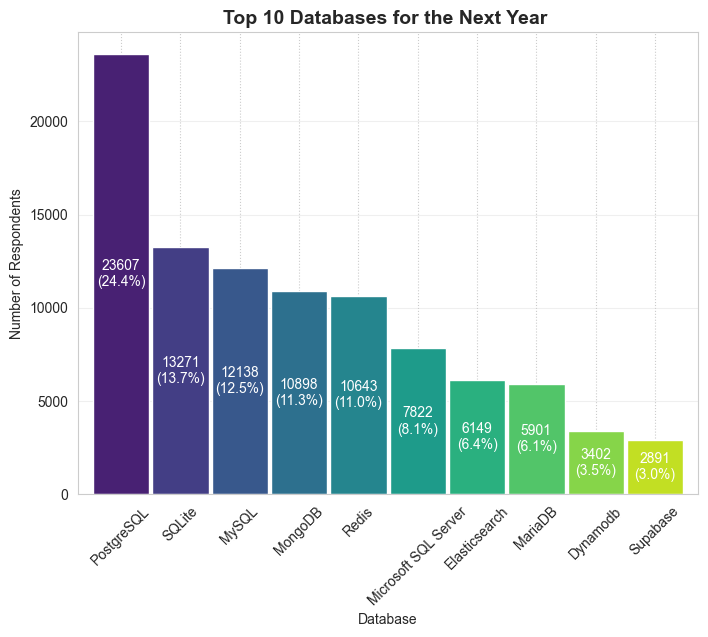

In [85]:
df_db_want = df[['DatabaseWantToWorkWith']].dropna().copy()
# Drop rows with value 'Unknown'
df_db_want.drop(df_db_want.loc[df_db_want['DatabaseWantToWorkWith'] == 'Unknown'].index, inplace=True)

# Split and explode
df_db_want['DatabaseWant'] = df_db_want['DatabaseWantToWorkWith'].str.split(';')
df_db_want_exploded = df_db_want.explode('DatabaseWant')

# Strip whitespaces
df_db_want_exploded['DatabaseWant'] = df_db_want_exploded['DatabaseWant'].str.strip()

# Group to get count
db_want_grouped = df_db_want_exploded.groupby(['DatabaseWant']).size().reset_index(name='Count').sort_values('Count', ascending=False)
db_want_grouped_plot = db_want_grouped.head(10)

# Generate more colors from the 'viridis' palette
colors = sns.color_palette('viridis', n_colors=10)

# Bar chart
ax = db_want_grouped_plot.plot(kind='bar', x='DatabaseWant', y='Count', figsize=(8,6), color=colors, legend=False, 
                               width=0.95)
plt.title('Top 10 Databases for the Next Year ', fontweight='bold', fontsize=14)
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='-', alpha=0.3)
# Calculate total for percentages
total = db_want_grouped_plot['Count'].sum()
# Add value labels + percentage
# Add labels INSIDE bars
for p in ax.patches:
    value = p.get_height()
    percent = value / total * 100
    # Position
    x = p.get_x() + p.get_width() / 2
    y = value * 0.5   
    ax.annotate(
        f"{value:.0f}\n({percent:.1f}%)",
        (x, y),
        ha='center',
        va='center',
        color='white',      
        fontsize=10,
        fontweight='regular'
    )
plt.xticks(rotation=45)
# Save figure
plt.savefig('../images/4_Top10_Databases_Next_Year.png', bbox_inches = 'tight')
plt.show()

* Platforms

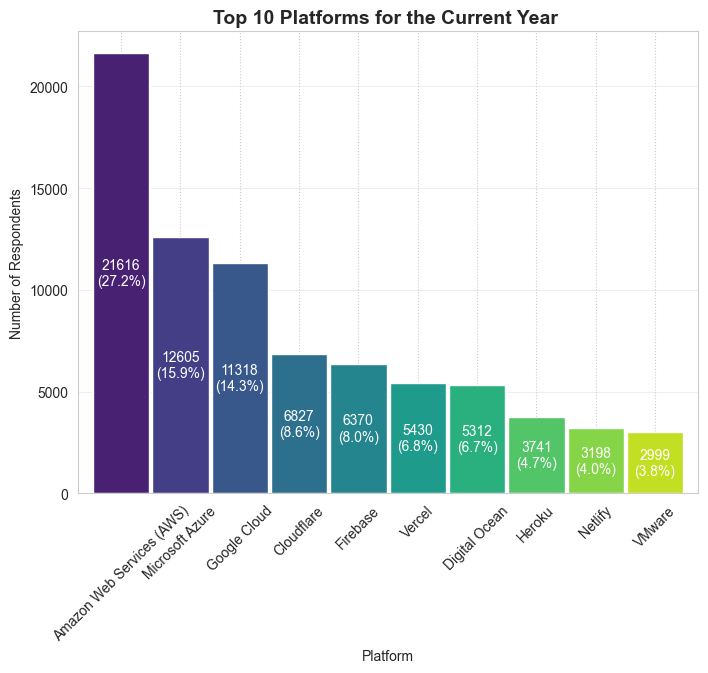

In [86]:
df_platf = df[['PlatformHaveWorkedWith']].dropna().copy()
# Drop rows with value 'Unknown'
df_platf.drop(df_platf.loc[df_platf['PlatformHaveWorkedWith'] == 'Unknown'].index, inplace=True)

# Split and explode
df_platf['Platform'] = df_platf['PlatformHaveWorkedWith'].str.split(';')
df_pl_exploded = df_platf.explode('Platform')

# Strip whitespaces
df_pl_exploded['Platform'] = df_pl_exploded['Platform'].str.strip()

# Group to get count
pl_grouped = df_pl_exploded.groupby(['Platform']).size().reset_index(name='Count').sort_values('Count', ascending=False)
pl_grouped_plot = pl_grouped.head(10)

# Generate more colors from the 'viridis' palette
colors = sns.color_palette('viridis', n_colors=10)

# Bar chart
ax = pl_grouped_plot.plot(kind='bar', x='Platform', y='Count', figsize=(8,6), color=colors, legend=False, width=0.95)
plt.title('Top 10 Platforms for the Current Year ', fontweight='bold', fontsize=14)
plt.xlabel('Platform')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='-', alpha=0.3)
# Calculate total for percentages
total = pl_grouped_plot['Count'].sum()
# Add value labels + percentage
# Add labels INSIDE bars
for p in ax.patches:
    value = p.get_height()
    percent = value / total * 100
    # Position
    x = p.get_x() + p.get_width() / 2
    y = value * 0.5   
    ax.annotate(
        f"{value:.0f}\n({percent:.1f}%)",
        (x, y),
        ha='center',
        va='center',
        color='white',      
        fontsize=10,
        fontweight='regular'
    )
plt.xticks(rotation=45)
# Save figure
plt.savefig('../images/5_Top10_Platforms.png', bbox_inches = 'tight')
plt.show()

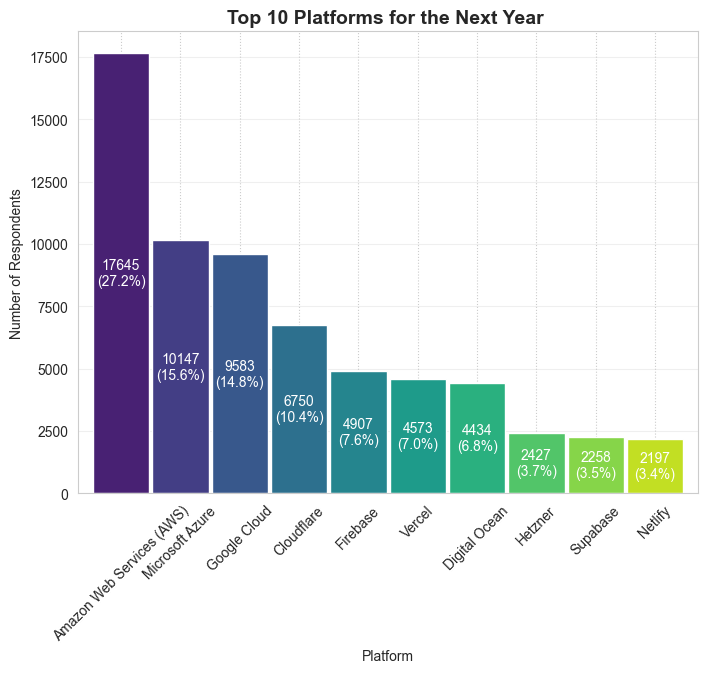

In [87]:
df_platf_want = df[['PlatformWantToWorkWith']].dropna().copy()
# Drop rows with value 'Unknown'
df_platf_want.drop(df_platf_want.loc[df_platf_want['PlatformWantToWorkWith'] == 'Unknown'].index, inplace=True)

# Split and explode
df_platf_want['PlatformWant'] = df_platf_want['PlatformWantToWorkWith'].str.split(';')
df_pl_want_exploded = df_platf_want.explode('PlatformWant')

# Strip whitespaces
df_pl_want_exploded['PlatformWant'] = df_pl_want_exploded['PlatformWant'].str.strip()

# Group to get count
pl_want_grouped = df_pl_want_exploded.groupby(['PlatformWant']).size().reset_index(name='Count').sort_values('Count', ascending=False)
pl_want_grouped_plot = pl_want_grouped.head(10)

# Generate more colors from the 'viridis' palette
colors = sns.color_palette('viridis', n_colors=10)

# Bar chart
ax = pl_want_grouped_plot.plot(kind='bar', x='PlatformWant', y='Count', figsize=(8,6), color=colors, legend=False, 
                               width=0.95)
plt.title('Top 10 Platforms for the Next Year ', fontweight='bold', fontsize=14)
plt.xlabel('Platform')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='-', alpha=0.3)
# Calculate total for percentages
total = pl_want_grouped_plot['Count'].sum()
# Add value labels + percentage
# Add labels INSIDE bars
for p in ax.patches:
    value = p.get_height()
    percent = value / total * 100
    # Position
    x = p.get_x() + p.get_width() / 2
    y = value * 0.5   
    ax.annotate(
        f"{value:.0f}\n({percent:.1f}%)",
        (x, y),
        ha='center',
        va='center',
        color='white',      
        fontsize=10,
        fontweight='regular'
    )
plt.xticks(rotation=45)
# Save figure
plt.savefig('../images/6_Top10_Platforms_Next_Year.png', bbox_inches = 'tight')
plt.show()

* Web Frameworks

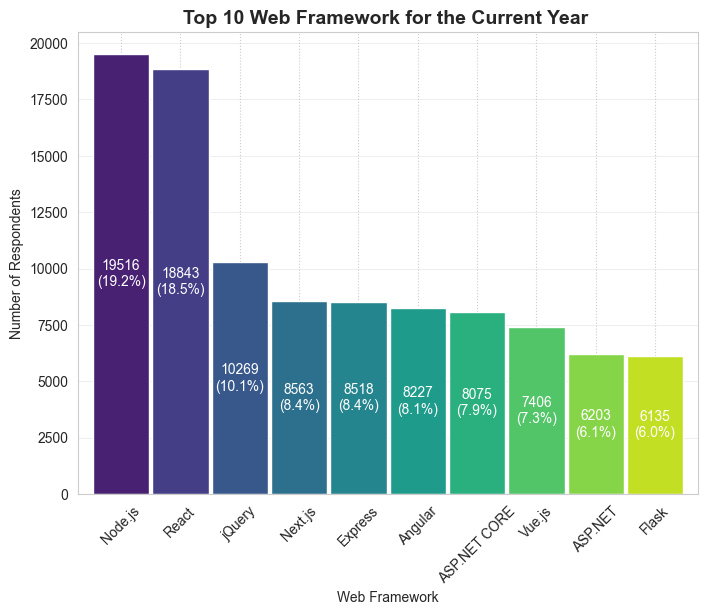

In [88]:
df_framew = df[['WebframeHaveWorkedWith']].dropna().copy()
# Drop rows with value 'Unknown'
df_framew.drop(df_framew.loc[df_framew['WebframeHaveWorkedWith'] == 'Unknown'].index, inplace=True)

# Split and explode
df_framew['Framework'] = df_framew['WebframeHaveWorkedWith'].str.split(';')
df_framew_exploded = df_framew.explode('Framework')

# Strip whitespaces
df_framew_exploded['Framework'] = df_framew_exploded['Framework'].str.strip()

# Group to get count
framew_grouped = df_framew_exploded.groupby(['Framework']).size().reset_index(name='Count').sort_values('Count', ascending=False)
framew_grouped_plot = framew_grouped.head(10)

# Generate more colors from the 'viridis' palette
colors = sns.color_palette('viridis', n_colors=10)

# Bar chart
ax = framew_grouped_plot.plot(kind='bar', x='Framework', y='Count', figsize=(8,6), color=colors, legend=False, width=0.95)
plt.title('Top 10 Web Framework for the Current Year ', fontweight='bold', fontsize=14)
plt.xlabel('Web Framework')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='-', alpha=0.3)
# Calculate total for percentages
total = framew_grouped_plot['Count'].sum()
# Add value labels + percentage
# Add labels INSIDE bars
for p in ax.patches:
    value = p.get_height()
    percent = value / total * 100
    # Position
    x = p.get_x() + p.get_width() / 2
    y = value * 0.5   
    ax.annotate(
        f"{value:.0f}\n({percent:.1f}%)",
        (x, y),
        ha='center',
        va='center',
        color='white',      
        fontsize=10,
        fontweight='regular'
    )
plt.xticks(rotation=45)
# Save figure
plt.savefig('../images/7_Top10_WebFrameworks.png', bbox_inches = 'tight')
plt.show()

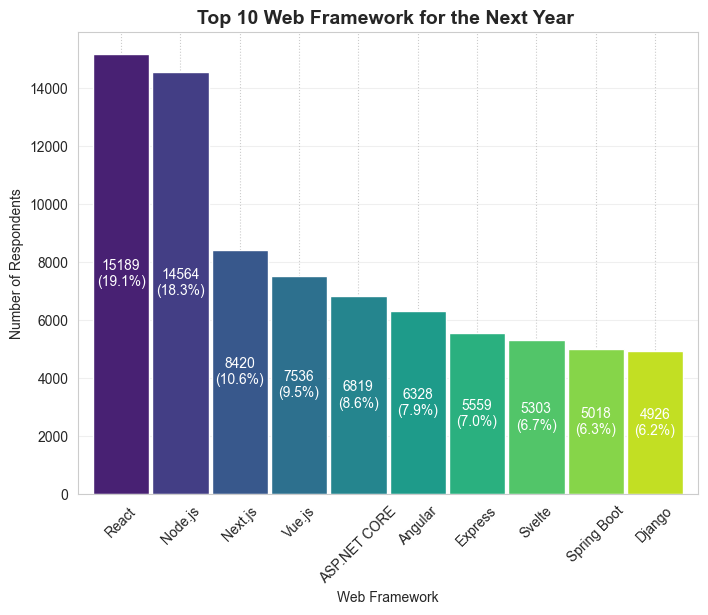

In [89]:
df_framew_want = df[['WebframeWantToWorkWith']].dropna().copy()
# Drop rows with value 'Unknown'
df_framew_want.drop(df_framew_want.loc[df_framew_want['WebframeWantToWorkWith'] == 'Unknown'].index, inplace=True)

# Split and explode
df_framew_want['FrameworkWant'] = df_framew_want['WebframeWantToWorkWith'].str.split(';')
df_framew_want_exploded = df_framew_want.explode('FrameworkWant')

# Strip whitespaces
df_framew_want_exploded['FrameworkWant'] = df_framew_want_exploded['FrameworkWant'].str.strip()

# Group to get count
framew_want_grouped = df_framew_want_exploded.groupby(['FrameworkWant']).size().reset_index(name='Count').sort_values('Count', ascending=False)
framew_want_grouped_plot = framew_want_grouped.head(10)

# Generate more colors from the 'viridis' palette
colors = sns.color_palette('viridis', n_colors=10)

# Bar chart
ax = framew_want_grouped_plot.plot(kind='bar', x='FrameworkWant', y='Count', figsize=(8,6), color=colors, legend=False, 
                                   width=0.95)
plt.title('Top 10 Web Framework for the Next Year ', fontweight='bold', fontsize=14)
plt.xlabel('Web Framework')
plt.ylabel('Number of Respondents')
plt.grid(axis='y', linestyle='-', alpha=0.3)
# Calculate total for percentages
total = framew_want_grouped_plot['Count'].sum()
# Add value labels + percentage
# Add labels INSIDE bars
for p in ax.patches:
    value = p.get_height()
    percent = value / total * 100
    # Position
    x = p.get_x() + p.get_width() / 2
    y = value * 0.5   
    ax.annotate(
        f"{value:.0f}\n({percent:.1f}%)",
        (x, y),
        ha='center',
        va='center',
        color='white',      
        fontsize=10,
        fontweight='regular'
    )
plt.xticks(rotation=45)
# Save figure
plt.savefig('../images/8_Top10_WebFrameworks_Next_Year.png', bbox_inches = 'tight')
plt.show()

* AI Tools

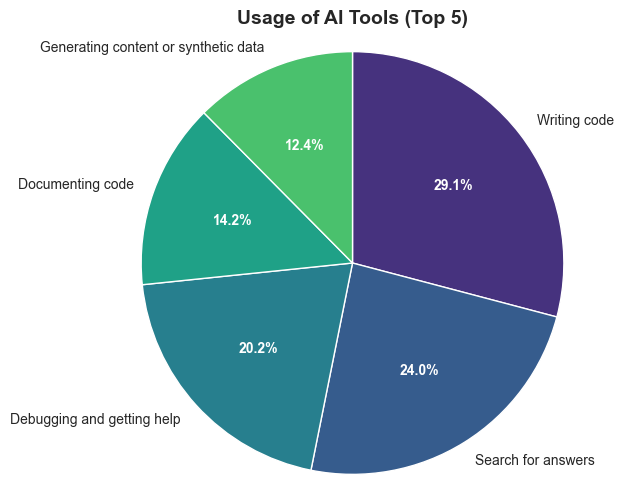

In [90]:
df_tool = df[['AIToolCurrently Using']].dropna().copy()
# Drop rows with value 'Unknown'
df_tool.drop(df_tool.loc[df_tool['AIToolCurrently Using'] == 'Unknown'].index, inplace=True)

# Split and explode
df_tool['AITool'] = df_tool['AIToolCurrently Using'].str.split(';')
df_AItools_exploded = df_tool.explode('AITool')

# Strip whitespaces
df_AItools_exploded['AITool'] = df_AItools_exploded['AITool'].str.strip()

# Count frequencies
top_5_AItools = df_AItools_exploded['AITool'].value_counts().nlargest(5)

# Pie chart
plt.figure(figsize=(6, 6))
# Capture returned objects
wedges, text_labels, text_autopct = plt.pie(
    top_5_AItools.values,
    labels=top_5_AItools.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis'),
    counterclock=False
)
plt.title('Usage of AI Tools (Top 5)', fontweight='bold', fontsize=14)
# Change value labels to white
for t in text_autopct:
    t.set_color('white')
    t.set_fontweight('bold') 
plt.axis('equal') 
# Save figure
plt.savefig('../images/9_Top5_AI_Tools.png', bbox_inches = 'tight')
plt.show()

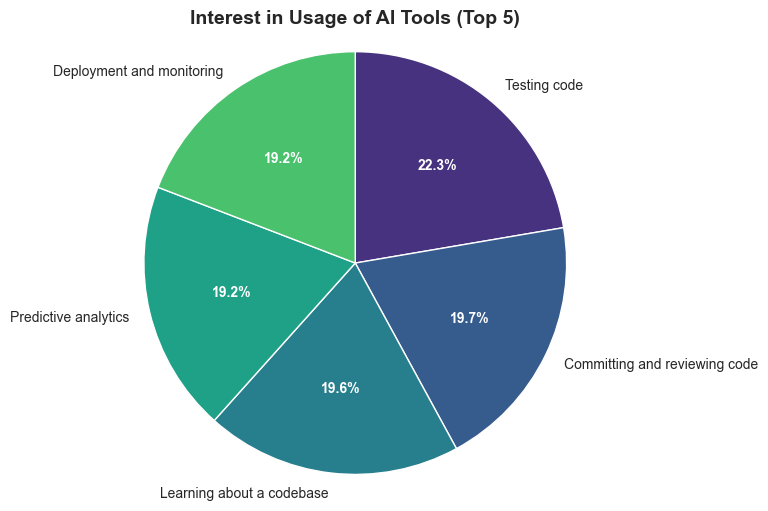

In [91]:
df_tool_interested = df[['AIToolInterested in Using']].dropna().copy()
# Drop rows with value 'Unknown'
df_tool_interested.drop(df_tool_interested.loc[df_tool_interested['AIToolInterested in Using'] == 'Unknown'].index, inplace=True)

# Split and explode
df_tool_interested['AITool_Interested'] = df_tool_interested['AIToolInterested in Using'].str.split(';')
df_AItools_int_exploded = df_tool_interested.explode('AITool_Interested')

# Strip whitespaces
df_AItools_int_exploded['AITool_Interested'] = df_AItools_int_exploded['AITool_Interested'].str.strip()

# Count frequencies
top_5_AItools_int = df_AItools_int_exploded['AITool_Interested'].value_counts().nlargest(5)

# Pie chart
plt.figure(figsize=(6, 6))
# Capture returned objects
wedges, text_labels, text_autopct = plt.pie(
    top_5_AItools_int.values,
    labels=top_5_AItools_int.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis'),
    counterclock=False
)
plt.title('Interest in Usage of AI Tools (Top 5)', fontweight='bold', fontsize=14)
# Change value labels to white
for t in text_autopct:
    t.set_color('white')
    t.set_fontweight('bold')  
plt.axis('equal') 
# Save figure
plt.savefig('../images/10_Top5_AI_Tools_Next_Year.png', bbox_inches = 'tight')
plt.show()

* Five Most Often Mentioned AI Challenges

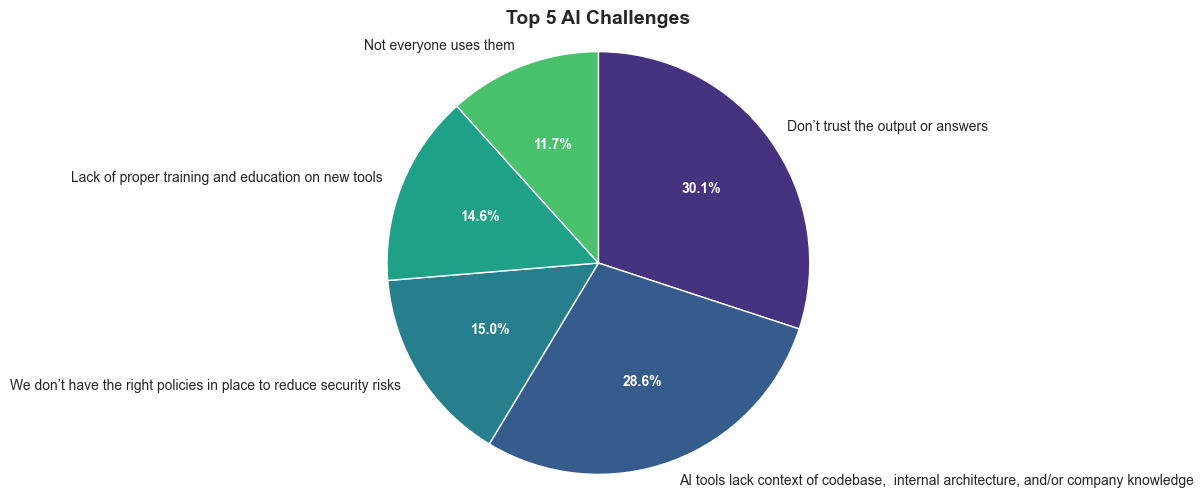

In [92]:
# Drop rows with missing values 
df_ai_chall = df.dropna(subset=['AIChallenges']).copy()

# Drop rows with value 'Unknown'
df_ai_chall.drop(df_ai_chall.loc[df_ai_chall['AIChallenges'] == 'Unknown'].index, inplace=True)

# Split and explode
df_ai_chall['AI_Chall'] = df_ai_chall['AIChallenges'].str.split(';')
df_ai_chall_exploded = df_ai_chall.explode('AI_Chall')

# Strip whitespaces
df_ai_chall_exploded['AI_Chall'] = df_ai_chall_exploded['AI_Chall'].str.strip()

# Count frequencies
top_5_ai_chall = df_ai_chall_exploded['AI_Chall'].value_counts().nlargest(5)

# Pie chart
plt.figure(figsize=(6, 6))
# Capture returned objects
wedges, text_labels, text_autopct = plt.pie(
    top_5_ai_chall.values,
    labels=top_5_ai_chall.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis'),
    counterclock=False
)
plt.title('Top 5 AI Challenges', fontweight='bold', fontsize=14)
# Change value labels to white
for t in text_autopct:
    t.set_color('white')
    t.set_fontweight('bold')  
plt.axis('equal') 
# Save figure
plt.savefig('../images/21_AI_challenges.png', bbox_inches = 'tight')
plt.show()

The most often mentioned AI challenge (30.1% mentions) is that respondents "don't trust the output or answers". Second most often mentioned AI challenge (28.6%) is that "AI tools lack context of codebase, internal architecture, and/or company knowledge", followed by the lack of "the right policies in place to reduce security risks" (15%).

* Five Most Often Mentioned AI Benefits

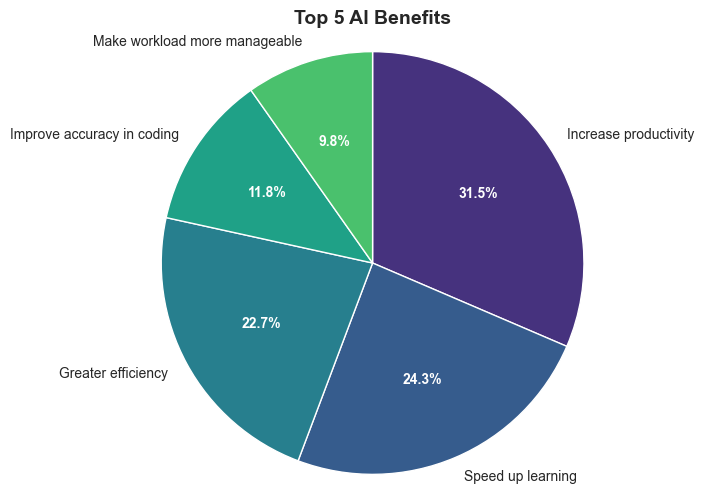

In [93]:
# Drop rows with missing values 
df_ai_using = df.dropna(subset=['AIBen']).copy()

# Drop rows with value 'Unknown'
df_ai_using.drop(df_ai_using.loc[df_ai_using['AIBen'] == 'Unknown'].index, inplace=True)

# Split and explode
df_ai_using['AI_Ben'] = df_ai_using['AIBen'].str.split(';')
df_ai_using_exploded = df_ai_using.explode('AI_Ben')

# Strip whitespaces
df_ai_using_exploded['AI_Ben'] = df_ai_using_exploded['AI_Ben'].str.strip()

# Count frequencies
top_5_ai_using = df_ai_using_exploded['AI_Ben'].value_counts().nlargest(5)

# Pie chart
plt.figure(figsize=(6, 6))
# Capture returned objects
wedges, text_labels, text_autopct = plt.pie(
    top_5_ai_using.values,
    labels=top_5_ai_using.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis'),
    counterclock=False
)
plt.title('Top 5 AI Benefits', fontweight='bold', fontsize=14)
# Change value labels to white
for t in text_autopct:
    t.set_color('white')
    t.set_fontweight('bold')  
plt.axis('equal') 
# Save figure
plt.savefig('../images/22_AI_benefits.png', bbox_inches = 'tight')
plt.show()

Among most often mentioned AI benefits is increased productivity (31.5% mentioned), accelerated learning (24.3%), and greater efficiency (22.7%).

* Sentiment towards AI

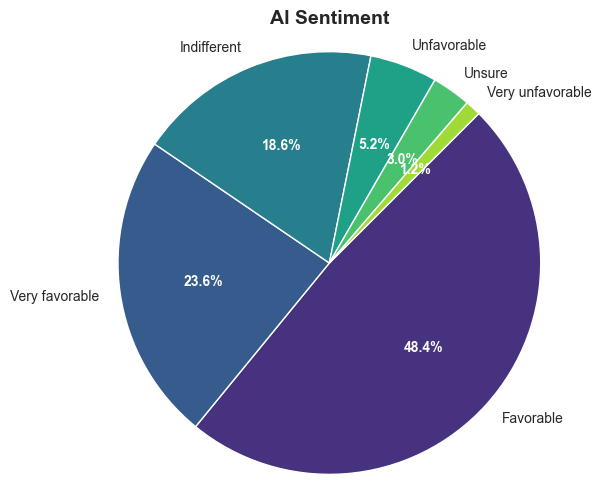

In [94]:
# Drop rows with missing values 
df_sent = df.dropna(subset=['AISent']).copy()

# Drop rows with value 'Unknown'
df_sent.drop(df_sent.loc[df_sent['AISent'] == 'Unknown'].index, inplace=True)

# Count frequencies
df_sent = df_sent['AISent'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
# Capture returned objects
wedges, text_labels, text_autopct = plt.pie(
    df_sent.values,
    labels=df_sent.index,
    autopct='%1.1f%%',
    startangle=45,
    colors=sns.color_palette('viridis'),
    counterclock=False
)
plt.title('AI Sentiment', fontweight='bold', fontsize=14)
# Change value labels to white
for t in text_autopct:
    t.set_color('white')
    t.set_fontweight('bold')  
plt.axis('equal') 
# Save figure
plt.savefig('../images/23_AI_sentiment.png', bbox_inches = 'tight')
plt.show()

Overall, respondents see AI as a beneficial tool, with the majority (72%) expressing positive (favorable or very favorable) sentiment towards its use in their work, and only 9.2% holding an unfavorable view.

* Yearly Compensation and Job Satisfaction across Developer Roles (Bubble Size and Color = Job Satisfaction)

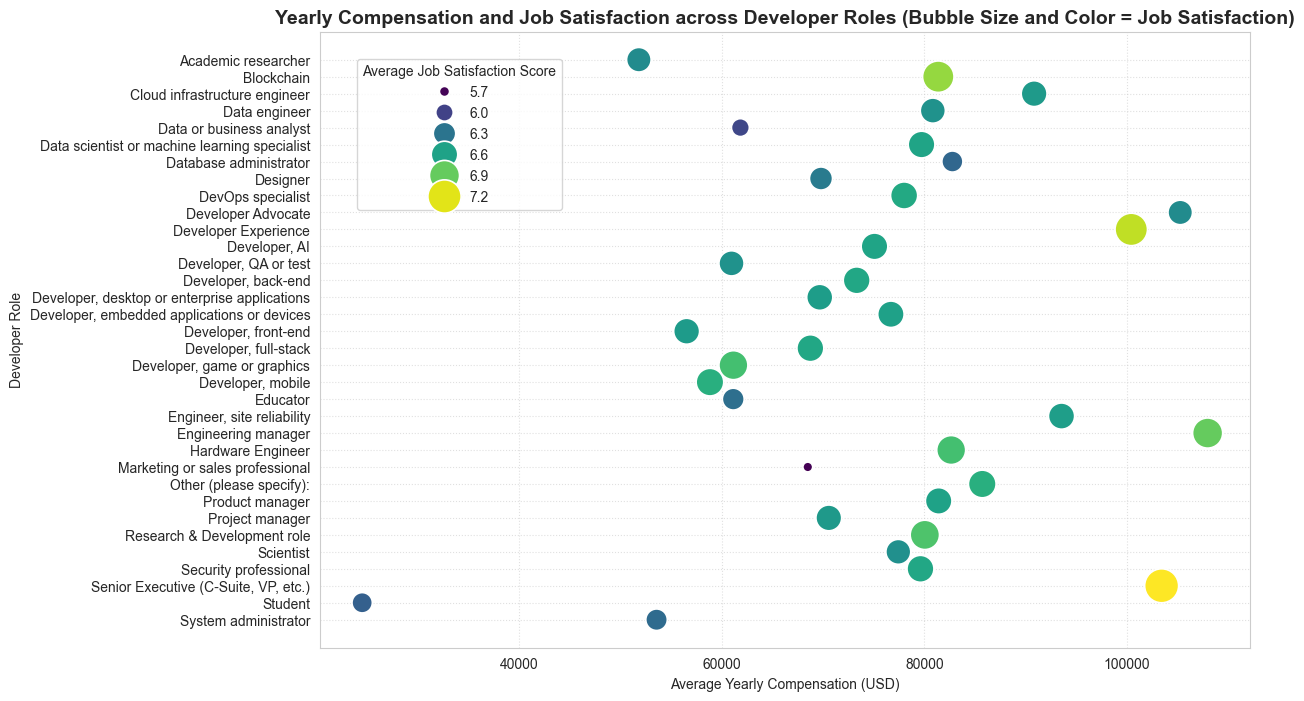

In [95]:
df_dev_comp2 = df[['DevType', 'ConvertedCompYearly', 'JobSat']].dropna().copy()
# Drop rows with value 'Unknown'
df_dev_comp2.drop(df_dev_comp2.loc[df_dev_comp2['DevType'] == 'Unknown'].index, inplace=True)

# Remove negative or zero values
df_dev_comp2 = df_dev_comp2[df_dev_comp2['ConvertedCompYearly'] > 0]

# Aggregate by DevType
df_dev_comp2_plot = df_dev_comp2.groupby('DevType').agg({'ConvertedCompYearly': 'mean', 'JobSat': 'mean'}).reset_index()

# Scatterplot - Bubble plot
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(
    data=df_dev_comp2_plot, 
    x='ConvertedCompYearly', 
    y='DevType',
    size='JobSat',
    sizes=(50, 600),       
    hue='JobSat',
    palette='viridis',    
    alpha=1
)
plt.xlabel('Average Yearly Compensation (USD)')
plt.ylabel('Developer Role')
plt.title('Yearly Compensation and Job Satisfaction across Developer Roles (Bubble Size and Color = Job Satisfaction)', 
          fontweight='bold', fontsize=14)
plt.legend(
    title='Average Job Satisfaction Score',
    loc='lower center',
    bbox_to_anchor=(0.15, 0.7),   
    frameon=True
)
sns.set_style('whitegrid', {'grid.linestyle': ':'})
plt.grid(True, alpha=0.6)
# Save figure
plt.savefig('../images/11_Yearly_Compensation_and_Job_Satisfaction_across_Developer_Roles.png', bbox_inches = 'tight')
plt.show()

* Relationship between Average Yearly Compensation and Average Job Satisfaction Related to Age (Bubble Color)

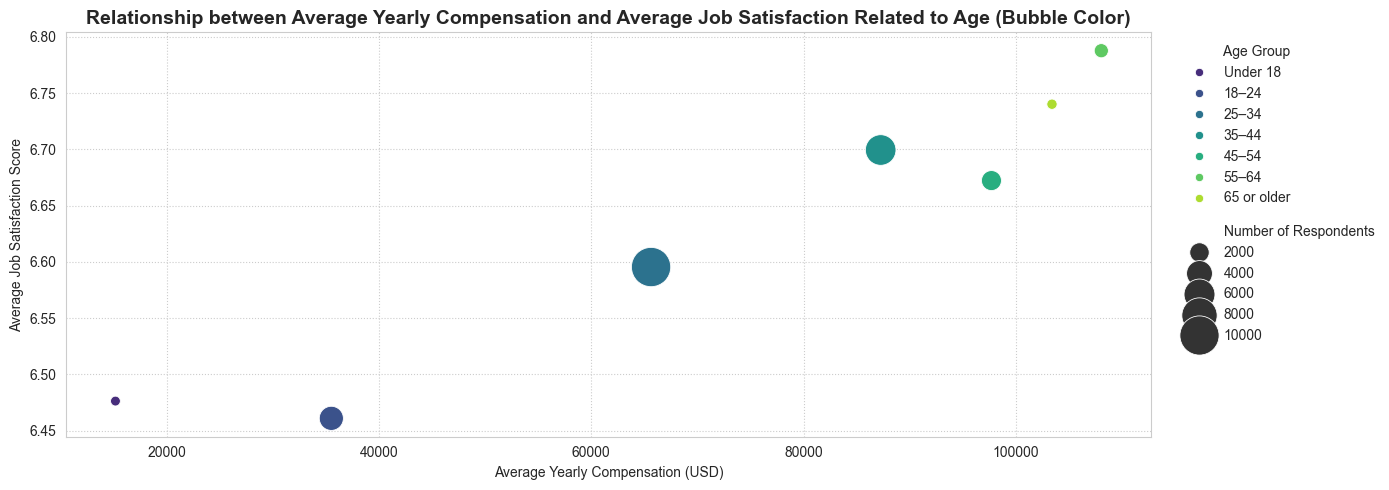

In [96]:
#Each bubble represents an age group
df_convcomp_jobsat = df[['JobSat', 'ConvertedCompYearly', 'Age_Number']].copy()

# Drop rows with missing values
df_convcomp_jobsat = df_convcomp_jobsat.dropna(subset=['JobSat', 'ConvertedCompYearly', 'Age_Number'])

# Remove negative or zero values 
df_convcomp_jobsat = df_convcomp_jobsat[df_convcomp_jobsat['ConvertedCompYearly'] > 0]

# Aggregate the data by Age_Number
df_grouped = df_convcomp_jobsat.groupby('Age_Number').agg({
    'ConvertedCompYearly': 'mean',
    'JobSat': 'mean',
    'Age_Number': 'size'
}).rename(columns={'Age_Number':'Number of Respondents'}).reset_index()

# Generate more colors from the 'viridis' palette
colors = sns.color_palette('viridis', n_colors=7)

age_labels = ['Under 18', '18–24', '25–34', '35–44', '45–54', '55–64', '65 or older']

# Bubble chart
plt.figure(figsize=(14, 5))
ax = sns.scatterplot(
    data=df_grouped,
    x='ConvertedCompYearly', 
    y='JobSat',
    size='Number of Respondents', 
    hue='Age_Number', 
    sizes=(50, 800),       
    palette=colors,    
    alpha=1
)
plt.xlabel('Average Yearly Compensation (USD)')
plt.ylabel('Average Job Satisfaction Score')
plt.title('Relationship between Average Yearly Compensation and Average Job Satisfaction Related to Age (Bubble Color)', fontweight='bold', fontsize=14)
plt.legend(
    loc='lower center',
    bbox_to_anchor=(-0.1, 0.1),   
    frameon=True
)
plt.grid(True)
# Extract the legend
handles, labels = ax.get_legend_handles_labels()
# Create separate legends:
# First legend: AgeMapped (hue)
h1 = ax.legend(
    handles=handles[1:len(df_grouped)+1], 
    labels=age_labels, 
    title='          Age Group',
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    frameon=False
)
ax.add_artist(h1)  # Add the first legend back
# Second legend: Count (size)
h2 = ax.legend(
    handles=handles[len(df_grouped)+1:], 
    labels=labels[len(df_grouped)+1:],
    title='',
    loc='lower left',
    bbox_to_anchor=(1.02, 0.2),
    frameon=False
)
plt.tight_layout()
# Save figure
plt.savefig('../images/14_Relationship_between_Yearly_Compensation_and_Job_Satisfaction_Related_to_Age.png', bbox_inches = 'tight')
plt.show()

* APPENDIX 1: Top 5 Most Popular Programming Languages Across Employment Status

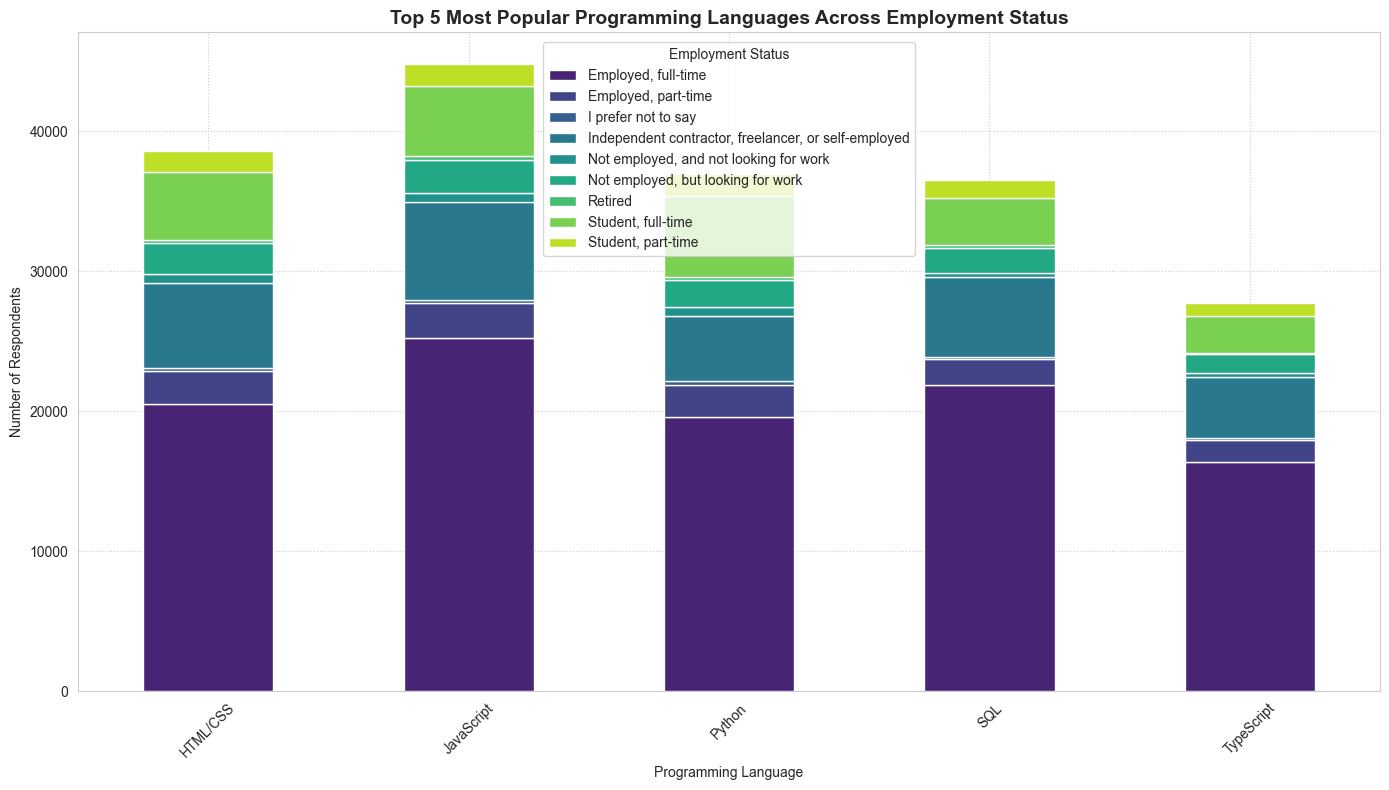

In [97]:
df_platf_empl = df[['Employment', 'LanguageHaveWorkedWith']].copy()

# Drop rows with missing values 
df_platf_empl = df_platf_empl.dropna(subset=['Employment', 'LanguageHaveWorkedWith'])


# Split and explode
df_platf_empl['Lang'] = df_platf_empl['LanguageHaveWorkedWith'].str.split(';')
platf_empl_exploded = df_platf_empl.explode('Lang')

# Strip whitespaces
platf_empl_exploded['Lang'] = platf_empl_exploded['Lang'].str.strip()

# Split and explode
platf_empl_exploded['Employment_Exp'] = platf_empl_exploded['Employment'].str.split(';')
platf_empl_exploded = platf_empl_exploded.explode('Employment_Exp')

# Strip whitespaces
platf_empl_exploded['Employment_Exp'] = platf_empl_exploded['Employment_Exp'].str.strip()

# Compute the top 5 lang overall
top_5_platf = (
    platf_empl_exploded.groupby('Lang')
    .size()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter the original dataset to keep only the top 5
df_top_5_platf = platf_empl_exploded[platf_empl_exploded['Lang'].isin(top_5_platf)]

# Stacked bar dataset
df_platf_plot = (
    df_top_5_platf
    .groupby(['Lang', 'Employment_Exp'])
    .size()
    .unstack(fill_value=0)
)

# Generate more colors from the 'viridis' palette
colors = sns.color_palette('viridis', n_colors=9)

# Stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))
df_platf_plot.plot(kind='bar', stacked=True, ax=ax, color=colors)
ax.set_title('Top 5 Most Popular Programming Languages Across Employment Status', fontweight='bold', fontsize=14)
ax.set_ylabel('Number of Respondents')
ax.set_xlabel('Programming Language')
plt.xticks(rotation=45, ha='center')
plt.tight_layout()
plt.legend(
    title='Employment Status',
    loc='lower center',
    bbox_to_anchor=(0.5, 0.65),   
    frameon=True
)
# Save figure
plt.savefig('../images/15_Top5_Most_Popular_Programming_Languages_Acros_Employment_Status.png', bbox_inches = 'tight')
plt.show()

* APPENDIX 2: Median Compensation across Multiple Age Groups

   Age_Number  ConvertedCompYearly
0       17.00            15,155.89
1       21.00            35,501.31
2       29.50            65,634.24
3       39.50            87,271.63
4       49.50            97,710.71
5       59.50           108,063.49
6       70.00           103,414.20


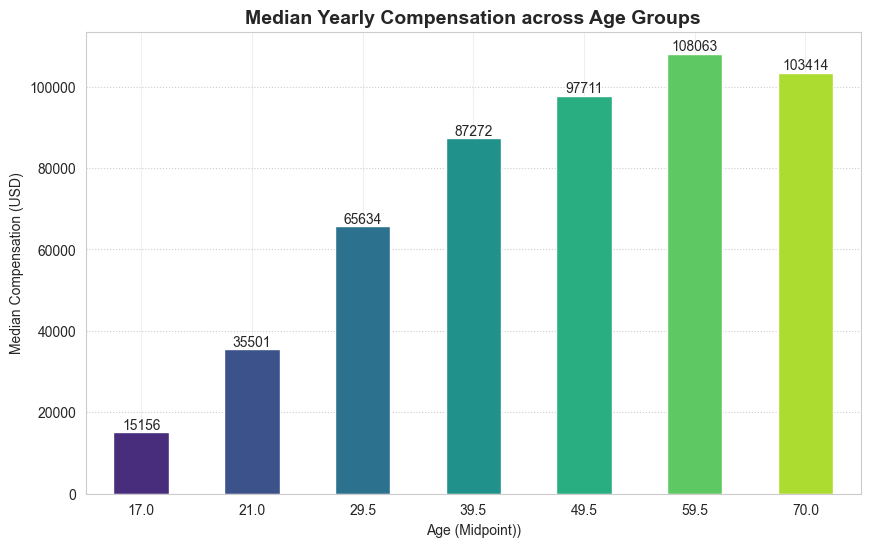

In [98]:
df_age_comp2 = df[['Age_Number', 'ConvertedCompYearly']].copy()

# Drop rows with missing values
df_age_comp2 = df_age_comp2.dropna(subset=['Age_Number', 'ConvertedCompYearly'])

# Remove negative or zero values 
df_age_comp2 = df_age_comp2[df_age_comp2['ConvertedCompYearly'] > 0]

# Aggregate the data by Age_Number
df_grouped_age_comp2 = df_age_comp2.groupby('Age_Number').agg({
    'ConvertedCompYearly': 'mean'
}).reset_index()
print(df_grouped_age_comp2)

# Generate more colors from the 'viridis' palette
colors = sns.color_palette('viridis', n_colors=7)

age_labels = ['Under 18', '18–24', '25–34', '35–44', '45–54', '55–64', '65 or older']

# Bar chart
ax = df_grouped_age_comp2.plot(kind='bar', x='Age_Number', y='ConvertedCompYearly', figsize=(10,6), 
                               color=colors, legend=False)
plt.title('Median Yearly Compensation across Age Groups', fontweight='bold', fontsize=14)
plt.xlabel('Age (Midpoint))')
plt.ylabel('Median Compensation (USD)')
plt.grid(axis='x', linestyle='-', alpha=0.3)
# Add value labels
for p in ax.patches:
    ax.annotate(
        format(round(p.get_height())),  
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom'
    )
plt.xticks(rotation=0)
# Save figure
plt.savefig('../images/16_Median_Yearly_Compensation_across_Age_Groups.png', bbox_inches = 'tight')
plt.show()

* APPEXDIX 3: Number of Respondents by Country (Top 10 Countries)

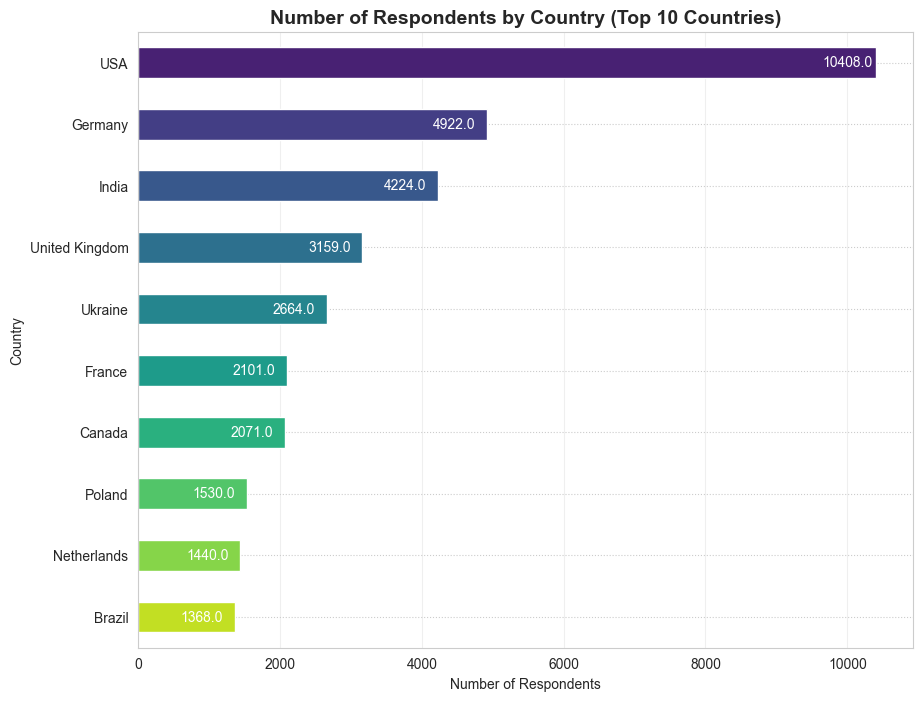

In [99]:
df_country2 = df[['Country']].copy()

# Drop rows with value 'Unknown'
df_country2.drop(df_country2.loc[df_country2['Country'] == 'Unknown'].index, inplace=True)

# Group to get frequency
df_country2 = (
    df_country2
    .groupby('Country')
    .size()
    .reset_index(name='Count')
    .sort_values('Count', ascending=False)   
)
country_top_10 = df_country2.head(10)

# Bar chart
colors = sns.color_palette('viridis', n_colors=10)
ax = country_top_10.plot(kind='barh', x='Country', y='Count', figsize=(10,8), color=colors, legend=False)
plt.title('Number of Respondents by Country (Top 10 Countries)', fontweight='bold', fontsize=14)
plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Descending
plt.grid(axis='x', linestyle='-', alpha=0.3)
# Value labels
for p in ax.patches:
    width = p.get_width()   
    ax.annotate(
        f"{width:.1f}",      # rounded to 1 decimal
        (width - 0.07 * ax.get_xlim()[1], p.get_y() + p.get_height() / 2),
        ha='left',           
        va='center',
        color='white'
    )
# Save figure
plt.savefig('../images/17_Number_of_Respondents_by_Country.png', bbox_inches = 'tight')
plt.show()

* APPEXDIX 4: Correlation Between Age and Job Experience

Correlation:               Age_Number  YearsCodePro
Age_Number          1.00          0.83
YearsCodePro        0.83          1.00


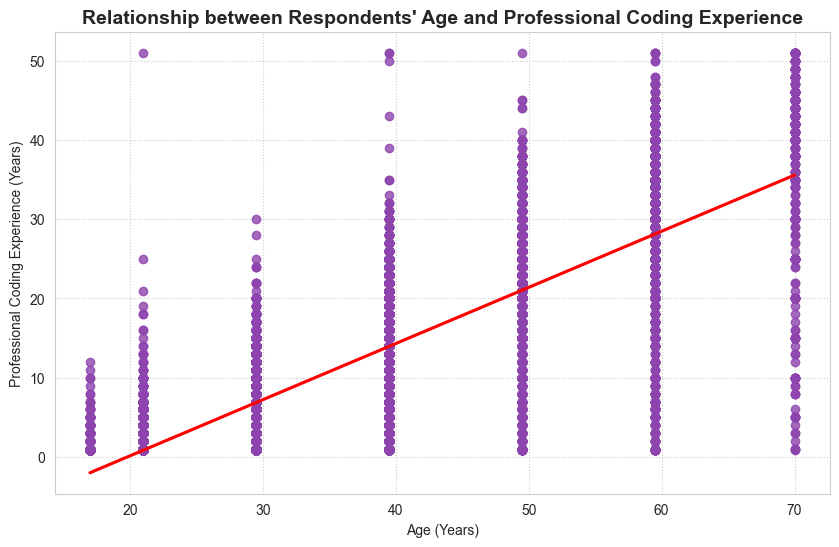

In [100]:
df_age_yrscode = df[['Age_Number', 'YearsCodePro']].copy()

# Drop rows with missing values 
df_age_yrscode = df_age_yrscode.dropna(subset=['Age_Number', 'YearsCodePro'])

# Calculate correlation 
columns = ['Age_Number', 'YearsCodePro']
correlation_coef = df_age_yrscode[columns].corr(method='pearson')
print('Correlation:', correlation_coef)

# Scatter plot and line of best fit
plt.figure(figsize=(10, 6))
sns.regplot(x=df_age_yrscode['Age_Number'], y=df_age_yrscode['YearsCodePro'], ci=None, color='#8E44AD', 
            line_kws={'color': 'red'},)
plt.xlabel('Age (Years)')
plt.ylabel('Professional Coding Experience (Years)')
plt.title('Relationship between Respondents\' Age and Professional Coding Experience', fontweight='bold', fontsize=14)
# Save figure
plt.savefig('../images/18_Relationship_between_Respondents_Age_and_Professional_Coding_Experience.png', bbox_inches = 'tight')
plt.show()

The Pearson's correlation coefficient is 0.83 indicating a strong positive linear relationship between respondents' age and professional coding experience, meaning that older respondents have more years of professional experience. Also the scatterplot line that goes upwards to the right indicates a positive correlation between these two variables.

<h2 align='center'>Charts for Data Collected Using API and Web Scraping</h2>

<p align='center'>See labs below for reference:<br>
<a href="https://errikadd.github.io/Lab2CollectingDataUsingAPIs/">Lab "Collecting Data Using APIs"</a><br>
<a href="https://errikadd.github.io/Lab4CollectingDataUsingWebScraping/">Lab "Collecting Data Using Web Scraping"</a></p>

         Location  Number of Jobs
3   Washington DC            5316
6         Detroit            3945
5         Seattle            3375
8         Houston            3339
1        New York            3226
4          Boston            2966
11      Baltimore            1263
12         Dallas            1208
10    New Orleons             817
0     Los Angeles             640
2   San Francisco             435
7          Austin             434
9    Philadelphia              41


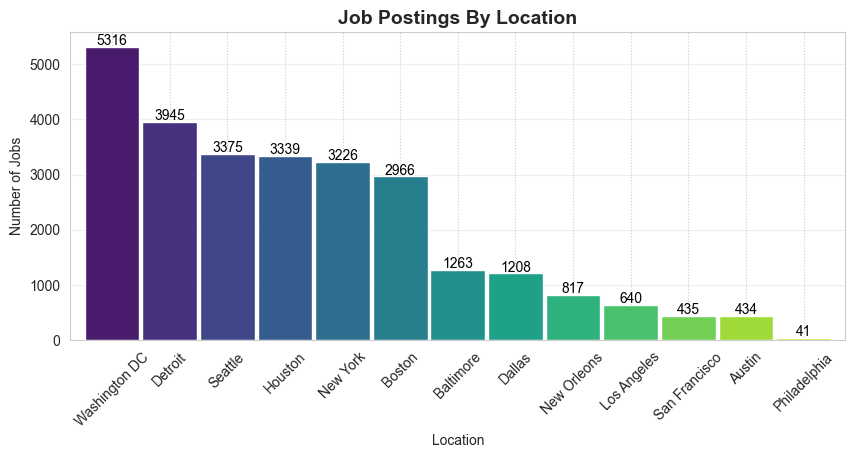

In [101]:
df_jobs = pd.read_excel('./labs/job-postings.xlsx')

sorted_df_jobs = df_jobs.sort_values(by='Number of Jobs',ascending=False)
print(sorted_df_jobs)

# Bar chart
colors = sns.color_palette('viridis', n_colors=13)
ax = sorted_df_jobs.plot(kind='bar', x='Location', y='Number of Jobs', figsize=(10,4), color=colors, legend=False, 
                         width=0.95)
plt.title('Job Postings By Location', fontweight='bold', fontsize=14)
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.grid(axis='y', linestyle='-', alpha=0.3)
# Compute an offset relative to axis max so it's always visible
ymax = ax.get_ylim()[1]
offset = ymax * 0.02   # 2% of the y-axis height
for p in ax.patches:
    value = p.get_height()
    # Position: 
    x = p.get_x() + p.get_width() / 2
    y = value + offset   
    ax.annotate(
        f"{value:.0f}", 
        (x, y),
        ha='center',
        va='center',
        color='black',      
        fontsize=10,
        fontweight='regular'
    )
plt.xticks(rotation=45)
# Save figure
plt.savefig('../images/19_job-postings.png', bbox_inches = 'tight')
plt.show()

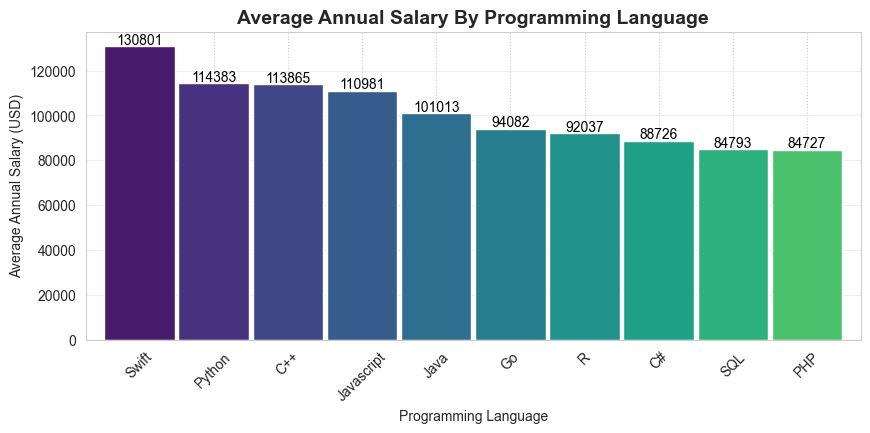

In [102]:
df_languages = pd.read_csv('./labs/popular-languages.csv')
df_languages.head()

# Remove anything that’s not a digit or decimal
df_languages['Average Annual Salary'] = df_languages['Average Annual Salary'].\
    str.replace(r'[^0-9.]', '', regex=True).astype(float)

sorted_df_languages = df_languages.sort_values(by='Average Annual Salary',ascending=False)

# Bar chart
colors = sns.color_palette('viridis', n_colors=13)
ax = sorted_df_languages.plot(kind='bar', x='Language', y='Average Annual Salary', figsize=(10,4), color=colors, legend=False, width=0.95)
plt.title('Average Annual Salary By Programming Language', fontweight='bold', fontsize=14)
plt.xlabel('Programming Language')
plt.ylabel('Average Annual Salary (USD)')
plt.grid(axis='y', linestyle='-', alpha=0.3)
# Compute an offset relative to axis max so it's always visible
ymax = ax.get_ylim()[1]
offset = ymax * 0.02   # 2% of the y-axis height
for p in ax.patches:
    value = p.get_height()
    # Position: 
    x = p.get_x() + p.get_width() / 2
    y = value + offset   
    ax.annotate(
        f"{value:.0f}", 
        (x, y),
        ha='center',
        va='center',
        color='black',      
        fontsize=10,
        fontweight='regular'
    )
plt.xticks(rotation=45)
# Save figure
plt.savefig('../images/20_popular-languages.png', bbox_inches = 'tight')
plt.show()

<br>
<br>


---------------------------------------------------------------------------------------------------------

<br>
<h1 align='center'>File Preparation for Dashboard</h1>

In [103]:
# Exploded dashboard data
df_dashb_explode = df[['ResponseId', 'LanguageHaveWorkedWith', 
                'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
                'LanguageWantToWorkWith', 'DatabaseWantToWorkWith', 'PlatformWantToWorkWith',
                'WebframeWantToWorkWith']].copy()

# Demographics dashboard data
df_dashb_demographics = df[['ResponseId', 'Age', 'EdLevel', 'Country']].copy()

# Saving the files
df_dashb_explode.to_csv('../data\\survey_results_dashboard_explode.csv', index=False)
df_dashb_demographics.to_csv('../data\\survey_results_dashboard_demographics.csv', index=False)

In [104]:
# Prepare long-format exploded data
input_file = '../data\\survey_results_dashboard_explode.csv'
           
output_file1 = '../data\\survey_results_dashboard_exploded.csv'
output_file2 = '../data\\survey_results_dashboard_word_cloud_exploded.csv'

respondent_id_col = "ResponseId"

multi_select_columns = [
    "LanguageHaveWorkedWith",
    "DatabaseHaveWorkedWith",
    "PlatformHaveWorkedWith",
    "WebframeHaveWorkedWith",
    "LanguageWantToWorkWith",
    "DatabaseWantToWorkWith",
    "PlatformWantToWorkWith",
    "WebframeWantToWorkWith"
]

# ------------------------------------
# Load data
df = pd.read_csv(input_file)
print(len(df))

# ------------------------------------
# Prepare long-format exploded data
long_df_list = []

for col in multi_select_columns:
    if col not in df.columns:
        print(f"Warning: Column {col} not in dataset — skipping.")
        continue

    # Drop rows where this particular column is missing
    temp = df.dropna(subset=[col]).copy()

    # Split the multi-select string
    temp["Answer"] = temp[col].astype(str).str.split(";")

    # Explode into separate rows
    temp = temp.explode("Answer")

    # Clean answer text
    temp["Answer"] = temp["Answer"].str.strip()

    # Add the question name
    temp["Question"] = col

    # Keep only question + answer 
    temp = temp[["Question", "Answer"]]

    # Append to list (keeps all original columns!)
    long_df_list.append(temp)

# Combine all exploded versions
final_df = pd.concat(long_df_list, ignore_index=True)



# ------------------------------------
# Prepare data for word cloud
# Select columns, drop NA and make a copy
df_cleaned = df[['ResponseId', 'PlatformHaveWorkedWith']].\
        dropna(subset=['ResponseId','PlatformHaveWorkedWith']).copy()

# Ensure it's string 
df_cleaned['PlatformHaveWorkedWith'] = df_cleaned['PlatformHaveWorkedWith'].astype(str)

# Split using a regex that accepts common separators 
#    the regex also removes surrounding whitespace so tokens are clean
df_cleaned['PlatformList'] = df_cleaned['PlatformHaveWorkedWith'].str.split(r'\s*[;,/|]\s*', expand=False)

# Explode to one platform per row
df_exploded = df_cleaned.explode('PlatformList').reset_index(drop=True)

# Strip leftover whitespace and drop empty strings
df_exploded['Platform'] = df_exploded['PlatformList'].astype(str).str.strip()
df_exploded = df_exploded[df_exploded['Platform'].astype(bool)].copy()   # remove '' entries
df_exploded.drop(columns=['PlatformList'], inplace=True)

# Raw mention counts (every occurrence counts)
raw_counts = df_exploded['Platform'].value_counts()

# Top 12 for raw mentions:
top11_raw = raw_counts.head(12).index.tolist()

# Filter original exploded DF to keep only top-10 platforms
df_top11_raw = df_exploded[df_exploded['Platform'].isin(top11_raw)].copy()

# Sort by platform frequency and then ResponseId
order = raw_counts.reindex(df_top11_raw['Platform']).fillna(0).astype(int)
df_top11_raw = df_top11_raw.assign(_freq=order.values).sort_values(['_freq','Platform','ResponseId'], 
    ascending=[False,True,True]).drop(columns=['_freq'])




# ------------------------------------
# Save final CSVs
final_df.to_csv(output_file1, index=False)
print(f"Done! Full exploded dataset saved as: {output_file1}")

df_top11_raw.to_csv(output_file2, index=False)
print(f"Done! Full exploded dataset for word cloud saved as: {output_file2}")

64459
Done! Full exploded dataset saved as: ../data\survey_results_dashboard_exploded.csv
Done! Full exploded dataset for word cloud saved as: ../data\survey_results_dashboard_word_cloud_exploded.csv


<br>
<a href="https://www.freepik.com/free-ai-image/ai-powered-device-concept_408670707.htm#fromView=search&page=1&position=3&uuid=21438ed9-9156-4fe4-b5c3-168f79c364f2&query=data+analysis">Image "Ai powered device concept" by freepik on Freepik</a>